In [1]:
import os
import nibabel as nib
import torch
#import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
#import torchvision.transforms as T
import torch.nn.utils.parametrize as parametrize
# from torchvision.transforms import ToTensor
# from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [2]:
torch.set_default_tensor_type('torch.cuda.FloatTensor')
random_seed = 2022
torch.manual_seed(random_seed)

# Load the data

In [3]:
def remove_norm(lst):
    '''Remove names starting with "norm_fmri_img"'''
    lst.sort()
    l = len(lst)
    if l%2:
        print('The list has an odd number of elements!')
        return None
    else:
        take = l // 2
        print(f'The length of the original list is {l}, and the lenth of the new list is {take}')
        return lst[:take]

In [4]:
dir_CN = '/blue/li.duan/zheng.yu/Research1/CN'
CN_img_names = os.listdir(dir_CN)

CN_img_names = remove_norm(CN_img_names) # Only keep main_images

dir_AD = '/blue/li.duan/zheng.yu/Research1/AD'
AD_img_names = os.listdir(dir_AD)

AD_img_names = remove_norm(AD_img_names) # Only keep main_images

# dir_LMCI = '/blue/li.duan/zheng.yu/Research1/LMCI'
# LMCI_img_names = os.listdir(dir_LMCI)

# LMCI_img_names = remove_norm(LMCI_img_names) # Only keep main_images

The length of the original list is 76, and the lenth of the new list is 38
The length of the original list is 52, and the lenth of the new list is 26


### CN

In [6]:
# Load data in CN group
imgs_data = torch.tensor(nib.load(os.path.join(dir_CN, CN_img_names[0])).get_fdata()).unsqueeze(0).unsqueeze(0)
for name in CN_img_names[1:]:
    to_be_stacked = torch.tensor(nib.load(os.path.join(dir_CN, name)).get_fdata()).unsqueeze(0).unsqueeze(0)
    to_be_stacked = to_be_stacked[...,:120] # All images must have the same times
    imgs_data = torch.cat((imgs_data, to_be_stacked), dim=0)
    print(imgs_data.shape)
# imgs_data = []
# for name in CN_img_names[:32]:
#     imgs_data.append(nib.load(os.path.join(dir_CN, name)).get_fdata())
# imgs_data = [nib.load(os.path.join(dir_CN, name)).get_fdata() for name in CN_img_names]

torch.Size([2, 1, 91, 109, 91, 120])
torch.Size([3, 1, 91, 109, 91, 120])
torch.Size([4, 1, 91, 109, 91, 120])
torch.Size([5, 1, 91, 109, 91, 120])
torch.Size([6, 1, 91, 109, 91, 120])
torch.Size([7, 1, 91, 109, 91, 120])
torch.Size([8, 1, 91, 109, 91, 120])
torch.Size([9, 1, 91, 109, 91, 120])
torch.Size([10, 1, 91, 109, 91, 120])
torch.Size([11, 1, 91, 109, 91, 120])
torch.Size([12, 1, 91, 109, 91, 120])
torch.Size([13, 1, 91, 109, 91, 120])
torch.Size([14, 1, 91, 109, 91, 120])
torch.Size([15, 1, 91, 109, 91, 120])
torch.Size([16, 1, 91, 109, 91, 120])
torch.Size([17, 1, 91, 109, 91, 120])
torch.Size([18, 1, 91, 109, 91, 120])
torch.Size([19, 1, 91, 109, 91, 120])
torch.Size([20, 1, 91, 109, 91, 120])
torch.Size([21, 1, 91, 109, 91, 120])
torch.Size([22, 1, 91, 109, 91, 120])
torch.Size([23, 1, 91, 109, 91, 120])
torch.Size([24, 1, 91, 109, 91, 120])
torch.Size([25, 1, 91, 109, 91, 120])
torch.Size([26, 1, 91, 109, 91, 120])
torch.Size([27, 1, 91, 109, 91, 120])
torch.Size([28, 1, 9

### AD

In [4]:
# Load data in AD group
imgs_data = torch.tensor(nib.load(os.path.join(dir_AD, AD_img_names[0])).get_fdata()).unsqueeze(0).unsqueeze(0)
for name in AD_img_names[1:]:
    to_be_stacked = torch.tensor(nib.load(os.path.join(dir_AD, name)).get_fdata()).unsqueeze(0).unsqueeze(0)
    to_be_stacked = to_be_stacked[...,:120] # All images must have the same times
    imgs_data = torch.cat((imgs_data, to_be_stacked), dim=0)
    print(imgs_data.shape)

The length of the original list is 52, and the lenth of the new list is 26
torch.Size([2, 1, 91, 109, 91, 120])
torch.Size([3, 1, 91, 109, 91, 120])
torch.Size([4, 1, 91, 109, 91, 120])
torch.Size([5, 1, 91, 109, 91, 120])
torch.Size([6, 1, 91, 109, 91, 120])
torch.Size([7, 1, 91, 109, 91, 120])
torch.Size([8, 1, 91, 109, 91, 120])
torch.Size([9, 1, 91, 109, 91, 120])
torch.Size([10, 1, 91, 109, 91, 120])
torch.Size([11, 1, 91, 109, 91, 120])
torch.Size([12, 1, 91, 109, 91, 120])
torch.Size([13, 1, 91, 109, 91, 120])
torch.Size([14, 1, 91, 109, 91, 120])
torch.Size([15, 1, 91, 109, 91, 120])
torch.Size([16, 1, 91, 109, 91, 120])
torch.Size([17, 1, 91, 109, 91, 120])
torch.Size([18, 1, 91, 109, 91, 120])
torch.Size([19, 1, 91, 109, 91, 120])
torch.Size([20, 1, 91, 109, 91, 120])
torch.Size([21, 1, 91, 109, 91, 120])
torch.Size([22, 1, 91, 109, 91, 120])
torch.Size([23, 1, 91, 109, 91, 120])
torch.Size([24, 1, 91, 109, 91, 120])
torch.Size([25, 1, 91, 109, 91, 120])
torch.Size([26, 1, 91

### LMCI

In [4]:
# Load data in LMCI group
imgs_data = torch.tensor(nib.load(os.path.join(dir_LMCI, LMCI_img_names[0])).get_fdata()).unsqueeze(0).unsqueeze(0)
for name in LMCI_img_names[1:]:
    to_be_stacked = torch.tensor(nib.load(os.path.join(dir_LMCI, name)).get_fdata()).unsqueeze(0).unsqueeze(0)
    to_be_stacked = to_be_stacked[...,:120] # All images must have the same times
    imgs_data = torch.cat((imgs_data, to_be_stacked), dim=0)
    print(imgs_data.shape)

The length of the original list is 80, and the lenth of the new list is 40
torch.Size([2, 1, 91, 109, 91, 120])
torch.Size([3, 1, 91, 109, 91, 120])
torch.Size([4, 1, 91, 109, 91, 120])
torch.Size([5, 1, 91, 109, 91, 120])
torch.Size([6, 1, 91, 109, 91, 120])
torch.Size([7, 1, 91, 109, 91, 120])
torch.Size([8, 1, 91, 109, 91, 120])
torch.Size([9, 1, 91, 109, 91, 120])
torch.Size([10, 1, 91, 109, 91, 120])
torch.Size([11, 1, 91, 109, 91, 120])
torch.Size([12, 1, 91, 109, 91, 120])
torch.Size([13, 1, 91, 109, 91, 120])
torch.Size([14, 1, 91, 109, 91, 120])
torch.Size([15, 1, 91, 109, 91, 120])
torch.Size([16, 1, 91, 109, 91, 120])
torch.Size([17, 1, 91, 109, 91, 120])
torch.Size([18, 1, 91, 109, 91, 120])
torch.Size([19, 1, 91, 109, 91, 120])
torch.Size([20, 1, 91, 109, 91, 120])
torch.Size([21, 1, 91, 109, 91, 120])
torch.Size([22, 1, 91, 109, 91, 120])
torch.Size([23, 1, 91, 109, 91, 120])
torch.Size([24, 1, 91, 109, 91, 120])
torch.Size([25, 1, 91, 109, 91, 120])
torch.Size([26, 1, 91

RuntimeError: CUDA out of memory. Tried to allocate 30.67 GiB (GPU 0; 79.35 GiB total capacity; 31.07 GiB already allocated; 18.23 GiB free; 58.91 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

### CN+AD

In [5]:
# Load data in CN group
for i in range(len(CN_img_names)//2):
    if i==0:
        imgs_data = torch.tensor(nib.load(os.path.join(dir_CN, CN_img_names[0])).get_fdata()).unsqueeze(0).unsqueeze(0)
    else:
        to_be_stacked = torch.tensor(nib.load(os.path.join(dir_CN, CN_img_names[2*i])).get_fdata()).unsqueeze(0).unsqueeze(0)
        to_be_stacked = to_be_stacked[...,:120] # All images must have the same times
        imgs_data = torch.cat((imgs_data, to_be_stacked), dim=0)
        print(imgs_data.shape)
print('CN finished!')
for i in range(len(AD_img_names)//2):
    to_be_stacked = torch.tensor(nib.load(os.path.join(dir_AD, AD_img_names[2*i])).get_fdata()).unsqueeze(0).unsqueeze(0)
    to_be_stacked = to_be_stacked[...,:120] # All images must have the same times
    imgs_data = torch.cat((imgs_data, to_be_stacked), dim=0)
    print(imgs_data.shape)
print('AD finished!')

torch.Size([2, 1, 91, 109, 91, 120])
torch.Size([3, 1, 91, 109, 91, 120])
torch.Size([4, 1, 91, 109, 91, 120])
torch.Size([5, 1, 91, 109, 91, 120])
torch.Size([6, 1, 91, 109, 91, 120])
torch.Size([7, 1, 91, 109, 91, 120])
torch.Size([8, 1, 91, 109, 91, 120])
torch.Size([9, 1, 91, 109, 91, 120])
torch.Size([10, 1, 91, 109, 91, 120])
torch.Size([11, 1, 91, 109, 91, 120])
torch.Size([12, 1, 91, 109, 91, 120])
torch.Size([13, 1, 91, 109, 91, 120])
torch.Size([14, 1, 91, 109, 91, 120])
torch.Size([15, 1, 91, 109, 91, 120])
torch.Size([16, 1, 91, 109, 91, 120])
torch.Size([17, 1, 91, 109, 91, 120])
torch.Size([18, 1, 91, 109, 91, 120])
torch.Size([19, 1, 91, 109, 91, 120])
CN finished!
torch.Size([20, 1, 91, 109, 91, 120])
torch.Size([21, 1, 91, 109, 91, 120])
torch.Size([22, 1, 91, 109, 91, 120])
torch.Size([23, 1, 91, 109, 91, 120])
torch.Size([24, 1, 91, 109, 91, 120])
torch.Size([25, 1, 91, 109, 91, 120])
torch.Size([26, 1, 91, 109, 91, 120])
torch.Size([27, 1, 91, 109, 91, 120])
torch.S

In [6]:
imgs_data.shape

torch.Size([32, 1, 91, 109, 91, 120])

In [11]:
# # Load data in ./Dataset
# data_dir = './Dataset'
# print(os.listdir(data_dir))

# # I269254_I235238imagedataLMCI.nii.gz is not readable here

# img_dir = [os.path.join(data_dir, x) for x in os.listdir(data_dir)]
# # imgs for training
# imgs = [nib.load(img_dir[i]) for i in [0,1,2,4,6]]
# imgs_data = [torch.tensor(i.get_fdata()).unsqueeze(0) for i in imgs]
# # imgs for testing
# imgs2 = [nib.load(img_dir[i]) for i in [3,7]]
# imgs2_data = [torch.tensor(i.get_fdata()).unsqueeze(0) for i in imgs2]

['I269254_I989324imagedata.nii.gz', 'I269254_I1304069imagedata.nii.gz', 'I269254_I1501115imagedata.nii.gz', '100_S_4469_visit2012.nii.gz', 'I269254_I1241097imagedataLMCI.nii.gz', 'I269254_I235238imagedataLMCI.nii.gz', 'I269254_I1132801imagedata.nii.gz', '100_S_4469_visit2013.nii.gz']


# Some helper functions

In [7]:
# Data normalization
def Data_Normalization(imgs_data):
    '''imgs_data: train_size x . x . x . x time'''
    '''mapping to [-1,1]'''
    max_values = torch.amax(imgs_data, dim=(1,2,3,4))
    min_values = torch.amin(imgs_data, dim=(1,2,3,4))
    for i in range(imgs_data.shape[0]):
        imgs_data[i] = 2 * ((imgs_data[i]-min_values[i])/(max_values[i]-min_values[i]) - 0.5)
    return imgs_data, max_values, min_values


# Data masking
def mask_img2(img, mask):
    '''masking an image; work even if there is nan'''
    for i in range(img.size(-1)):
        img[...,i][mask==0] = 0
    return img

def mask_img_list(lst, mask):
    '''masking a tensor consisting of a bunch of images'''
    for i in range(lst.shape[0]):
        lst[i] = mask_img2(lst[i], mask)
    return lst


# # Replacing nan with 0
# def replace_nan_with_0(img):
#     '''replace nan entries of an image with 0'''
#     img[torch.isnan(img)] = 0
#     return img

# def replace_nan_with_0_forlist(lst):
#     '''apply replace_nan_with_0 to a list of images'''
#     for i in range(len(lst)):
#         lst[i] = replace_nan_with_0(lst[i])
#     return lst


# Truncate time
def truncate_time(imgs_data, max_time=120):
    for i in range(imgs_data.shape[0]):
        imgs_data[i] = imgs_data[...,:max_time]
    return imgs_data



# Moving a list of tensors from GPU to CPU
def to_cpu(lst):
    return lst.cpu()


# Helper functions for using GPU
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True, dtype=torch.float)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

# Some hyperparameters

In [22]:
train_size = imgs_data.shape[0]
batch_size = 4
latent_dim = 10
z_dim = 2
print(f'train size:{train_size}, batch size:{batch_size}, latent dimension:{latent_dim}, z dimension:{z_dim}')

train size:32, batch size:4, latent dimension:10, z dimension:2


In [9]:
sig_z = 1.
sig_h = 1.
sig_x = 1.
rho = 1e-3 / 2
lambda_z = 10#e-1

# IDs for images

In [10]:
IDs = torch.tensor(np.arange(train_size), dtype=torch.long)
IDs

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

# Training pipeline

In [56]:
def training_pipeline(imgs_data,
                      data_normalization=True, 
                      masking=False,
                      log_transform=False, epsilon=1e-6,
                      replace_nan_with_0=False,
                      include_IDs=True,
                      move_to_cpu=False,
                      trunc_time=False):
    '''imgs_data: a tensor'''
#     if trunc_time:
#         imgs_data = truncate_time(imgs_data, 120)
    if replace_nan_with_0:#******************
        imgs_data = replace_nan_with_0_forlist(imgs_data)
    if masking:
        mask = torch.tensor(nib.load('mask.nii.gz').get_fdata()).unsqueeze(0)
        imgs_data = mask_img_list(imgs_data, mask)
    if log_transform:#******************
        imgs_data = [torch.log(item+epsilon) for item in imgs_data]
    if data_normalization:
        imgs_data, max_values, min_values = Data_Normalization(imgs_data)
    if move_to_cpu:
        imgs_data = to_cpu(imgs_data)
    if include_IDs:
        imgs_data = [[imgs_data[i], IDs[i]] for i in range(imgs_data.shape[0])]
    return imgs_data, max_values, min_values

In [12]:
train_ds, max_value, min_value = training_pipeline(imgs_data, log_transform=False, trunc_time=False)
del imgs_data
torch.cuda.empty_cache()

# Data loader

In [23]:
print(device) # Make sure we are using GPU

train_loader = DataLoader(train_ds, batch_size, shuffle=True, generator=torch.Generator(device='cuda'))
train_loader = DeviceDataLoader(train_loader, device)

cuda


# Initializing $F^s$, $z^s$ and $h_0$

In [24]:
# F^s
F_matrices = torch.rand(train_size, latent_dim, latent_dim)
F_matrices_original = F_matrices.clone().detach()
print(f'Shape of F:{F_matrices.shape}, device:{F_matrices.device}')

Shape of F:torch.Size([32, 10, 10]), device:cuda:0


In [25]:
# z^s
z_vectors = torch.normal(mean=torch.zeros((train_size, z_dim)), std=sig_z).clone().detach().requires_grad_(True)
z_vectors_original = z_vectors.clone().detach()
#z_vectors = sig_z * torch.randn(train_size, z_dim, requires_grad=True)
print(f'Shape of z:{z_vectors.shape}, device:{z_vectors.device}')

Shape of z:torch.Size([32, 2]), device:cuda:0


In [26]:
# h_0
h0 = torch.rand(1, latent_dim)
#h0 = sig_h * torch.randn(1, latent_dim)
print(f'Shape of h_0:{h0.shape}, device:{h0.device}')

Shape of h_0:torch.Size([1, 10]), device:cuda:0


In [27]:
h0

tensor([[0.1724, 0.6832, 0.5772, 0.0749, 0.9167, 0.7017, 0.9851, 0.5045, 0.4132,
         0.8540]])

# Create the model

In [28]:
class RecVAEModel(nn.Module):
    def __init__(self, enc_out_dim=100, latent_dim=latent_dim, sqr_sig_x=1., sqr_sig_h=1e-1, 
                 F_matrices=F_matrices, lambda_z=lambda_z):
        super().__init__()
        
        self.sqr_sig_x = sqr_sig_x
        self.sqr_sig_h = sqr_sig_h
        self.latent_dim = latent_dim
        self.F_matrices = F_matrices
        self.lambda_z = lambda_z
        
        # Encoder: from input(x) to one of the inputs of the hidden layer (enc_x)
        # input: 1 x 91 x 109 x 91
        self.encoder1 = nn.Sequential(
            nn.Conv3d(1, 4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(4),
            nn.LeakyReLU(0.2, inplace = True)) # output: 4 x 45 x 54 x 45
        
        self.encoder2 = nn.Sequential(
            nn.Conv3d(4, 8, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(8),
            nn.LeakyReLU(0.2, inplace = True)) # output: 8 x 22 x 27 x 22
        
        self.encoder3 = nn.Sequential(
            nn.Conv3d(8, 16, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(16),
            nn.LeakyReLU(0.2, inplace = True)) # output: 16 x 11 x 13 x 11
        
        self.encoder4 = nn.Sequential(
            nn.Conv3d(16, 32, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(32),
            nn.LeakyReLU(0.2, inplace = True)) # output: 32 x 5 x 6 x 5
        
        self.encoder5 = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(32*5*6*5, enc_out_dim),
            nn.Tanh()) # output: enc_out_dim
        
        
        # Hidden: from (enc_x,h_{t-1}) to h_t
        self.hidden2mu = nn.Linear(enc_out_dim+latent_dim+z_dim, latent_dim)
        self.hidden2log_var = nn.Linear(enc_out_dim+latent_dim+z_dim, latent_dim)
        
        # Decoder: from h_t to mu_t
        self.decoder1 = nn.Sequential(
            nn.Linear(latent_dim+z_dim, 32*5*6*5),
            nn.Unflatten(1, (32, 5, 6, 5)),
            nn.BatchNorm3d(32),
            nn.LeakyReLU(0.2, inplace = True))
          
        self.decoder2 = nn.Sequential(
            nn.ConvTranspose3d(32, 16, kernel_size=4, stride=2, padding=1, output_padding=1, bias=False), 
            nn.BatchNorm3d(16),
            nn.LeakyReLU(0.2, inplace = True))
        
        self.decoder3 = nn.Sequential(
            nn.ConvTranspose3d(16, 8, kernel_size=4, stride=2, padding=1, output_padding=(0,1,0), bias=False), 
            nn.BatchNorm3d(8),
            nn.LeakyReLU(0.2, inplace = True))
        
        self.decoder4 = nn.Sequential(
            nn.ConvTranspose3d(8, 4, kernel_size=4, stride=2, padding=1, output_padding=(1,0,1), bias=False), 
            nn.BatchNorm3d(4),
            nn.LeakyReLU(0.2, inplace = True))
        
        self.decoder5 = nn.Sequential(
            nn.ConvTranspose3d(4, 1, kernel_size=4, stride=2, padding=1, output_padding=1, bias=False), 
            nn.Tanh())
                   
        
       
    def g_transform(self, h_old, which_ones):
        # h_old shape: batch_size x latent_dim
        h_old = h_old.unsqueeze(1)
        if len(which_ones)==1:
            h_new = torch.bmm(h_old, self.F_matrices[which_ones[0]:(which_ones[0]+1),:,:])
        else:
            h_new = torch.bmm(h_old, self.F_matrices[which_ones,:,:])
        return h_new.squeeze(1)
     
    
    def encode(self, x):
        enc_x = self.encoder1(x)
        enc_x = self.encoder2(enc_x)
        enc_x = self.encoder3(enc_x)
        enc_x = self.encoder4(enc_x)
        enc_x = self.encoder5(enc_x)
        return enc_x
    
    
    def decode(self, h):
        dec_h = self.decoder1(h)
        dec_h = self.decoder2(dec_h)
        dec_h = self.decoder3(dec_h)
        dec_h = self.decoder4(dec_h)
        dec_h = self.decoder5(dec_h)
        return dec_h
        
    
    def reparametrize(self, mu_h,log_var_h):
        # Reparametrization Trick to allow gradients to backpropagate from the stochastic part of the model
        sigma_h = torch.exp(log_var_h / 2)
        z = torch.randn(size = (mu_h.size(0),mu_h.size(1)))
        # z = z.type_as(mu_h) # Setting z to be .cuda when using GPU training
        return mu_h + sigma_h*z
   
  
    def updating_F(self, h_history, h_0, rho, which_ones):
        Y_tilde = torch.stack(h_history).transpose(0,1) # output: batch_size x tol_time x latent_dim
        h_history.pop(-1)
        h_history.insert(0, h_0)
        X_tilde = torch.stack(h_history).transpose(0,1) # output: batch_size x tol_time x latent_dim
        XT_tilde = X_tilde.transpose(1,2)
        XX_tilde = torch.bmm(XT_tilde, X_tilde)
        XY_tilde = torch.bmm(XT_tilde, Y_tilde)
        rhoI = 2*sig_h**2*rho * torch.eye(h_0.size(1))
        F_new = torch.linalg.solve(XX_tilde+rhoI, XY_tilde)
        self.F_matrices[which_ones,...] = F_new.transpose(1, 2)
        
    
    def VAE(self, x, h, which_ones):
        # encode x and h to get the mu and variance parameters for the latent space
        enc_x = self.encode(x)
        combined = torch.cat((enc_x, h, z_vectors[which_ones,:]), 1)
        mu_h, log_var_h = self.hidden2mu(combined), self.hidden2log_var(combined)
        
        # sample h
        h = self.reparametrize(mu_h, log_var_h)
        
        # decode
        combined_dec = torch.cat((h, z_vectors[which_ones,:]), 1)
        mu = self.decode(combined_dec)
        return mu, h
    
    
    def training_step(self, batch, h_0, which_ones):
        '''h_0: batch_size x latent_dim'''
        x_list, mu_history, h_history, gh_history = self(batch, h_0, which_ones)
        
        temp = 2 * batch_size * len(h_history)
        # calculate loss
        loss1 = sum([torch.sum(torch.pow(x-mu, 2)) for x, mu in zip(x_list, mu_history)])
        loss1 = loss1 / self.sqr_sig_x / temp
        
        loss2 = sum([torch.sum(torch.pow(h-gh, 2)) for h, gh in zip(h_history, gh_history)])
        loss2 = loss2 / self.sqr_sig_h / temp
        
        loss_F = torch.sum(torch.pow(self.F_matrices, 2))
        #loss_F = rho * loss_F / temp
        
        #loss_z = torch.sum(torch.pow(z_vectors, 2)) ### L2->L1
        loss_z = torch.sum(torch.abs(z_vectors))
        loss_z = self.lambda_z * loss_z
        #loss3 = F.l1_loss(z_vectors, torch.zeros_like(z_vectors), reduction='sum')
        
        loss = loss1 + loss2 + loss_z
        
        return loss, {'loss1':loss1, 'loss2':loss2, 'loss_F':loss_F, 'loss_z':loss_z}, h_history
    
    
    def forward(self, x, h_0, which_ones):
        # which_ones is a list containing the IDs of all subjects in the current batch
        tol_time = x.size(-1) # x is of size batch_size*channel*x1*x2*x3*tol_time
        x_list = [x[:,:,:,:,:,t] for t in range(tol_time)]
        del x
        h = h_0
        h_history = []
        gh_history = []
        mu_history = []
        for t in range(tol_time):
            gh_history.append(self.g_transform(h, which_ones))
            mu, h = self.VAE(x_list[t], h, which_ones)
            h_history.append(h)
            mu_history.append(mu)
        return x_list, mu_history, h_history, gh_history
    

model = RecVAEModel()

In [29]:
def fit(epochs, lr, h0, model, rho=rho, train_loader=train_loader, opt_func=torch.optim.SGD):
    train_loss_history = []
    #optimizer = opt_func(model.parameters(), lr)
    optimizer = opt_func([{'params': model.parameters()}, {'params': z_vectors}], lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        for batch, batch_index in train_loader:
            h_0 = h0.expand(batch.size(0), -1) # h0: 1 x latent_dim, h_0: batch_size x latent_dim
            which_ones = IDs[batch_index.to(int)]
        
            loss, loss_dic, h_history = model.training_step(batch, h_0, which_ones)
            loss.backward()
            optimizer.step()
            with torch.no_grad():
                model.updating_F(h_history, h_0, rho, which_ones)
            optimizer.zero_grad()
        if True:#epoch%10==0:
            train_loss_history.append(loss)
            print("Epoch [{}]: train loss: {:.2f} with loss1: {:.2f}, loss2: {:.2f}, loss_z: {:.4f}, loss_F: {:.4f}"
                  .format(epoch, loss, loss_dic['loss1'], loss_dic['loss2'], loss_dic['loss_z'], loss_dic['loss_F']))
    return {'train_loss_history': train_loss_history, 'h_history': h_history}

In [42]:
history = fit(epochs=1, lr=5e-8, h0=h0, model=model) # CN+AD # z NOT as bias for hidden_mu (lambda_z=10) (continued)

Epoch [0]: train loss: 1878.53 with loss1: 1414.51, loss2: 127.42, loss_z: 336.6021, loss_F: 238.4532


In [33]:
history = fit(epochs=2000, lr=5e-8, h0=h0, model=model) # CN+AD # z NOT as bias for hidden_mu (lambda_z=10) (continued)

Epoch [0]: train loss: 1822.15 with loss1: 1366.70, loss2: 114.52, loss_z: 340.9174, loss_F: 223.2428
Epoch [1]: train loss: 1908.15 with loss1: 1450.15, loss2: 117.08, loss_z: 340.9152, loss_F: 235.8218
Epoch [2]: train loss: 2002.16 with loss1: 1594.70, loss2: 66.55, loss_z: 340.9129, loss_F: 229.7497
Epoch [3]: train loss: 1785.41 with loss1: 1350.09, loss2: 94.40, loss_z: 340.9107, loss_F: 220.4939
Epoch [4]: train loss: 1810.75 with loss1: 1340.82, loss2: 129.02, loss_z: 340.9086, loss_F: 230.5717
Epoch [5]: train loss: 2019.84 with loss1: 1587.88, loss2: 91.06, loss_z: 340.9063, loss_F: 233.3665
Epoch [6]: train loss: 1908.21 with loss1: 1440.30, loss2: 127.00, loss_z: 340.9042, loss_F: 232.1410
Epoch [7]: train loss: 1794.21 with loss1: 1331.26, loss2: 122.05, loss_z: 340.9019, loss_F: 230.6935
Epoch [8]: train loss: 2024.10 with loss1: 1573.23, loss2: 109.96, loss_z: 340.8999, loss_F: 224.9414
Epoch [9]: train loss: 2581.96 with loss1: 1982.14, loss2: 258.92, loss_z: 340.8979, 

Epoch [80]: train loss: 1944.84 with loss1: 1512.01, loss2: 92.09, loss_z: 340.7455, loss_F: 231.9814
Epoch [81]: train loss: 1722.56 with loss1: 1293.05, loss2: 88.77, loss_z: 340.7435, loss_F: 229.3750
Epoch [82]: train loss: 1926.58 with loss1: 1499.69, loss2: 86.15, loss_z: 340.7413, loss_F: 225.5604
Epoch [83]: train loss: 1845.39 with loss1: 1423.06, loss2: 81.58, loss_z: 340.7393, loss_F: 231.7428
Epoch [84]: train loss: 2139.53 with loss1: 1672.16, loss2: 126.63, loss_z: 340.7371, loss_F: 230.4163
Epoch [85]: train loss: 1741.14 with loss1: 1300.36, loss2: 100.04, loss_z: 340.7348, loss_F: 227.2434
Epoch [86]: train loss: 1905.50 with loss1: 1455.89, loss2: 108.87, loss_z: 340.7328, loss_F: 241.4265
Epoch [87]: train loss: 1873.26 with loss1: 1425.26, loss2: 107.27, loss_z: 340.7305, loss_F: 229.7357
Epoch [88]: train loss: 1880.96 with loss1: 1430.99, loss2: 109.24, loss_z: 340.7285, loss_F: 238.7461
Epoch [89]: train loss: 1868.78 with loss1: 1420.10, loss2: 107.95, loss_z: 3

Epoch [160]: train loss: 1853.80 with loss1: 1378.43, loss2: 134.80, loss_z: 340.5706, loss_F: 231.5929
Epoch [161]: train loss: 1755.95 with loss1: 1306.11, loss2: 109.27, loss_z: 340.5685, loss_F: 232.5776
Epoch [162]: train loss: 1895.33 with loss1: 1460.59, loss2: 94.18, loss_z: 340.5664, loss_F: 241.4668
Epoch [163]: train loss: 1828.48 with loss1: 1386.98, loss2: 100.94, loss_z: 340.5643, loss_F: 229.6266
Epoch [164]: train loss: 1741.45 with loss1: 1311.05, loss2: 89.84, loss_z: 340.5621, loss_F: 227.2281
Epoch [165]: train loss: 2435.82 with loss1: 1834.94, loss2: 260.32, loss_z: 340.5600, loss_F: 231.8135
Epoch [166]: train loss: 1909.03 with loss1: 1484.79, loss2: 83.68, loss_z: 340.5578, loss_F: 227.9418
Epoch [167]: train loss: 2561.54 with loss1: 1952.32, loss2: 268.66, loss_z: 340.5557, loss_F: 237.7822
Epoch [168]: train loss: 1800.01 with loss1: 1353.59, loss2: 105.87, loss_z: 340.5534, loss_F: 243.2916
Epoch [169]: train loss: 1893.34 with loss1: 1411.99, loss2: 140.80

Epoch [240]: train loss: 2001.00 with loss1: 1594.62, loss2: 65.98, loss_z: 340.3983, loss_F: 230.2674
Epoch [241]: train loss: 1890.66 with loss1: 1429.79, loss2: 120.47, loss_z: 340.3959, loss_F: 227.4243
Epoch [242]: train loss: 1971.90 with loss1: 1544.42, loss2: 87.09, loss_z: 340.3938, loss_F: 236.1102
Epoch [243]: train loss: 1913.86 with loss1: 1472.52, loss2: 100.95, loss_z: 340.3917, loss_F: 222.3485
Epoch [244]: train loss: 1887.90 with loss1: 1424.67, loss2: 122.85, loss_z: 340.3893, loss_F: 234.9404
Epoch [245]: train loss: 1861.92 with loss1: 1425.84, loss2: 95.70, loss_z: 340.3872, loss_F: 234.4357
Epoch [246]: train loss: 1820.93 with loss1: 1376.17, loss2: 104.37, loss_z: 340.3849, loss_F: 233.5981
Epoch [247]: train loss: 1778.84 with loss1: 1347.57, loss2: 90.89, loss_z: 340.3828, loss_F: 229.1555
Epoch [248]: train loss: 1971.34 with loss1: 1512.33, loss2: 118.63, loss_z: 340.3806, loss_F: 236.8197
Epoch [249]: train loss: 1799.39 with loss1: 1353.10, loss2: 105.90,

Epoch [320]: train loss: 1816.17 with loss1: 1375.00, loss2: 100.94, loss_z: 340.2260, loss_F: 226.3163
Epoch [321]: train loss: 1975.44 with loss1: 1554.73, loss2: 80.49, loss_z: 340.2238, loss_F: 232.2224
Epoch [322]: train loss: 2500.45 with loss1: 1890.00, loss2: 270.23, loss_z: 340.2216, loss_F: 233.2945
Epoch [323]: train loss: 1775.32 with loss1: 1323.93, loss2: 111.17, loss_z: 340.2194, loss_F: 227.6181
Epoch [324]: train loss: 1995.07 with loss1: 1572.05, loss2: 82.81, loss_z: 340.2172, loss_F: 229.0503
Epoch [325]: train loss: 1763.59 with loss1: 1341.61, loss2: 81.77, loss_z: 340.2151, loss_F: 231.2610
Epoch [326]: train loss: 1993.40 with loss1: 1553.05, loss2: 100.14, loss_z: 340.2130, loss_F: 225.4031
Epoch [327]: train loss: 1943.68 with loss1: 1510.72, loss2: 92.75, loss_z: 340.2109, loss_F: 230.1082
Epoch [328]: train loss: 2073.51 with loss1: 1615.12, loss2: 118.18, loss_z: 340.2089, loss_F: 228.1792
Epoch [329]: train loss: 1918.23 with loss1: 1489.19, loss2: 88.84, 

Epoch [400]: train loss: 1843.53 with loss1: 1406.22, loss2: 97.25, loss_z: 340.0529, loss_F: 232.3739
Epoch [401]: train loss: 1748.01 with loss1: 1278.51, loss2: 129.45, loss_z: 340.0507, loss_F: 229.2341
Epoch [402]: train loss: 1909.26 with loss1: 1462.05, loss2: 107.16, loss_z: 340.0484, loss_F: 233.1086
Epoch [403]: train loss: 1873.14 with loss1: 1444.99, loss2: 88.10, loss_z: 340.0462, loss_F: 231.3831
Epoch [404]: train loss: 2002.83 with loss1: 1592.55, loss2: 70.23, loss_z: 340.0441, loss_F: 226.1916
Epoch [405]: train loss: 1895.09 with loss1: 1466.84, loss2: 88.20, loss_z: 340.0421, loss_F: 236.1217
Epoch [406]: train loss: 1759.45 with loss1: 1280.96, loss2: 138.45, loss_z: 340.0400, loss_F: 229.2129
Epoch [407]: train loss: 1796.59 with loss1: 1339.91, loss2: 116.64, loss_z: 340.0379, loss_F: 235.7853
Epoch [408]: train loss: 2520.18 with loss1: 1903.64, loss2: 276.50, loss_z: 340.0359, loss_F: 228.6864
Epoch [409]: train loss: 1806.22 with loss1: 1371.97, loss2: 94.22, 

Epoch [480]: train loss: 2000.55 with loss1: 1532.08, loss2: 128.59, loss_z: 339.8790, loss_F: 237.9117
Epoch [481]: train loss: 1867.29 with loss1: 1401.28, loss2: 126.13, loss_z: 339.8768, loss_F: 245.0171
Epoch [482]: train loss: 1989.15 with loss1: 1555.99, loss2: 93.28, loss_z: 339.8748, loss_F: 234.1778
Epoch [483]: train loss: 1903.23 with loss1: 1473.19, loss2: 90.17, loss_z: 339.8727, loss_F: 234.9196
Epoch [484]: train loss: 1897.18 with loss1: 1404.95, loss2: 152.36, loss_z: 339.8705, loss_F: 232.6206
Epoch [485]: train loss: 1862.46 with loss1: 1417.88, loss2: 104.71, loss_z: 339.8685, loss_F: 234.6143
Epoch [486]: train loss: 1845.39 with loss1: 1407.70, loss2: 97.82, loss_z: 339.8662, loss_F: 232.8562
Epoch [487]: train loss: 1914.17 with loss1: 1459.85, loss2: 114.46, loss_z: 339.8642, loss_F: 234.6479
Epoch [488]: train loss: 1950.82 with loss1: 1505.22, loss2: 105.74, loss_z: 339.8619, loss_F: 237.1334
Epoch [489]: train loss: 1755.83 with loss1: 1316.41, loss2: 99.56,

Epoch [560]: train loss: 1877.02 with loss1: 1457.85, loss2: 79.46, loss_z: 339.7076, loss_F: 226.2985
Epoch [561]: train loss: 1715.55 with loss1: 1287.06, loss2: 88.79, loss_z: 339.7055, loss_F: 229.5321
Epoch [562]: train loss: 1801.43 with loss1: 1335.71, loss2: 126.02, loss_z: 339.7035, loss_F: 229.8792
Epoch [563]: train loss: 1985.73 with loss1: 1552.43, loss2: 93.60, loss_z: 339.7012, loss_F: 237.4782
Epoch [564]: train loss: 2449.15 with loss1: 1807.81, loss2: 301.65, loss_z: 339.6992, loss_F: 234.4460
Epoch [565]: train loss: 1871.49 with loss1: 1434.98, loss2: 96.81, loss_z: 339.6970, loss_F: 230.8596
Epoch [566]: train loss: 1937.69 with loss1: 1508.48, loss2: 89.51, loss_z: 339.6948, loss_F: 230.8953
Epoch [567]: train loss: 2709.45 with loss1: 2119.35, loss2: 250.41, loss_z: 339.6927, loss_F: 238.5119
Epoch [568]: train loss: 1900.68 with loss1: 1474.20, loss2: 86.79, loss_z: 339.6904, loss_F: 229.7349
Epoch [569]: train loss: 1834.21 with loss1: 1372.30, loss2: 122.23, l

Epoch [640]: train loss: 2528.15 with loss1: 1927.88, loss2: 260.73, loss_z: 339.5347, loss_F: 232.4103
Epoch [641]: train loss: 1842.24 with loss1: 1381.50, loss2: 121.21, loss_z: 339.5323, loss_F: 232.1977
Epoch [642]: train loss: 1871.25 with loss1: 1428.92, loss2: 102.80, loss_z: 339.5300, loss_F: 239.2574
Epoch [643]: train loss: 1794.78 with loss1: 1348.82, loss2: 106.44, loss_z: 339.5280, loss_F: 235.9888
Epoch [644]: train loss: 2489.30 with loss1: 1865.46, loss2: 284.30, loss_z: 339.5258, loss_F: 236.5030
Epoch [645]: train loss: 1825.84 with loss1: 1380.27, loss2: 106.05, loss_z: 339.5236, loss_F: 228.6760
Epoch [646]: train loss: 1792.46 with loss1: 1369.25, loss2: 83.69, loss_z: 339.5215, loss_F: 238.7253
Epoch [647]: train loss: 2579.97 with loss1: 1965.34, loss2: 275.11, loss_z: 339.5196, loss_F: 236.4015
Epoch [648]: train loss: 2469.84 with loss1: 1849.89, loss2: 280.43, loss_z: 339.5174, loss_F: 238.3534
Epoch [649]: train loss: 1879.07 with loss1: 1412.91, loss2: 126.

Epoch [720]: train loss: 2714.28 with loss1: 2041.61, loss2: 333.31, loss_z: 339.3622, loss_F: 240.8682
Epoch [721]: train loss: 1877.92 with loss1: 1423.36, loss2: 115.20, loss_z: 339.3600, loss_F: 240.6581
Epoch [722]: train loss: 1937.15 with loss1: 1491.49, loss2: 106.30, loss_z: 339.3578, loss_F: 228.9301
Epoch [723]: train loss: 1859.56 with loss1: 1413.02, loss2: 107.19, loss_z: 339.3557, loss_F: 235.3284
Epoch [724]: train loss: 1903.65 with loss1: 1465.20, loss2: 99.09, loss_z: 339.3534, loss_F: 231.6904
Epoch [725]: train loss: 1805.24 with loss1: 1359.24, loss2: 106.65, loss_z: 339.3513, loss_F: 224.6067
Epoch [726]: train loss: 1749.60 with loss1: 1324.82, loss2: 85.43, loss_z: 339.3492, loss_F: 220.4532
Epoch [727]: train loss: 1943.38 with loss1: 1480.77, loss2: 123.26, loss_z: 339.3471, loss_F: 232.1701
Epoch [728]: train loss: 2341.15 with loss1: 1738.88, loss2: 262.93, loss_z: 339.3450, loss_F: 245.0479
Epoch [729]: train loss: 1834.17 with loss1: 1391.78, loss2: 103.0

Epoch [800]: train loss: 1833.75 with loss1: 1382.54, loss2: 112.02, loss_z: 339.1900, loss_F: 227.0560
Epoch [801]: train loss: 1831.38 with loss1: 1412.19, loss2: 80.00, loss_z: 339.1878, loss_F: 229.9477
Epoch [802]: train loss: 1720.84 with loss1: 1285.07, loss2: 96.58, loss_z: 339.1856, loss_F: 238.5979
Epoch [803]: train loss: 1883.40 with loss1: 1454.56, loss2: 89.66, loss_z: 339.1834, loss_F: 231.3876
Epoch [804]: train loss: 2012.90 with loss1: 1567.73, loss2: 105.98, loss_z: 339.1812, loss_F: 236.2735
Epoch [805]: train loss: 1915.67 with loss1: 1468.51, loss2: 107.98, loss_z: 339.1788, loss_F: 231.4669
Epoch [806]: train loss: 1938.23 with loss1: 1497.31, loss2: 101.75, loss_z: 339.1768, loss_F: 226.1881
Epoch [807]: train loss: 1809.49 with loss1: 1350.07, loss2: 120.24, loss_z: 339.1747, loss_F: 234.2722
Epoch [808]: train loss: 1723.45 with loss1: 1278.28, loss2: 106.01, loss_z: 339.1727, loss_F: 227.8987
Epoch [809]: train loss: 2001.81 with loss1: 1543.09, loss2: 119.55

Epoch [880]: train loss: 1878.71 with loss1: 1422.60, loss2: 117.09, loss_z: 339.0173, loss_F: 234.4290
Epoch [881]: train loss: 1836.63 with loss1: 1399.67, loss2: 97.94, loss_z: 339.0152, loss_F: 242.1099
Epoch [882]: train loss: 1855.59 with loss1: 1384.00, loss2: 132.58, loss_z: 339.0132, loss_F: 233.5716
Epoch [883]: train loss: 1879.05 with loss1: 1441.75, loss2: 98.29, loss_z: 339.0110, loss_F: 241.7720
Epoch [884]: train loss: 2496.89 with loss1: 1901.91, loss2: 255.97, loss_z: 339.0090, loss_F: 237.5323
Epoch [885]: train loss: 1789.71 with loss1: 1324.14, loss2: 126.57, loss_z: 339.0069, loss_F: 230.9721
Epoch [886]: train loss: 1800.17 with loss1: 1373.27, loss2: 87.90, loss_z: 339.0046, loss_F: 232.4719
Epoch [887]: train loss: 1890.99 with loss1: 1484.27, loss2: 67.72, loss_z: 339.0025, loss_F: 227.5105
Epoch [888]: train loss: 1799.86 with loss1: 1385.59, loss2: 75.27, loss_z: 339.0005, loss_F: 231.6765
Epoch [889]: train loss: 1884.43 with loss1: 1432.47, loss2: 112.96, 

Epoch [960]: train loss: 1776.43 with loss1: 1357.74, loss2: 79.85, loss_z: 338.8445, loss_F: 231.2194
Epoch [961]: train loss: 1761.84 with loss1: 1294.19, loss2: 128.81, loss_z: 338.8424, loss_F: 239.9165
Epoch [962]: train loss: 1796.36 with loss1: 1365.85, loss2: 91.66, loss_z: 338.8403, loss_F: 235.4968
Epoch [963]: train loss: 2331.41 with loss1: 1729.79, loss2: 262.79, loss_z: 338.8382, loss_F: 233.3395
Epoch [964]: train loss: 1938.14 with loss1: 1527.90, loss2: 71.40, loss_z: 338.8360, loss_F: 221.5973
Epoch [965]: train loss: 1948.43 with loss1: 1533.81, loss2: 75.79, loss_z: 338.8339, loss_F: 225.8692
Epoch [966]: train loss: 2066.07 with loss1: 1617.77, loss2: 109.46, loss_z: 338.8318, loss_F: 238.9991
Epoch [967]: train loss: 1833.63 with loss1: 1383.62, loss2: 111.18, loss_z: 338.8295, loss_F: 228.9720
Epoch [968]: train loss: 1797.13 with loss1: 1360.84, loss2: 97.47, loss_z: 338.8274, loss_F: 233.5930
Epoch [969]: train loss: 1886.81 with loss1: 1436.85, loss2: 111.14, 

Epoch [1039]: train loss: 1769.99 with loss1: 1319.97, loss2: 111.35, loss_z: 338.6733, loss_F: 231.2361
Epoch [1040]: train loss: 1790.43 with loss1: 1350.50, loss2: 101.25, loss_z: 338.6714, loss_F: 228.2835
Epoch [1041]: train loss: 1863.03 with loss1: 1432.02, loss2: 92.34, loss_z: 338.6693, loss_F: 235.9201
Epoch [1042]: train loss: 1927.82 with loss1: 1479.54, loss2: 109.61, loss_z: 338.6671, loss_F: 232.0127
Epoch [1043]: train loss: 1874.09 with loss1: 1438.63, loss2: 96.80, loss_z: 338.6650, loss_F: 240.0233
Epoch [1044]: train loss: 1825.37 with loss1: 1375.73, loss2: 110.97, loss_z: 338.6629, loss_F: 235.7840
Epoch [1045]: train loss: 1909.44 with loss1: 1473.91, loss2: 96.87, loss_z: 338.6607, loss_F: 233.3118
Epoch [1046]: train loss: 1779.76 with loss1: 1342.57, loss2: 98.53, loss_z: 338.6586, loss_F: 232.6869
Epoch [1047]: train loss: 1875.98 with loss1: 1436.54, loss2: 100.79, loss_z: 338.6564, loss_F: 234.7101
Epoch [1048]: train loss: 1866.99 with loss1: 1414.04, loss

Epoch [1118]: train loss: 1849.98 with loss1: 1387.88, loss2: 123.59, loss_z: 338.5036, loss_F: 230.3453
Epoch [1119]: train loss: 1943.17 with loss1: 1520.27, loss2: 84.39, loss_z: 338.5014, loss_F: 226.2801
Epoch [1120]: train loss: 1993.51 with loss1: 1562.05, loss2: 92.96, loss_z: 338.4994, loss_F: 234.2446
Epoch [1121]: train loss: 1899.58 with loss1: 1450.51, loss2: 110.57, loss_z: 338.4973, loss_F: 239.4135
Epoch [1122]: train loss: 1943.73 with loss1: 1466.97, loss2: 138.27, loss_z: 338.4951, loss_F: 241.9729
Epoch [1123]: train loss: 1858.41 with loss1: 1411.96, loss2: 107.96, loss_z: 338.4930, loss_F: 232.5497
Epoch [1124]: train loss: 1754.58 with loss1: 1304.51, loss2: 111.58, loss_z: 338.4908, loss_F: 233.7087
Epoch [1125]: train loss: 1854.98 with loss1: 1422.16, loss2: 94.34, loss_z: 338.4886, loss_F: 230.1261
Epoch [1126]: train loss: 1787.09 with loss1: 1334.32, loss2: 114.29, loss_z: 338.4866, loss_F: 236.4150
Epoch [1127]: train loss: 1838.00 with loss1: 1420.31, los

Epoch [1197]: train loss: 1756.74 with loss1: 1339.63, loss2: 78.77, loss_z: 338.3344, loss_F: 228.0620
Epoch [1198]: train loss: 1832.97 with loss1: 1410.52, loss2: 84.11, loss_z: 338.3323, loss_F: 241.0709
Epoch [1199]: train loss: 1835.40 with loss1: 1411.51, loss2: 85.55, loss_z: 338.3301, loss_F: 233.9577
Epoch [1200]: train loss: 2379.78 with loss1: 1765.86, loss2: 275.59, loss_z: 338.3282, loss_F: 238.3371
Epoch [1201]: train loss: 1831.21 with loss1: 1363.06, loss2: 129.82, loss_z: 338.3259, loss_F: 235.2244
Epoch [1202]: train loss: 2476.59 with loss1: 1865.87, loss2: 272.40, loss_z: 338.3237, loss_F: 235.7455
Epoch [1203]: train loss: 1794.19 with loss1: 1344.46, loss2: 111.41, loss_z: 338.3215, loss_F: 238.2625
Epoch [1204]: train loss: 1722.90 with loss1: 1295.09, loss2: 89.49, loss_z: 338.3194, loss_F: 232.2221
Epoch [1205]: train loss: 1832.00 with loss1: 1399.70, loss2: 93.98, loss_z: 338.3173, loss_F: 237.1699
Epoch [1206]: train loss: 2502.95 with loss1: 1899.26, loss2

Epoch [1276]: train loss: 1858.60 with loss1: 1419.72, loss2: 100.71, loss_z: 338.1641, loss_F: 240.0218
Epoch [1277]: train loss: 2429.54 with loss1: 1838.91, loss2: 252.47, loss_z: 338.1620, loss_F: 240.1992
Epoch [1278]: train loss: 2441.82 with loss1: 1821.64, loss2: 282.02, loss_z: 338.1600, loss_F: 242.9968
Epoch [1279]: train loss: 1769.30 with loss1: 1321.35, loss2: 109.79, loss_z: 338.1577, loss_F: 231.0170
Epoch [1280]: train loss: 1851.59 with loss1: 1434.46, loss2: 78.98, loss_z: 338.1555, loss_F: 235.7252
Epoch [1281]: train loss: 1852.64 with loss1: 1429.68, loss2: 84.80, loss_z: 338.1533, loss_F: 240.2950
Epoch [1282]: train loss: 1836.85 with loss1: 1356.12, loss2: 142.58, loss_z: 338.1511, loss_F: 235.5334
Epoch [1283]: train loss: 1934.46 with loss1: 1491.09, loss2: 105.22, loss_z: 338.1489, loss_F: 229.4206
Epoch [1284]: train loss: 2408.88 with loss1: 1854.26, loss2: 216.48, loss_z: 338.1468, loss_F: 242.4244
Epoch [1285]: train loss: 1748.11 with loss1: 1333.02, lo

Epoch [1355]: train loss: 1919.57 with loss1: 1462.82, loss2: 118.75, loss_z: 337.9932, loss_F: 236.2873
Epoch [1356]: train loss: 1823.35 with loss1: 1377.30, loss2: 108.06, loss_z: 337.9911, loss_F: 234.6366
Epoch [1357]: train loss: 2535.79 with loss1: 1970.34, loss2: 227.45, loss_z: 337.9890, loss_F: 238.9277
Epoch [1358]: train loss: 1823.71 with loss1: 1385.17, loss2: 100.55, loss_z: 337.9869, loss_F: 232.6776
Epoch [1359]: train loss: 1848.37 with loss1: 1410.86, loss2: 99.53, loss_z: 337.9847, loss_F: 234.6734
Epoch [1360]: train loss: 1795.39 with loss1: 1375.00, loss2: 82.41, loss_z: 337.9825, loss_F: 228.8177
Epoch [1361]: train loss: 1746.16 with loss1: 1314.23, loss2: 93.95, loss_z: 337.9804, loss_F: 228.5767
Epoch [1362]: train loss: 1881.23 with loss1: 1392.47, loss2: 150.78, loss_z: 337.9782, loss_F: 233.0336
Epoch [1363]: train loss: 2052.78 with loss1: 1621.41, loss2: 93.40, loss_z: 337.9760, loss_F: 237.0675
Epoch [1364]: train loss: 2118.26 with loss1: 1708.30, loss

Epoch [1434]: train loss: 1748.05 with loss1: 1323.96, loss2: 86.27, loss_z: 337.8234, loss_F: 233.1301
Epoch [1435]: train loss: 1868.47 with loss1: 1444.21, loss2: 86.44, loss_z: 337.8211, loss_F: 232.0444
Epoch [1436]: train loss: 1817.56 with loss1: 1375.17, loss2: 104.57, loss_z: 337.8189, loss_F: 229.5907
Epoch [1437]: train loss: 1815.44 with loss1: 1382.26, loss2: 95.36, loss_z: 337.8168, loss_F: 232.2752
Epoch [1438]: train loss: 1769.88 with loss1: 1344.29, loss2: 87.77, loss_z: 337.8146, loss_F: 239.5620
Epoch [1439]: train loss: 1791.37 with loss1: 1319.35, loss2: 134.20, loss_z: 337.8125, loss_F: 238.9404
Epoch [1440]: train loss: 1935.68 with loss1: 1475.68, loss2: 122.18, loss_z: 337.8103, loss_F: 248.3385
Epoch [1441]: train loss: 1931.60 with loss1: 1445.99, loss2: 147.81, loss_z: 337.8082, loss_F: 241.2272
Epoch [1442]: train loss: 2320.39 with loss1: 1728.68, loss2: 253.90, loss_z: 337.8061, loss_F: 235.3563
Epoch [1443]: train loss: 1853.16 with loss1: 1394.50, loss

Epoch [1513]: train loss: 1741.83 with loss1: 1318.48, loss2: 85.69, loss_z: 337.6533, loss_F: 235.8150
Epoch [1514]: train loss: 2461.38 with loss1: 1848.62, loss2: 275.11, loss_z: 337.6512, loss_F: 238.1789
Epoch [1515]: train loss: 1765.42 with loss1: 1310.55, loss2: 117.22, loss_z: 337.6489, loss_F: 232.3820
Epoch [1516]: train loss: 1904.46 with loss1: 1457.11, loss2: 109.71, loss_z: 337.6468, loss_F: 239.2945
Epoch [1517]: train loss: 1830.69 with loss1: 1354.22, loss2: 138.82, loss_z: 337.6446, loss_F: 243.2941
Epoch [1518]: train loss: 1752.46 with loss1: 1301.84, loss2: 112.97, loss_z: 337.6425, loss_F: 240.4488
Epoch [1519]: train loss: 1889.44 with loss1: 1449.47, loss2: 102.33, loss_z: 337.6405, loss_F: 233.2432
Epoch [1520]: train loss: 1871.54 with loss1: 1465.56, loss2: 68.34, loss_z: 337.6384, loss_F: 227.3624
Epoch [1521]: train loss: 1875.93 with loss1: 1425.36, loss2: 112.93, loss_z: 337.6359, loss_F: 235.6680
Epoch [1522]: train loss: 1856.11 with loss1: 1414.81, lo

Epoch [1592]: train loss: 1716.09 with loss1: 1307.29, loss2: 71.32, loss_z: 337.4824, loss_F: 236.2540
Epoch [1593]: train loss: 1779.79 with loss1: 1352.21, loss2: 90.10, loss_z: 337.4802, loss_F: 229.2662
Epoch [1594]: train loss: 1754.92 with loss1: 1335.67, loss2: 81.77, loss_z: 337.4780, loss_F: 233.5685
Epoch [1595]: train loss: 1810.65 with loss1: 1382.04, loss2: 91.13, loss_z: 337.4757, loss_F: 228.3757
Epoch [1596]: train loss: 1681.33 with loss1: 1266.63, loss2: 77.23, loss_z: 337.4737, loss_F: 226.8415
Epoch [1597]: train loss: 1770.01 with loss1: 1333.53, loss2: 99.01, loss_z: 337.4715, loss_F: 234.3911
Epoch [1598]: train loss: 1805.05 with loss1: 1358.69, loss2: 108.89, loss_z: 337.4690, loss_F: 243.6775
Epoch [1599]: train loss: 1885.44 with loss1: 1412.72, loss2: 135.25, loss_z: 337.4670, loss_F: 232.0435
Epoch [1600]: train loss: 1891.88 with loss1: 1461.27, loss2: 93.14, loss_z: 337.4648, loss_F: 232.8144
Epoch [1601]: train loss: 1808.76 with loss1: 1360.97, loss2: 

Epoch [1671]: train loss: 1951.88 with loss1: 1481.78, loss2: 132.79, loss_z: 337.3120, loss_F: 239.3603
Epoch [1672]: train loss: 2528.86 with loss1: 1888.49, loss2: 303.06, loss_z: 337.3099, loss_F: 237.7809
Epoch [1673]: train loss: 1913.48 with loss1: 1496.02, loss2: 80.15, loss_z: 337.3079, loss_F: 233.3225
Epoch [1674]: train loss: 1822.58 with loss1: 1397.12, loss2: 88.15, loss_z: 337.3057, loss_F: 224.1145
Epoch [1675]: train loss: 1824.77 with loss1: 1359.65, loss2: 127.82, loss_z: 337.3035, loss_F: 233.7598
Epoch [1676]: train loss: 1873.83 with loss1: 1425.77, loss2: 110.76, loss_z: 337.3012, loss_F: 230.1093
Epoch [1677]: train loss: 1799.35 with loss1: 1376.76, loss2: 85.30, loss_z: 337.2991, loss_F: 235.2048
Epoch [1678]: train loss: 1800.13 with loss1: 1369.88, loss2: 92.96, loss_z: 337.2969, loss_F: 236.5159
Epoch [1679]: train loss: 1743.77 with loss1: 1297.56, loss2: 108.92, loss_z: 337.2949, loss_F: 232.7081
Epoch [1680]: train loss: 1812.43 with loss1: 1352.61, loss

Epoch [1750]: train loss: 1752.48 with loss1: 1309.33, loss2: 106.01, loss_z: 337.1414, loss_F: 230.5600
Epoch [1751]: train loss: 2369.65 with loss1: 1769.07, loss2: 263.44, loss_z: 337.1393, loss_F: 234.5187
Epoch [1752]: train loss: 1819.25 with loss1: 1407.00, loss2: 75.12, loss_z: 337.1371, loss_F: 228.3694
Epoch [1753]: train loss: 1770.91 with loss1: 1344.56, loss2: 89.21, loss_z: 337.1349, loss_F: 234.2470
Epoch [1754]: train loss: 1937.58 with loss1: 1479.33, loss2: 121.11, loss_z: 337.1325, loss_F: 232.1192
Epoch [1755]: train loss: 1804.50 with loss1: 1396.50, loss2: 70.87, loss_z: 337.1303, loss_F: 233.5231
Epoch [1756]: train loss: 1761.41 with loss1: 1326.29, loss2: 98.00, loss_z: 337.1282, loss_F: 230.3158
Epoch [1757]: train loss: 1770.10 with loss1: 1335.97, loss2: 97.01, loss_z: 337.1261, loss_F: 236.3048
Epoch [1758]: train loss: 1708.22 with loss1: 1281.99, loss2: 89.10, loss_z: 337.1241, loss_F: 233.3262
Epoch [1759]: train loss: 1816.65 with loss1: 1341.15, loss2:

Epoch [1829]: train loss: 1777.04 with loss1: 1343.55, loss2: 96.52, loss_z: 336.9710, loss_F: 232.2070
Epoch [1830]: train loss: 1838.48 with loss1: 1414.07, loss2: 87.44, loss_z: 336.9688, loss_F: 241.5493
Epoch [1831]: train loss: 1810.62 with loss1: 1361.98, loss2: 111.67, loss_z: 336.9667, loss_F: 239.0683
Epoch [1832]: train loss: 1830.33 with loss1: 1396.15, loss2: 97.22, loss_z: 336.9647, loss_F: 223.3735
Epoch [1833]: train loss: 2644.62 with loss1: 2000.74, loss2: 306.92, loss_z: 336.9626, loss_F: 237.4573
Epoch [1834]: train loss: 1893.08 with loss1: 1432.95, loss2: 123.17, loss_z: 336.9603, loss_F: 236.4369
Epoch [1835]: train loss: 1785.33 with loss1: 1347.73, loss2: 100.64, loss_z: 336.9583, loss_F: 238.9347
Epoch [1836]: train loss: 2445.18 with loss1: 1842.20, loss2: 266.02, loss_z: 336.9562, loss_F: 235.3561
Epoch [1837]: train loss: 1735.71 with loss1: 1307.60, loss2: 91.16, loss_z: 336.9540, loss_F: 230.9306
Epoch [1838]: train loss: 1809.20 with loss1: 1404.49, loss

Epoch [1908]: train loss: 1775.33 with loss1: 1349.85, loss2: 88.67, loss_z: 336.8019, loss_F: 232.3583
Epoch [1909]: train loss: 1747.28 with loss1: 1287.81, loss2: 122.68, loss_z: 336.7999, loss_F: 232.6043
Epoch [1910]: train loss: 2446.83 with loss1: 1860.15, loss2: 249.88, loss_z: 336.7978, loss_F: 239.2778
Epoch [1911]: train loss: 1807.35 with loss1: 1346.34, loss2: 124.22, loss_z: 336.7957, loss_F: 235.5966
Epoch [1912]: train loss: 1907.78 with loss1: 1482.07, loss2: 88.92, loss_z: 336.7935, loss_F: 228.5606
Epoch [1913]: train loss: 1752.30 with loss1: 1320.18, loss2: 95.33, loss_z: 336.7914, loss_F: 234.4458
Epoch [1914]: train loss: 2476.32 with loss1: 1888.80, loss2: 250.72, loss_z: 336.7894, loss_F: 234.2429
Epoch [1915]: train loss: 1748.54 with loss1: 1341.78, loss2: 69.97, loss_z: 336.7870, loss_F: 230.7107
Epoch [1916]: train loss: 1757.90 with loss1: 1325.28, loss2: 95.83, loss_z: 336.7847, loss_F: 235.8467
Epoch [1917]: train loss: 2489.26 with loss1: 1855.21, loss2

Epoch [1987]: train loss: 1853.84 with loss1: 1409.24, loss2: 107.97, loss_z: 336.6322, loss_F: 242.4682
Epoch [1988]: train loss: 1844.70 with loss1: 1386.06, loss2: 122.01, loss_z: 336.6301, loss_F: 236.6892
Epoch [1989]: train loss: 1820.42 with loss1: 1369.59, loss2: 114.21, loss_z: 336.6279, loss_F: 241.9589
Epoch [1990]: train loss: 1835.71 with loss1: 1407.78, loss2: 91.30, loss_z: 336.6257, loss_F: 231.1445
Epoch [1991]: train loss: 2407.56 with loss1: 1847.85, loss2: 223.09, loss_z: 336.6236, loss_F: 245.7168
Epoch [1992]: train loss: 1748.49 with loss1: 1326.28, loss2: 85.59, loss_z: 336.6214, loss_F: 236.1202
Epoch [1993]: train loss: 1791.78 with loss1: 1360.32, loss2: 94.85, loss_z: 336.6192, loss_F: 236.6343
Epoch [1994]: train loss: 1810.31 with loss1: 1367.90, loss2: 105.80, loss_z: 336.6171, loss_F: 241.1451
Epoch [1995]: train loss: 1745.67 with loss1: 1283.23, loss2: 125.82, loss_z: 336.6148, loss_F: 236.3068
Epoch [1996]: train loss: 1978.58 with loss1: 1528.74, los

In [31]:
history = fit(epochs=500, lr=5e-7, h0=h0, model=model) # CN+AD # z NOT as bias for hidden_mu (lambda_z=10) (continued)

Epoch [0]: train loss: 2154.89 with loss1: 1666.48, loss2: 134.38, loss_z: 354.0341, loss_F: 228.7705
Epoch [1]: train loss: 2225.38 with loss1: 1732.71, loss2: 138.66, loss_z: 354.0143, loss_F: 222.8812
Epoch [2]: train loss: 2285.32 with loss1: 1801.56, loss2: 129.77, loss_z: 353.9939, loss_F: 223.1377
Epoch [3]: train loss: 2086.08 with loss1: 1584.89, loss2: 147.21, loss_z: 353.9731, loss_F: 224.6068
Epoch [4]: train loss: 2033.69 with loss1: 1547.79, loss2: 131.95, loss_z: 353.9524, loss_F: 227.2585
Epoch [5]: train loss: 2237.67 with loss1: 1765.88, loss2: 117.86, loss_z: 353.9307, loss_F: 225.7189
Epoch [6]: train loss: 2090.96 with loss1: 1594.13, loss2: 142.91, loss_z: 353.9107, loss_F: 222.2914
Epoch [7]: train loss: 2239.78 with loss1: 1776.48, loss2: 109.42, loss_z: 353.8890, loss_F: 219.4211
Epoch [8]: train loss: 2043.33 with loss1: 1572.02, loss2: 117.44, loss_z: 353.8687, loss_F: 226.6342
Epoch [9]: train loss: 2061.28 with loss1: 1595.84, loss2: 111.60, loss_z: 353.847

Epoch [80]: train loss: 2288.72 with loss1: 1831.25, loss2: 105.11, loss_z: 352.3626, loss_F: 222.0683
Epoch [81]: train loss: 2144.53 with loss1: 1696.04, loss2: 96.15, loss_z: 352.3433, loss_F: 216.9853
Epoch [82]: train loss: 2173.07 with loss1: 1707.03, loss2: 113.72, loss_z: 352.3215, loss_F: 215.5137
Epoch [83]: train loss: 2065.90 with loss1: 1628.29, loss2: 85.31, loss_z: 352.2986, loss_F: 225.6573
Epoch [84]: train loss: 2029.05 with loss1: 1518.07, loss2: 158.70, loss_z: 352.2781, loss_F: 226.4565
Epoch [85]: train loss: 1965.36 with loss1: 1523.84, loss2: 89.26, loss_z: 352.2578, loss_F: 225.5591
Epoch [86]: train loss: 2066.57 with loss1: 1565.59, loss2: 148.75, loss_z: 352.2354, loss_F: 223.3800
Epoch [87]: train loss: 1981.74 with loss1: 1527.70, loss2: 101.83, loss_z: 352.2140, loss_F: 230.4074
Epoch [88]: train loss: 2167.65 with loss1: 1731.93, loss2: 83.53, loss_z: 352.1924, loss_F: 222.3971
Epoch [89]: train loss: 1965.67 with loss1: 1519.11, loss2: 94.39, loss_z: 35

Epoch [160]: train loss: 2092.25 with loss1: 1636.05, loss2: 105.57, loss_z: 350.6368, loss_F: 229.2494
Epoch [161]: train loss: 1965.59 with loss1: 1488.06, loss2: 126.92, loss_z: 350.6158, loss_F: 224.8386
Epoch [162]: train loss: 2036.42 with loss1: 1600.25, loss2: 85.57, loss_z: 350.5942, loss_F: 223.5036
Epoch [163]: train loss: 2018.98 with loss1: 1571.57, loss2: 96.84, loss_z: 350.5707, loss_F: 227.6619
Epoch [164]: train loss: 1890.76 with loss1: 1410.10, loss2: 130.11, loss_z: 350.5493, loss_F: 219.7924
Epoch [165]: train loss: 2139.32 with loss1: 1637.46, loss2: 151.33, loss_z: 350.5276, loss_F: 224.6767
Epoch [166]: train loss: 1971.83 with loss1: 1503.29, loss2: 118.04, loss_z: 350.5046, loss_F: 227.9674
Epoch [167]: train loss: 1991.59 with loss1: 1492.44, loss2: 148.66, loss_z: 350.4814, loss_F: 225.5080
Epoch [168]: train loss: 1975.52 with loss1: 1510.49, loss2: 114.57, loss_z: 350.4608, loss_F: 220.6652
Epoch [169]: train loss: 1962.53 with loss1: 1508.83, loss2: 103.2

Epoch [240]: train loss: 2063.23 with loss1: 1579.51, loss2: 134.85, loss_z: 348.8718, loss_F: 229.9212
Epoch [241]: train loss: 1973.81 with loss1: 1529.11, loss2: 95.85, loss_z: 348.8495, loss_F: 231.6432
Epoch [242]: train loss: 2097.62 with loss1: 1641.06, loss2: 107.73, loss_z: 348.8260, loss_F: 232.7462
Epoch [243]: train loss: 2141.63 with loss1: 1687.88, loss2: 104.95, loss_z: 348.8044, loss_F: 231.2224
Epoch [244]: train loss: 1824.94 with loss1: 1369.47, loss2: 106.69, loss_z: 348.7821, loss_F: 235.3298
Epoch [245]: train loss: 1953.05 with loss1: 1466.36, loss2: 137.92, loss_z: 348.7614, loss_F: 229.4170
Epoch [246]: train loss: 1934.35 with loss1: 1504.10, loss2: 81.51, loss_z: 348.7386, loss_F: 232.9649
Epoch [247]: train loss: 1876.15 with loss1: 1413.66, loss2: 113.77, loss_z: 348.7146, loss_F: 226.2639
Epoch [248]: train loss: 2053.69 with loss1: 1591.54, loss2: 113.46, loss_z: 348.6907, loss_F: 233.4281
Epoch [249]: train loss: 1996.85 with loss1: 1559.67, loss2: 88.52

Epoch [319]: train loss: 2101.16 with loss1: 1673.41, loss2: 80.63, loss_z: 347.1141, loss_F: 222.6136
Epoch [320]: train loss: 1919.27 with loss1: 1476.82, loss2: 95.36, loss_z: 347.0901, loss_F: 228.3172
Epoch [321]: train loss: 2022.70 with loss1: 1548.78, loss2: 126.85, loss_z: 347.0681, loss_F: 220.5631
Epoch [322]: train loss: 2060.15 with loss1: 1627.29, loss2: 85.81, loss_z: 347.0464, loss_F: 231.0010
Epoch [323]: train loss: 1972.58 with loss1: 1541.89, loss2: 83.67, loss_z: 347.0243, loss_F: 221.4497
Epoch [324]: train loss: 1939.06 with loss1: 1490.16, loss2: 101.90, loss_z: 347.0035, loss_F: 222.1237
Epoch [325]: train loss: 1927.99 with loss1: 1496.37, loss2: 84.64, loss_z: 346.9823, loss_F: 227.4945
Epoch [326]: train loss: 1859.56 with loss1: 1422.87, loss2: 89.73, loss_z: 346.9611, loss_F: 231.5474
Epoch [327]: train loss: 2040.78 with loss1: 1590.99, loss2: 102.85, loss_z: 346.9373, loss_F: 232.0364
Epoch [328]: train loss: 1964.08 with loss1: 1514.28, loss2: 102.89, l

Epoch [399]: train loss: 1824.85 with loss1: 1401.09, loss2: 78.43, loss_z: 345.3292, loss_F: 224.5006
Epoch [400]: train loss: 1808.87 with loss1: 1340.66, loss2: 122.90, loss_z: 345.3058, loss_F: 220.0389
Epoch [401]: train loss: 2641.22 with loss1: 2020.68, loss2: 275.26, loss_z: 345.2833, loss_F: 233.3007
Epoch [402]: train loss: 1997.61 with loss1: 1511.20, loss2: 141.14, loss_z: 345.2600, loss_F: 231.0610
Epoch [403]: train loss: 1928.05 with loss1: 1474.61, loss2: 108.20, loss_z: 345.2394, loss_F: 225.7816
Epoch [404]: train loss: 1955.84 with loss1: 1504.43, loss2: 106.20, loss_z: 345.2166, loss_F: 225.9091
Epoch [405]: train loss: 1992.65 with loss1: 1566.06, loss2: 81.39, loss_z: 345.1950, loss_F: 224.4506
Epoch [406]: train loss: 1946.98 with loss1: 1454.59, loss2: 147.22, loss_z: 345.1735, loss_F: 230.9684
Epoch [407]: train loss: 1889.11 with loss1: 1432.50, loss2: 111.45, loss_z: 345.1520, loss_F: 230.0413
Epoch [408]: train loss: 2644.92 with loss1: 2014.29, loss2: 285.5

Epoch [479]: train loss: 1889.99 with loss1: 1452.28, loss2: 94.15, loss_z: 343.5620, loss_F: 234.7644
Epoch [480]: train loss: 2106.48 with loss1: 1650.84, loss2: 112.10, loss_z: 343.5403, loss_F: 228.1158
Epoch [481]: train loss: 1876.83 with loss1: 1423.18, loss2: 110.13, loss_z: 343.5186, loss_F: 225.8987
Epoch [482]: train loss: 1910.12 with loss1: 1473.51, loss2: 93.12, loss_z: 343.4955, loss_F: 231.4338
Epoch [483]: train loss: 1921.71 with loss1: 1483.87, loss2: 94.36, loss_z: 343.4746, loss_F: 230.4329
Epoch [484]: train loss: 2042.88 with loss1: 1600.91, loss2: 98.52, loss_z: 343.4533, loss_F: 236.6827
Epoch [485]: train loss: 2721.28 with loss1: 2086.96, loss2: 290.88, loss_z: 343.4331, loss_F: 230.1648
Epoch [486]: train loss: 2474.78 with loss1: 1827.68, loss2: 303.69, loss_z: 343.4118, loss_F: 232.9635
Epoch [487]: train loss: 2035.28 with loss1: 1597.38, loss2: 94.51, loss_z: 343.3893, loss_F: 222.0573
Epoch [488]: train loss: 1919.78 with loss1: 1488.10, loss2: 88.31, l

In [30]:
history = fit(epochs=500, lr=5e-6, h0=h0, model=model) # CN+AD # z NOT as bias for hidden_mu (lambda_z=10)

Epoch [0]: train loss: 16382.13 with loss1: 14989.81, loss2: 919.10, loss_z: 473.2119, loss_F: 195.7304
Epoch [1]: train loss: 27356.04 with loss1: 26716.78, loss2: 166.45, loss_z: 472.8171, loss_F: 90.3465
Epoch [2]: train loss: 11007.47 with loss1: 10076.41, loss2: 458.60, loss_z: 472.4558, loss_F: 113.8667
Epoch [3]: train loss: 7947.90 with loss1: 7026.29, loss2: 449.47, loss_z: 472.1363, loss_F: 109.0229
Epoch [4]: train loss: 7745.62 with loss1: 6895.28, loss2: 378.54, loss_z: 471.7963, loss_F: 111.6041
Epoch [5]: train loss: 29679.95 with loss1: 28777.63, loss2: 430.84, loss_z: 471.4685, loss_F: 114.0833
Epoch [6]: train loss: 8531.97 with loss1: 7685.45, loss2: 375.38, loss_z: 471.1473, loss_F: 115.3687
Epoch [7]: train loss: 7416.82 with loss1: 6521.47, loss2: 424.54, loss_z: 470.8085, loss_F: 120.7471
Epoch [8]: train loss: 6664.04 with loss1: 5857.05, loss2: 336.56, loss_z: 470.4297, loss_F: 112.6496
Epoch [9]: train loss: 7436.11 with loss1: 6668.34, loss2: 297.67, loss_z: 

Epoch [80]: train loss: 5889.08 with loss1: 5135.19, loss2: 305.49, loss_z: 448.3978, loss_F: 184.6608
Epoch [81]: train loss: 5538.23 with loss1: 4888.06, loss2: 202.08, loss_z: 448.0947, loss_F: 174.5819
Epoch [82]: train loss: 6042.96 with loss1: 5366.18, loss2: 228.97, loss_z: 447.8004, loss_F: 172.0671
Epoch [83]: train loss: 5119.91 with loss1: 4481.52, loss2: 190.88, loss_z: 447.5082, loss_F: 178.9214
Epoch [84]: train loss: 5384.71 with loss1: 4682.61, loss2: 254.86, loss_z: 447.2311, loss_F: 176.1329
Epoch [85]: train loss: 5947.17 with loss1: 5294.85, loss2: 205.40, loss_z: 446.9206, loss_F: 180.5227
Epoch [86]: train loss: 6611.71 with loss1: 5906.03, loss2: 259.07, loss_z: 446.6074, loss_F: 169.9777
Epoch [87]: train loss: 5350.60 with loss1: 4706.38, loss2: 197.91, loss_z: 446.3202, loss_F: 174.1871
Epoch [88]: train loss: 5991.46 with loss1: 5300.28, loss2: 245.14, loss_z: 446.0368, loss_F: 180.6330
Epoch [89]: train loss: 16338.65 with loss1: 15430.71, loss2: 462.16, los

Epoch [159]: train loss: 9535.15 with loss1: 8732.03, loss2: 376.63, loss_z: 426.4793, loss_F: 159.3091
Epoch [160]: train loss: 4108.77 with loss1: 3536.05, loss2: 146.48, loss_z: 426.2411, loss_F: 167.9066
Epoch [161]: train loss: 5961.13 with loss1: 5383.74, loss2: 151.42, loss_z: 425.9792, loss_F: 160.2997
Epoch [162]: train loss: 4208.29 with loss1: 3674.51, loss2: 108.04, loss_z: 425.7468, loss_F: 161.6899
Epoch [163]: train loss: 4400.55 with loss1: 3856.15, loss2: 118.91, loss_z: 425.4891, loss_F: 166.9380
Epoch [164]: train loss: 3972.42 with loss1: 3439.76, loss2: 107.42, loss_z: 425.2375, loss_F: 162.3984
Epoch [165]: train loss: 4127.09 with loss1: 3600.96, loss2: 101.15, loss_z: 424.9749, loss_F: 161.6666
Epoch [166]: train loss: 3760.49 with loss1: 3227.90, loss2: 107.85, loss_z: 424.7431, loss_F: 166.2341
Epoch [167]: train loss: 4291.75 with loss1: 3735.77, loss2: 131.49, loss_z: 424.4867, loss_F: 163.4518
Epoch [168]: train loss: 4731.95 with loss1: 4131.38, loss2: 176

Epoch [238]: train loss: 3620.82 with loss1: 3108.56, loss2: 104.45, loss_z: 407.8190, loss_F: 161.9631
Epoch [239]: train loss: 7732.41 with loss1: 6826.93, loss2: 497.87, loss_z: 407.6065, loss_F: 165.4055
Epoch [240]: train loss: 3330.12 with loss1: 2817.53, loss2: 105.27, loss_z: 407.3173, loss_F: 178.3166
Epoch [241]: train loss: 3565.45 with loss1: 2997.07, loss2: 161.23, loss_z: 407.1448, loss_F: 176.9584
Epoch [242]: train loss: 3611.64 with loss1: 3061.72, loss2: 142.94, loss_z: 406.9714, loss_F: 168.7755
Epoch [243]: train loss: 3363.26 with loss1: 2843.90, loss2: 112.62, loss_z: 406.7399, loss_F: 165.6366
Epoch [244]: train loss: 3346.31 with loss1: 2797.31, loss2: 142.48, loss_z: 406.5242, loss_F: 165.2179
Epoch [245]: train loss: 3388.60 with loss1: 2867.73, loss2: 114.58, loss_z: 406.2851, loss_F: 166.4136
Epoch [246]: train loss: 3607.70 with loss1: 3122.68, loss2: 78.96, loss_z: 406.0561, loss_F: 166.8335
Epoch [247]: train loss: 3358.73 with loss1: 2845.31, loss2: 107.

Epoch [317]: train loss: 4332.02 with loss1: 3554.67, loss2: 386.97, loss_z: 390.3811, loss_F: 172.8535
Epoch [318]: train loss: 3875.85 with loss1: 3377.99, loss2: 107.70, loss_z: 390.1634, loss_F: 176.0567
Epoch [319]: train loss: 3084.26 with loss1: 2562.27, loss2: 132.07, loss_z: 389.9185, loss_F: 181.0651
Epoch [320]: train loss: 4939.18 with loss1: 4107.25, loss2: 442.19, loss_z: 389.7366, loss_F: 184.4707
Epoch [321]: train loss: 3409.22 with loss1: 2911.85, loss2: 107.82, loss_z: 389.5381, loss_F: 176.8509
Epoch [322]: train loss: 3008.76 with loss1: 2494.93, loss2: 124.53, loss_z: 389.3071, loss_F: 180.5902
Epoch [323]: train loss: 2698.43 with loss1: 2197.14, loss2: 112.21, loss_z: 389.0774, loss_F: 178.6641
Epoch [324]: train loss: 5820.55 with loss1: 5000.92, loss2: 430.76, loss_z: 388.8779, loss_F: 180.7502
Epoch [325]: train loss: 3390.36 with loss1: 2884.28, loss2: 117.43, loss_z: 388.6415, loss_F: 187.6369
Epoch [326]: train loss: 3613.78 with loss1: 3129.32, loss2: 96.

Epoch [396]: train loss: 3008.63 with loss1: 2538.58, loss2: 96.18, loss_z: 373.8657, loss_F: 203.6209
Epoch [397]: train loss: 3006.21 with loss1: 2528.16, loss2: 104.36, loss_z: 373.6843, loss_F: 208.4106
Epoch [398]: train loss: 3784.71 with loss1: 2952.13, loss2: 459.07, loss_z: 373.5069, loss_F: 215.8534
Epoch [399]: train loss: 2722.14 with loss1: 2215.07, loss2: 133.77, loss_z: 373.2968, loss_F: 206.7606
Epoch [400]: train loss: 2745.71 with loss1: 2244.31, loss2: 128.33, loss_z: 373.0771, loss_F: 202.8617
Epoch [401]: train loss: 2425.59 with loss1: 1948.30, loss2: 104.42, loss_z: 372.8737, loss_F: 206.1660
Epoch [402]: train loss: 2790.31 with loss1: 2307.75, loss2: 109.93, loss_z: 372.6310, loss_F: 207.9710
Epoch [403]: train loss: 3676.64 with loss1: 2902.92, loss2: 401.31, loss_z: 372.4070, loss_F: 207.1450
Epoch [404]: train loss: 2541.43 with loss1: 2037.43, loss2: 131.81, loss_z: 372.1914, loss_F: 202.3782
Epoch [405]: train loss: 2844.98 with loss1: 2368.47, loss2: 104.

Epoch [475]: train loss: 2319.09 with loss1: 1853.08, loss2: 107.58, loss_z: 358.4252, loss_F: 215.8421
Epoch [476]: train loss: 2937.47 with loss1: 2465.81, loss2: 113.42, loss_z: 358.2370, loss_F: 217.3915
Epoch [477]: train loss: 2196.59 with loss1: 1736.30, loss2: 102.23, loss_z: 358.0551, loss_F: 220.2083
Epoch [478]: train loss: 3471.35 with loss1: 2710.32, loss2: 403.17, loss_z: 357.8632, loss_F: 226.5500
Epoch [479]: train loss: 2753.99 with loss1: 2263.03, loss2: 133.24, loss_z: 357.7228, loss_F: 223.8086
Epoch [480]: train loss: 3099.94 with loss1: 2382.31, loss2: 360.07, loss_z: 357.5518, loss_F: 223.3212
Epoch [481]: train loss: 3790.51 with loss1: 3325.16, loss2: 108.00, loss_z: 357.3509, loss_F: 223.4450
Epoch [482]: train loss: 2405.55 with loss1: 1943.92, loss2: 104.41, loss_z: 357.2178, loss_F: 217.0120
Epoch [483]: train loss: 2750.78 with loss1: 2259.69, loss2: 134.06, loss_z: 357.0260, loss_F: 222.0859
Epoch [484]: train loss: 3567.94 with loss1: 2797.35, loss2: 413

In [21]:
history = fit(epochs=2000, lr=5e-6, h0=h0, model=model) # 26 images (AD) # z NOT as bias for hidden_mu (lambda_z=10) (continued)

Epoch [0]: train loss: 7693.00 with loss1: 7161.50, loss2: 69.92, loss_z: 461.5703, loss_F: 47.0506
Epoch [1]: train loss: 2597.00 with loss1: 2096.14, loss2: 39.60, loss_z: 461.2534, loss_F: 71.3038
Epoch [2]: train loss: 2401.71 with loss1: 1901.29, loss2: 39.42, loss_z: 460.9915, loss_F: 69.9839
Epoch [3]: train loss: 1877.32 with loss1: 1381.39, loss2: 35.17, loss_z: 460.7565, loss_F: 73.5900
Epoch [4]: train loss: 1724.14 with loss1: 1194.32, loss2: 69.27, loss_z: 460.5416, loss_F: 79.4350
Epoch [5]: train loss: 2525.85 with loss1: 1989.55, loss2: 76.00, loss_z: 460.3134, loss_F: 80.8123
Epoch [6]: train loss: 1863.65 with loss1: 1293.21, loss2: 110.33, loss_z: 460.1081, loss_F: 80.5154
Epoch [7]: train loss: 1973.41 with loss1: 1455.57, loss2: 57.94, loss_z: 459.8936, loss_F: 80.1939
Epoch [8]: train loss: 2528.55 with loss1: 1977.54, loss2: 91.32, loss_z: 459.6872, loss_F: 85.4087
Epoch [9]: train loss: 1900.41 with loss1: 1346.05, loss2: 94.86, loss_z: 459.4973, loss_F: 84.1297

Epoch [82]: train loss: 1232.04 with loss1: 750.79, loss2: 36.45, loss_z: 444.7927, loss_F: 122.0989
Epoch [83]: train loss: 1485.18 with loss1: 938.88, loss2: 101.69, loss_z: 444.6083, loss_F: 118.3771
Epoch [84]: train loss: 1060.57 with loss1: 583.52, loss2: 32.65, loss_z: 444.4007, loss_F: 117.4183
Epoch [85]: train loss: 1318.81 with loss1: 749.77, loss2: 124.84, loss_z: 444.1989, loss_F: 115.7436
Epoch [86]: train loss: 1122.22 with loss1: 645.31, loss2: 32.91, loss_z: 443.9987, loss_F: 126.7151
Epoch [87]: train loss: 1204.97 with loss1: 706.69, loss2: 54.48, loss_z: 443.8060, loss_F: 117.6583
Epoch [88]: train loss: 1447.59 with loss1: 847.04, loss2: 156.95, loss_z: 443.6034, loss_F: 122.0202
Epoch [89]: train loss: 1464.10 with loss1: 966.94, loss2: 53.76, loss_z: 443.4084, loss_F: 119.6063
Epoch [90]: train loss: 1303.82 with loss1: 823.68, loss2: 36.92, loss_z: 443.2158, loss_F: 124.5126
Epoch [91]: train loss: 1330.55 with loss1: 853.75, loss2: 33.80, loss_z: 443.0060, loss

Epoch [163]: train loss: 1055.71 with loss1: 576.48, loss2: 50.60, loss_z: 428.6276, loss_F: 141.9311
Epoch [164]: train loss: 1344.03 with loss1: 848.39, loss2: 67.22, loss_z: 428.4236, loss_F: 141.9536
Epoch [165]: train loss: 1139.30 with loss1: 672.65, loss2: 38.41, loss_z: 428.2394, loss_F: 140.1966
Epoch [166]: train loss: 1090.79 with loss1: 610.80, loss2: 51.94, loss_z: 428.0409, loss_F: 139.1161
Epoch [167]: train loss: 1000.51 with loss1: 534.75, loss2: 37.91, loss_z: 427.8500, loss_F: 141.4417
Epoch [168]: train loss: 1060.08 with loss1: 603.44, loss2: 28.97, loss_z: 427.6592, loss_F: 138.1649
Epoch [169]: train loss: 1160.71 with loss1: 692.99, loss2: 40.26, loss_z: 427.4586, loss_F: 140.3965
Epoch [170]: train loss: 1330.42 with loss1: 815.28, loss2: 87.87, loss_z: 427.2728, loss_F: 141.5772
Epoch [171]: train loss: 1023.26 with loss1: 565.39, loss2: 30.79, loss_z: 427.0812, loss_F: 139.2680
Epoch [172]: train loss: 987.10 with loss1: 528.45, loss2: 31.76, loss_z: 426.8887

Epoch [244]: train loss: 891.47 with loss1: 443.04, loss2: 35.08, loss_z: 413.3402, loss_F: 144.3666
Epoch [245]: train loss: 1255.29 with loss1: 825.51, loss2: 16.63, loss_z: 413.1527, loss_F: 141.8825
Epoch [246]: train loss: 831.34 with loss1: 401.76, loss2: 16.61, loss_z: 412.9636, loss_F: 136.3872
Epoch [247]: train loss: 1032.44 with loss1: 584.47, loss2: 35.18, loss_z: 412.7818, loss_F: 131.2513
Epoch [248]: train loss: 958.73 with loss1: 485.59, loss2: 60.53, loss_z: 412.5984, loss_F: 135.6943
Epoch [249]: train loss: 1091.85 with loss1: 627.35, loss2: 52.09, loss_z: 412.4059, loss_F: 138.1000
Epoch [250]: train loss: 930.23 with loss1: 488.62, loss2: 29.39, loss_z: 412.2205, loss_F: 136.8613
Epoch [251]: train loss: 924.58 with loss1: 481.63, loss2: 30.91, loss_z: 412.0415, loss_F: 138.2189
Epoch [252]: train loss: 1054.49 with loss1: 621.10, loss2: 21.55, loss_z: 411.8447, loss_F: 132.7578
Epoch [253]: train loss: 1010.24 with loss1: 571.59, loss2: 27.00, loss_z: 411.6573, lo

Epoch [325]: train loss: 958.48 with loss1: 515.34, loss2: 44.25, loss_z: 398.8824, loss_F: 138.3559
Epoch [326]: train loss: 1115.44 with loss1: 687.95, loss2: 28.79, loss_z: 398.6998, loss_F: 137.4887
Epoch [327]: train loss: 882.38 with loss1: 450.69, loss2: 33.16, loss_z: 398.5300, loss_F: 133.2402
Epoch [328]: train loss: 893.23 with loss1: 450.71, loss2: 44.16, loss_z: 398.3587, loss_F: 131.8548
Epoch [329]: train loss: 795.55 with loss1: 371.58, loss2: 25.78, loss_z: 398.1934, loss_F: 134.1866
Epoch [330]: train loss: 877.54 with loss1: 448.10, loss2: 31.42, loss_z: 398.0162, loss_F: 139.1407
Epoch [331]: train loss: 776.30 with loss1: 347.22, loss2: 31.24, loss_z: 397.8447, loss_F: 128.6886
Epoch [332]: train loss: 1261.67 with loss1: 851.67, loss2: 12.34, loss_z: 397.6693, loss_F: 137.5264
Epoch [333]: train loss: 833.62 with loss1: 393.24, loss2: 42.88, loss_z: 397.4982, loss_F: 135.4324
Epoch [334]: train loss: 721.94 with loss1: 306.74, loss2: 17.87, loss_z: 397.3337, loss_

Epoch [407]: train loss: 788.20 with loss1: 379.18, loss2: 24.14, loss_z: 384.8856, loss_F: 130.0682
Epoch [408]: train loss: 853.29 with loss1: 444.60, loss2: 23.97, loss_z: 384.7223, loss_F: 134.6928
Epoch [409]: train loss: 796.15 with loss1: 379.85, loss2: 31.74, loss_z: 384.5587, loss_F: 130.0923
Epoch [410]: train loss: 759.72 with loss1: 343.69, loss2: 31.64, loss_z: 384.3907, loss_F: 127.7555
Epoch [411]: train loss: 739.83 with loss1: 337.12, loss2: 18.49, loss_z: 384.2194, loss_F: 132.0989
Epoch [412]: train loss: 702.27 with loss1: 292.68, loss2: 25.53, loss_z: 384.0524, loss_F: 130.8215
Epoch [413]: train loss: 805.34 with loss1: 395.43, loss2: 26.04, loss_z: 383.8778, loss_F: 129.3210
Epoch [414]: train loss: 843.08 with loss1: 414.58, loss2: 44.78, loss_z: 383.7150, loss_F: 129.3554
Epoch [415]: train loss: 774.00 with loss1: 340.77, loss2: 49.68, loss_z: 383.5449, loss_F: 133.1687
Epoch [416]: train loss: 729.57 with loss1: 323.24, loss2: 22.96, loss_z: 383.3736, loss_F:

Epoch [489]: train loss: 680.25 with loss1: 273.78, loss2: 35.20, loss_z: 371.2608, loss_F: 129.5655
Epoch [490]: train loss: 763.26 with loss1: 365.51, loss2: 26.64, loss_z: 371.1019, loss_F: 132.6142
Epoch [491]: train loss: 859.79 with loss1: 453.83, loss2: 35.02, loss_z: 370.9313, loss_F: 130.8862
Epoch [492]: train loss: 703.43 with loss1: 292.65, loss2: 40.01, loss_z: 370.7739, loss_F: 129.9707
Epoch [493]: train loss: 757.79 with loss1: 369.02, loss2: 18.16, loss_z: 370.6132, loss_F: 128.8947
Epoch [494]: train loss: 770.08 with loss1: 372.90, loss2: 26.73, loss_z: 370.4495, loss_F: 131.8114
Epoch [495]: train loss: 757.68 with loss1: 364.93, loss2: 22.47, loss_z: 370.2835, loss_F: 125.4953
Epoch [496]: train loss: 777.28 with loss1: 379.31, loss2: 27.86, loss_z: 370.1131, loss_F: 125.9515
Epoch [497]: train loss: 728.24 with loss1: 331.17, loss2: 27.12, loss_z: 369.9401, loss_F: 128.6125
Epoch [498]: train loss: 711.08 with loss1: 310.96, loss2: 30.35, loss_z: 369.7729, loss_F:

Epoch [571]: train loss: 715.01 with loss1: 344.51, loss2: 12.24, loss_z: 358.2684, loss_F: 122.7589
Epoch [572]: train loss: 750.06 with loss1: 374.05, loss2: 17.90, loss_z: 358.1168, loss_F: 124.5676
Epoch [573]: train loss: 879.37 with loss1: 482.20, loss2: 39.20, loss_z: 357.9724, loss_F: 126.4122
Epoch [574]: train loss: 693.48 with loss1: 308.47, loss2: 27.20, loss_z: 357.8155, loss_F: 130.6937
Epoch [575]: train loss: 987.90 with loss1: 621.46, loss2: 8.78, loss_z: 357.6633, loss_F: 125.4397
Epoch [576]: train loss: 640.01 with loss1: 266.89, loss2: 15.60, loss_z: 357.5165, loss_F: 126.2883
Epoch [577]: train loss: 681.65 with loss1: 296.49, loss2: 27.80, loss_z: 357.3580, loss_F: 128.9204
Epoch [578]: train loss: 690.73 with loss1: 308.62, loss2: 24.91, loss_z: 357.2026, loss_F: 125.2228
Epoch [579]: train loss: 627.01 with loss1: 253.34, loss2: 16.61, loss_z: 357.0638, loss_F: 127.0885
Epoch [580]: train loss: 632.29 with loss1: 252.60, loss2: 22.79, loss_z: 356.9030, loss_F: 

Epoch [653]: train loss: 716.62 with loss1: 351.40, loss2: 19.30, loss_z: 345.9279, loss_F: 120.6715
Epoch [654]: train loss: 738.13 with loss1: 373.40, loss2: 18.96, loss_z: 345.7683, loss_F: 121.8850
Epoch [655]: train loss: 676.34 with loss1: 307.03, loss2: 23.69, loss_z: 345.6187, loss_F: 127.1899
Epoch [656]: train loss: 765.79 with loss1: 400.23, loss2: 20.10, loss_z: 345.4679, loss_F: 121.2190
Epoch [657]: train loss: 643.57 with loss1: 288.41, loss2: 9.83, loss_z: 345.3274, loss_F: 125.5037
Epoch [658]: train loss: 774.58 with loss1: 401.63, loss2: 27.77, loss_z: 345.1762, loss_F: 122.5998
Epoch [659]: train loss: 674.13 with loss1: 309.65, loss2: 19.45, loss_z: 345.0301, loss_F: 126.0176
Epoch [660]: train loss: 649.94 with loss1: 281.24, loss2: 23.82, loss_z: 344.8830, loss_F: 122.2357
Epoch [661]: train loss: 593.88 with loss1: 235.13, loss2: 14.02, loss_z: 344.7316, loss_F: 122.8312
Epoch [662]: train loss: 613.84 with loss1: 256.41, loss2: 12.85, loss_z: 344.5755, loss_F: 

Epoch [735]: train loss: 685.32 with loss1: 336.27, loss2: 15.19, loss_z: 333.8679, loss_F: 121.3326
Epoch [736]: train loss: 602.15 with loss1: 257.04, loss2: 11.38, loss_z: 333.7398, loss_F: 126.1199
Epoch [737]: train loss: 585.68 with loss1: 225.43, loss2: 26.66, loss_z: 333.5916, loss_F: 122.2177
Epoch [738]: train loss: 672.89 with loss1: 315.35, loss2: 24.10, loss_z: 333.4408, loss_F: 120.2501
Epoch [739]: train loss: 689.85 with loss1: 343.53, loss2: 13.02, loss_z: 333.3010, loss_F: 117.3052
Epoch [740]: train loss: 665.23 with loss1: 310.39, loss2: 21.68, loss_z: 333.1693, loss_F: 122.5666
Epoch [741]: train loss: 652.65 with loss1: 296.06, loss2: 23.56, loss_z: 333.0334, loss_F: 120.4078
Epoch [742]: train loss: 550.76 with loss1: 207.52, loss2: 10.35, loss_z: 332.8869, loss_F: 123.1082
Epoch [743]: train loss: 607.74 with loss1: 254.49, loss2: 20.50, loss_z: 332.7471, loss_F: 117.7540
Epoch [744]: train loss: 643.81 with loss1: 287.92, loss2: 23.30, loss_z: 332.5943, loss_F:

Epoch [817]: train loss: 622.77 with loss1: 279.99, loss2: 20.48, loss_z: 322.3091, loss_F: 121.0595
Epoch [818]: train loss: 595.19 with loss1: 251.58, loss2: 21.44, loss_z: 322.1661, loss_F: 119.3666
Epoch [819]: train loss: 569.56 with loss1: 237.92, loss2: 9.62, loss_z: 322.0267, loss_F: 116.8883
Epoch [820]: train loss: 601.02 with loss1: 267.86, loss2: 11.27, loss_z: 321.8945, loss_F: 119.9622
Epoch [821]: train loss: 575.50 with loss1: 241.96, loss2: 11.78, loss_z: 321.7541, loss_F: 123.8756
Epoch [822]: train loss: 553.40 with loss1: 215.45, loss2: 16.34, loss_z: 321.6101, loss_F: 121.8801
Epoch [823]: train loss: 602.79 with loss1: 268.10, loss2: 13.22, loss_z: 321.4703, loss_F: 118.6251
Epoch [824]: train loss: 953.93 with loss1: 624.91, loss2: 7.70, loss_z: 321.3287, loss_F: 121.5701
Epoch [825]: train loss: 695.81 with loss1: 352.06, loss2: 22.56, loss_z: 321.1892, loss_F: 120.4326
Epoch [826]: train loss: 619.21 with loss1: 279.45, loss2: 18.70, loss_z: 321.0522, loss_F: 1

Epoch [899]: train loss: 586.42 with loss1: 250.57, loss2: 24.95, loss_z: 310.8959, loss_F: 121.0230
Epoch [900]: train loss: 633.55 with loss1: 297.03, loss2: 25.77, loss_z: 310.7501, loss_F: 117.5522
Epoch [901]: train loss: 561.39 with loss1: 240.42, loss2: 10.35, loss_z: 310.6177, loss_F: 117.7772
Epoch [902]: train loss: 536.53 with loss1: 216.87, loss2: 9.18, loss_z: 310.4791, loss_F: 115.3211
Epoch [903]: train loss: 607.43 with loss1: 283.12, loss2: 13.97, loss_z: 310.3339, loss_F: 118.2232
Epoch [904]: train loss: 568.82 with loss1: 244.40, loss2: 14.23, loss_z: 310.1991, loss_F: 116.2904
Epoch [905]: train loss: 552.02 with loss1: 233.67, loss2: 8.28, loss_z: 310.0638, loss_F: 119.2846
Epoch [906]: train loss: 547.14 with loss1: 221.45, loss2: 15.76, loss_z: 309.9267, loss_F: 115.9232
Epoch [907]: train loss: 554.40 with loss1: 226.53, loss2: 18.08, loss_z: 309.7904, loss_F: 120.7872
Epoch [908]: train loss: 712.25 with loss1: 388.42, loss2: 14.18, loss_z: 309.6444, loss_F: 1

Epoch [981]: train loss: 608.84 with loss1: 288.76, loss2: 19.95, loss_z: 300.1350, loss_F: 117.5486
Epoch [982]: train loss: 550.36 with loss1: 239.13, loss2: 11.21, loss_z: 300.0231, loss_F: 119.9727
Epoch [983]: train loss: 611.42 with loss1: 286.99, loss2: 24.54, loss_z: 299.8896, loss_F: 116.6235
Epoch [984]: train loss: 594.24 with loss1: 278.24, loss2: 16.24, loss_z: 299.7579, loss_F: 115.5208
Epoch [985]: train loss: 531.27 with loss1: 224.29, loss2: 7.33, loss_z: 299.6528, loss_F: 119.0154
Epoch [986]: train loss: 546.23 with loss1: 229.73, loss2: 16.99, loss_z: 299.5151, loss_F: 117.3782
Epoch [987]: train loss: 505.77 with loss1: 193.53, loss2: 12.85, loss_z: 299.3863, loss_F: 122.0827
Epoch [988]: train loss: 674.03 with loss1: 361.57, loss2: 13.21, loss_z: 299.2496, loss_F: 118.3173
Epoch [989]: train loss: 643.25 with loss1: 323.01, loss2: 21.13, loss_z: 299.1116, loss_F: 114.9966
Epoch [990]: train loss: 611.14 with loss1: 295.82, loss2: 16.32, loss_z: 299.0018, loss_F: 

Epoch [1062]: train loss: 545.16 with loss1: 240.45, loss2: 14.81, loss_z: 289.8915, loss_F: 120.0381
Epoch [1063]: train loss: 482.75 with loss1: 177.43, loss2: 15.55, loss_z: 289.7628, loss_F: 116.8648
Epoch [1064]: train loss: 501.93 with loss1: 202.80, loss2: 9.48, loss_z: 289.6480, loss_F: 115.0378
Epoch [1065]: train loss: 514.51 with loss1: 210.03, loss2: 14.96, loss_z: 289.5157, loss_F: 112.2163
Epoch [1066]: train loss: 576.74 with loss1: 273.92, loss2: 13.43, loss_z: 289.3926, loss_F: 114.1844
Epoch [1067]: train loss: 610.80 with loss1: 309.97, loss2: 11.56, loss_z: 289.2668, loss_F: 118.1739
Epoch [1068]: train loss: 493.70 with loss1: 186.95, loss2: 17.61, loss_z: 289.1492, loss_F: 118.5082
Epoch [1069]: train loss: 881.40 with loss1: 586.86, loss2: 5.53, loss_z: 289.0100, loss_F: 117.2812
Epoch [1070]: train loss: 545.33 with loss1: 246.37, loss2: 10.06, loss_z: 288.8976, loss_F: 117.0848
Epoch [1071]: train loss: 569.81 with loss1: 266.60, loss2: 14.42, loss_z: 288.7808,

Epoch [1143]: train loss: 508.46 with loss1: 214.33, loss2: 14.35, loss_z: 279.7761, loss_F: 116.4267
Epoch [1144]: train loss: 731.58 with loss1: 442.24, loss2: 9.70, loss_z: 279.6374, loss_F: 112.5818
Epoch [1145]: train loss: 749.26 with loss1: 447.36, loss2: 22.35, loss_z: 279.5457, loss_F: 122.4858
Epoch [1146]: train loss: 547.76 with loss1: 256.99, loss2: 11.34, loss_z: 279.4215, loss_F: 116.7934
Epoch [1147]: train loss: 498.86 with loss1: 200.37, loss2: 19.19, loss_z: 279.3014, loss_F: 118.5595
Epoch [1148]: train loss: 512.34 with loss1: 212.47, loss2: 20.69, loss_z: 279.1758, loss_F: 118.4041
Epoch [1149]: train loss: 476.58 with loss1: 187.74, loss2: 9.77, loss_z: 279.0607, loss_F: 120.9263
Epoch [1150]: train loss: 483.83 with loss1: 192.60, loss2: 12.29, loss_z: 278.9380, loss_F: 116.5746
Epoch [1151]: train loss: 523.42 with loss1: 230.03, loss2: 14.57, loss_z: 278.8168, loss_F: 117.0345
Epoch [1152]: train loss: 597.08 with loss1: 310.45, loss2: 7.94, loss_z: 278.6880, 

Epoch [1224]: train loss: 443.97 with loss1: 161.31, loss2: 12.73, loss_z: 269.9284, loss_F: 115.1925
Epoch [1225]: train loss: 470.62 with loss1: 193.19, loss2: 7.62, loss_z: 269.8151, loss_F: 115.8255
Epoch [1226]: train loss: 524.24 with loss1: 244.54, loss2: 10.02, loss_z: 269.6864, loss_F: 114.4815
Epoch [1227]: train loss: 466.29 with loss1: 183.05, loss2: 13.67, loss_z: 269.5732, loss_F: 116.1930
Epoch [1228]: train loss: 488.48 with loss1: 208.49, loss2: 10.55, loss_z: 269.4362, loss_F: 116.9740
Epoch [1229]: train loss: 762.67 with loss1: 475.15, loss2: 18.19, loss_z: 269.3287, loss_F: 113.3557
Epoch [1230]: train loss: 452.78 with loss1: 176.69, loss2: 6.88, loss_z: 269.2021, loss_F: 119.1304
Epoch [1231]: train loss: 792.95 with loss1: 518.59, loss2: 5.29, loss_z: 269.0747, loss_F: 115.5876
Epoch [1232]: train loss: 483.07 with loss1: 206.80, loss2: 7.32, loss_z: 268.9569, loss_F: 114.6878
Epoch [1233]: train loss: 482.78 with loss1: 205.59, loss2: 8.34, loss_z: 268.8541, lo

Epoch [1305]: train loss: 477.35 with loss1: 209.85, loss2: 7.25, loss_z: 260.2480, loss_F: 113.6602
Epoch [1306]: train loss: 468.76 with loss1: 201.21, loss2: 7.42, loss_z: 260.1239, loss_F: 112.5865
Epoch [1307]: train loss: 469.35 with loss1: 197.82, loss2: 11.53, loss_z: 260.0061, loss_F: 111.7136
Epoch [1308]: train loss: 538.11 with loss1: 266.76, loss2: 11.47, loss_z: 259.8827, loss_F: 111.7443
Epoch [1309]: train loss: 544.39 with loss1: 269.14, loss2: 15.50, loss_z: 259.7574, loss_F: 111.5053
Epoch [1310]: train loss: 516.36 with loss1: 244.83, loss2: 11.88, loss_z: 259.6447, loss_F: 116.2343
Epoch [1311]: train loss: 534.33 with loss1: 253.65, loss2: 21.16, loss_z: 259.5210, loss_F: 117.4179
Epoch [1312]: train loss: 457.52 with loss1: 187.09, loss2: 11.00, loss_z: 259.4241, loss_F: 118.0315
Epoch [1313]: train loss: 499.02 with loss1: 226.09, loss2: 13.62, loss_z: 259.3114, loss_F: 115.1977
Epoch [1314]: train loss: 630.27 with loss1: 342.40, loss2: 28.67, loss_z: 259.1947,

Epoch [1386]: train loss: 608.87 with loss1: 339.14, loss2: 18.67, loss_z: 251.0708, loss_F: 115.4634
Epoch [1387]: train loss: 506.13 with loss1: 238.08, loss2: 17.09, loss_z: 250.9572, loss_F: 117.8719
Epoch [1388]: train loss: 477.84 with loss1: 214.15, loss2: 12.84, loss_z: 250.8482, loss_F: 112.9931
Epoch [1389]: train loss: 461.11 with loss1: 199.82, loss2: 10.55, loss_z: 250.7320, loss_F: 113.6534
Epoch [1390]: train loss: 455.40 with loss1: 197.74, loss2: 7.05, loss_z: 250.6161, loss_F: 114.0123
Epoch [1391]: train loss: 462.25 with loss1: 198.23, loss2: 13.52, loss_z: 250.4988, loss_F: 114.9229
Epoch [1392]: train loss: 475.85 with loss1: 208.65, loss2: 16.80, loss_z: 250.3957, loss_F: 111.4513
Epoch [1393]: train loss: 527.52 with loss1: 262.32, loss2: 14.91, loss_z: 250.2840, loss_F: 111.7267
Epoch [1394]: train loss: 459.72 with loss1: 198.70, loss2: 10.86, loss_z: 250.1672, loss_F: 115.4269
Epoch [1395]: train loss: 417.68 with loss1: 160.82, loss2: 6.82, loss_z: 250.0397,

Epoch [1467]: train loss: 430.20 with loss1: 178.02, loss2: 9.90, loss_z: 242.2824, loss_F: 116.2881
Epoch [1468]: train loss: 495.98 with loss1: 242.31, loss2: 11.51, loss_z: 242.1696, loss_F: 113.2941
Epoch [1469]: train loss: 504.61 with loss1: 252.33, loss2: 10.21, loss_z: 242.0708, loss_F: 113.0161
Epoch [1470]: train loss: 453.08 with loss1: 202.51, loss2: 8.62, loss_z: 241.9509, loss_F: 111.4597
Epoch [1471]: train loss: 423.79 with loss1: 176.17, loss2: 5.77, loss_z: 241.8552, loss_F: 113.4085
Epoch [1472]: train loss: 457.25 with loss1: 209.35, loss2: 6.15, loss_z: 241.7497, loss_F: 111.6076
Epoch [1473]: train loss: 528.82 with loss1: 272.87, loss2: 14.31, loss_z: 241.6460, loss_F: 113.8365
Epoch [1474]: train loss: 524.68 with loss1: 277.24, loss2: 5.88, loss_z: 241.5549, loss_F: 117.4689
Epoch [1475]: train loss: 435.92 with loss1: 187.64, loss2: 6.84, loss_z: 241.4450, loss_F: 115.1437
Epoch [1476]: train loss: 442.06 with loss1: 185.65, loss2: 15.09, loss_z: 241.3244, los

Epoch [1548]: train loss: 450.81 with loss1: 207.32, loss2: 9.41, loss_z: 234.0852, loss_F: 115.8578
Epoch [1549]: train loss: 392.17 with loss1: 151.56, loss2: 6.64, loss_z: 233.9742, loss_F: 113.2297
Epoch [1550]: train loss: 429.59 with loss1: 182.00, loss2: 13.71, loss_z: 233.8799, loss_F: 109.7492
Epoch [1551]: train loss: 533.88 with loss1: 285.87, loss2: 14.25, loss_z: 233.7579, loss_F: 113.6437
Epoch [1552]: train loss: 874.27 with loss1: 636.85, loss2: 3.77, loss_z: 233.6500, loss_F: 112.8139
Epoch [1553]: train loss: 530.52 with loss1: 290.77, loss2: 6.18, loss_z: 233.5701, loss_F: 111.9572
Epoch [1554]: train loss: 402.38 with loss1: 160.50, loss2: 8.40, loss_z: 233.4767, loss_F: 114.5664
Epoch [1555]: train loss: 422.53 with loss1: 180.87, loss2: 8.30, loss_z: 233.3565, loss_F: 108.8135
Epoch [1556]: train loss: 493.92 with loss1: 250.80, loss2: 9.86, loss_z: 233.2580, loss_F: 115.6248
Epoch [1557]: train loss: 423.51 with loss1: 177.06, loss2: 13.28, loss_z: 233.1703, loss

Epoch [1629]: train loss: 433.17 with loss1: 201.55, loss2: 5.51, loss_z: 226.1060, loss_F: 112.0012
Epoch [1630]: train loss: 535.49 with loss1: 299.76, loss2: 9.68, loss_z: 226.0439, loss_F: 111.6510
Epoch [1631]: train loss: 420.79 with loss1: 186.07, loss2: 8.77, loss_z: 225.9525, loss_F: 113.8705
Epoch [1632]: train loss: 415.44 with loss1: 179.24, loss2: 10.35, loss_z: 225.8495, loss_F: 115.5954
Epoch [1633]: train loss: 407.03 with loss1: 170.40, loss2: 10.89, loss_z: 225.7419, loss_F: 112.2519
Epoch [1634]: train loss: 395.33 with loss1: 164.19, loss2: 5.51, loss_z: 225.6314, loss_F: 110.7900
Epoch [1635]: train loss: 386.82 with loss1: 148.63, loss2: 12.65, loss_z: 225.5331, loss_F: 111.5200
Epoch [1636]: train loss: 534.05 with loss1: 296.67, loss2: 11.95, loss_z: 225.4379, loss_F: 119.5756
Epoch [1637]: train loss: 451.00 with loss1: 209.89, loss2: 15.77, loss_z: 225.3383, loss_F: 113.7407
Epoch [1638]: train loss: 420.07 with loss1: 184.60, loss2: 10.25, loss_z: 225.2248, l

Epoch [1710]: train loss: 457.91 with loss1: 226.38, loss2: 13.08, loss_z: 218.4465, loss_F: 117.5914
Epoch [1711]: train loss: 396.88 with loss1: 168.85, loss2: 9.67, loss_z: 218.3565, loss_F: 113.0683
Epoch [1712]: train loss: 365.31 with loss1: 138.87, loss2: 8.17, loss_z: 218.2735, loss_F: 118.3235
Epoch [1713]: train loss: 404.45 with loss1: 174.15, loss2: 12.12, loss_z: 218.1754, loss_F: 113.2231
Epoch [1714]: train loss: 541.84 with loss1: 319.03, loss2: 4.74, loss_z: 218.0704, loss_F: 114.9356
Epoch [1715]: train loss: 411.13 with loss1: 182.85, loss2: 10.30, loss_z: 217.9823, loss_F: 110.9361
Epoch [1716]: train loss: 403.40 with loss1: 173.31, loss2: 12.21, loss_z: 217.8814, loss_F: 114.3213
Epoch [1717]: train loss: 457.11 with loss1: 230.90, loss2: 8.42, loss_z: 217.7862, loss_F: 115.5556
Epoch [1718]: train loss: 479.03 with loss1: 250.98, loss2: 10.35, loss_z: 217.7071, loss_F: 114.8569
Epoch [1719]: train loss: 380.31 with loss1: 155.18, loss2: 7.53, loss_z: 217.6080, lo

Epoch [1791]: train loss: 422.51 with loss1: 200.94, loss2: 10.56, loss_z: 211.0030, loss_F: 112.9528
Epoch [1792]: train loss: 384.64 with loss1: 162.04, loss2: 11.68, loss_z: 210.9154, loss_F: 111.1002
Epoch [1793]: train loss: 425.49 with loss1: 205.06, loss2: 9.61, loss_z: 210.8236, loss_F: 116.5132
Epoch [1794]: train loss: 394.58 with loss1: 168.95, loss2: 14.90, loss_z: 210.7321, loss_F: 115.0042
Epoch [1795]: train loss: 380.45 with loss1: 157.12, loss2: 12.69, loss_z: 210.6467, loss_F: 109.7807
Epoch [1796]: train loss: 418.17 with loss1: 196.00, loss2: 11.62, loss_z: 210.5489, loss_F: 111.1519
Epoch [1797]: train loss: 385.18 with loss1: 164.50, loss2: 10.23, loss_z: 210.4520, loss_F: 116.2808
Epoch [1798]: train loss: 443.94 with loss1: 225.42, loss2: 8.17, loss_z: 210.3567, loss_F: 115.3779
Epoch [1799]: train loss: 516.69 with loss1: 302.42, loss2: 3.99, loss_z: 210.2768, loss_F: 113.8064
Epoch [1800]: train loss: 538.31 with loss1: 318.68, loss2: 9.45, loss_z: 210.1898, l

Epoch [1872]: train loss: 385.04 with loss1: 171.97, loss2: 8.99, loss_z: 204.0754, loss_F: 112.5429
Epoch [1873]: train loss: 480.32 with loss1: 266.81, loss2: 9.53, loss_z: 203.9773, loss_F: 109.6450
Epoch [1874]: train loss: 631.79 with loss1: 415.22, loss2: 12.65, loss_z: 203.9196, loss_F: 117.8152
Epoch [1875]: train loss: 399.16 with loss1: 183.44, loss2: 11.88, loss_z: 203.8453, loss_F: 115.4955
Epoch [1876]: train loss: 473.12 with loss1: 253.99, loss2: 15.37, loss_z: 203.7643, loss_F: 115.1686
Epoch [1877]: train loss: 373.44 with loss1: 162.86, loss2: 6.90, loss_z: 203.6784, loss_F: 117.2137
Epoch [1878]: train loss: 414.04 with loss1: 200.46, loss2: 9.99, loss_z: 203.5957, loss_F: 111.3607
Epoch [1879]: train loss: 369.92 with loss1: 157.75, loss2: 8.66, loss_z: 203.5144, loss_F: 111.0644
Epoch [1880]: train loss: 381.27 with loss1: 167.10, loss2: 10.75, loss_z: 203.4217, loss_F: 118.9099
Epoch [1881]: train loss: 358.62 with loss1: 149.94, loss2: 5.34, loss_z: 203.3393, los

Epoch [1953]: train loss: 365.31 with loss1: 157.29, loss2: 10.64, loss_z: 197.3777, loss_F: 114.1063
Epoch [1954]: train loss: 424.88 with loss1: 219.88, loss2: 7.72, loss_z: 197.2821, loss_F: 115.4718
Epoch [1955]: train loss: 358.21 with loss1: 156.09, loss2: 4.91, loss_z: 197.2104, loss_F: 112.3827
Epoch [1956]: train loss: 425.98 with loss1: 220.56, loss2: 8.30, loss_z: 197.1305, loss_F: 115.7462
Epoch [1957]: train loss: 452.55 with loss1: 243.69, loss2: 11.80, loss_z: 197.0521, loss_F: 110.9667
Epoch [1958]: train loss: 392.67 with loss1: 183.75, loss2: 11.95, loss_z: 196.9738, loss_F: 115.7377
Epoch [1959]: train loss: 372.72 with loss1: 164.95, loss2: 10.88, loss_z: 196.8957, loss_F: 114.5926
Epoch [1960]: train loss: 361.32 with loss1: 154.99, loss2: 9.52, loss_z: 196.8048, loss_F: 112.9907
Epoch [1961]: train loss: 365.55 with loss1: 158.08, loss2: 10.75, loss_z: 196.7174, loss_F: 116.4595
Epoch [1962]: train loss: 371.99 with loss1: 164.80, loss2: 10.55, loss_z: 196.6403, l

In [21]:
history = fit(epochs=1000, lr=5e-6, h0=h0, model=model) # 26 images (AD) # z NOT as bias for hidden_mu (lambda_z=10) (continued)

Epoch [0]: train loss: 2492.23 with loss1: 1954.30, loss2: 97.50, loss_z: 440.4255, loss_F: 211.6171
Epoch [1]: train loss: 2432.13 with loss1: 1789.14, loss2: 202.86, loss_z: 440.1319, loss_F: 266.6918
Epoch [2]: train loss: 1771.53 with loss1: 1186.52, loss2: 145.10, loss_z: 439.9076, loss_F: 216.4574
Epoch [3]: train loss: 1486.77 with loss1: 903.38, loss2: 143.72, loss_z: 439.6649, loss_F: 220.2916
Epoch [4]: train loss: 1906.19 with loss1: 1405.40, loss2: 61.31, loss_z: 439.4771, loss_F: 192.0858
Epoch [5]: train loss: 1894.66 with loss1: 1393.22, loss2: 62.19, loss_z: 439.2497, loss_F: 169.9924
Epoch [6]: train loss: 1884.41 with loss1: 1401.23, loss2: 44.15, loss_z: 439.0331, loss_F: 162.6302
Epoch [7]: train loss: 1905.61 with loss1: 1389.44, loss2: 77.37, loss_z: 438.8076, loss_F: 167.0638
Epoch [8]: train loss: 2831.66 with loss1: 2257.67, loss2: 135.38, loss_z: 438.6004, loss_F: 163.9601
Epoch [9]: train loss: 1841.67 with loss1: 1352.65, loss2: 50.60, loss_z: 438.4171, loss

Epoch [82]: train loss: 1037.11 with loss1: 554.75, loss2: 58.36, loss_z: 423.9965, loss_F: 144.9789
Epoch [83]: train loss: 899.63 with loss1: 447.96, loss2: 27.85, loss_z: 423.8140, loss_F: 151.7367
Epoch [84]: train loss: 1296.11 with loss1: 822.82, loss2: 49.68, loss_z: 423.6176, loss_F: 156.7116
Epoch [85]: train loss: 1639.63 with loss1: 1190.88, loss2: 25.30, loss_z: 423.4435, loss_F: 148.8783
Epoch [86]: train loss: 974.00 with loss1: 516.52, loss2: 34.22, loss_z: 423.2557, loss_F: 149.2625
Epoch [87]: train loss: 872.41 with loss1: 402.83, loss2: 46.51, loss_z: 423.0737, loss_F: 156.3581
Epoch [88]: train loss: 1058.26 with loss1: 594.49, loss2: 40.89, loss_z: 422.8764, loss_F: 149.5887
Epoch [89]: train loss: 1294.41 with loss1: 804.78, loss2: 66.94, loss_z: 422.6899, loss_F: 145.7223
Epoch [90]: train loss: 1107.87 with loss1: 628.70, loss2: 56.68, loss_z: 422.5010, loss_F: 150.6246
Epoch [91]: train loss: 875.35 with loss1: 421.60, loss2: 31.42, loss_z: 422.3248, loss_F: 14

Epoch [164]: train loss: 799.67 with loss1: 344.99, loss2: 45.64, loss_z: 409.0341, loss_F: 141.8498
Epoch [165]: train loss: 838.90 with loss1: 386.53, loss2: 43.51, loss_z: 408.8561, loss_F: 141.4701
Epoch [166]: train loss: 880.77 with loss1: 440.87, loss2: 31.22, loss_z: 408.6829, loss_F: 139.8552
Epoch [167]: train loss: 845.83 with loss1: 386.81, loss2: 50.51, loss_z: 408.5051, loss_F: 138.8763
Epoch [168]: train loss: 781.79 with loss1: 338.65, loss2: 34.80, loss_z: 408.3351, loss_F: 144.2023
Epoch [169]: train loss: 735.49 with loss1: 307.01, loss2: 20.32, loss_z: 408.1586, loss_F: 142.4774
Epoch [170]: train loss: 824.16 with loss1: 375.37, loss2: 40.80, loss_z: 407.9856, loss_F: 138.9652
Epoch [171]: train loss: 963.93 with loss1: 515.86, loss2: 40.27, loss_z: 407.7948, loss_F: 137.6350
Epoch [172]: train loss: 912.46 with loss1: 467.70, loss2: 37.14, loss_z: 407.6264, loss_F: 139.1254
Epoch [173]: train loss: 1196.23 with loss1: 766.49, loss2: 22.31, loss_z: 407.4309, loss_F

Epoch [246]: train loss: 874.54 with loss1: 450.13, loss2: 29.48, loss_z: 394.9260, loss_F: 138.2865
Epoch [247]: train loss: 749.55 with loss1: 321.84, loss2: 32.97, loss_z: 394.7408, loss_F: 138.7795
Epoch [248]: train loss: 763.48 with loss1: 343.00, loss2: 25.91, loss_z: 394.5764, loss_F: 141.3680
Epoch [249]: train loss: 737.74 with loss1: 319.88, loss2: 23.45, loss_z: 394.4124, loss_F: 137.3341
Epoch [250]: train loss: 725.77 with loss1: 297.99, loss2: 33.54, loss_z: 394.2368, loss_F: 138.6444
Epoch [251]: train loss: 754.06 with loss1: 330.94, loss2: 29.04, loss_z: 394.0787, loss_F: 137.0341
Epoch [252]: train loss: 863.39 with loss1: 415.85, loss2: 53.64, loss_z: 393.8951, loss_F: 137.0203
Epoch [253]: train loss: 894.75 with loss1: 474.23, loss2: 26.79, loss_z: 393.7266, loss_F: 139.5209
Epoch [254]: train loss: 758.54 with loss1: 339.65, loss2: 25.32, loss_z: 393.5724, loss_F: 138.1436
Epoch [255]: train loss: 730.41 with loss1: 290.61, loss2: 46.40, loss_z: 393.3988, loss_F:

Epoch [328]: train loss: 733.70 with loss1: 323.98, loss2: 28.42, loss_z: 381.3088, loss_F: 138.2246
Epoch [329]: train loss: 794.69 with loss1: 364.86, loss2: 48.70, loss_z: 381.1271, loss_F: 130.8044
Epoch [330]: train loss: 732.80 with loss1: 317.81, loss2: 34.02, loss_z: 380.9633, loss_F: 136.3612
Epoch [331]: train loss: 660.27 with loss1: 265.72, loss2: 13.74, loss_z: 380.8116, loss_F: 131.7120
Epoch [332]: train loss: 668.38 with loss1: 267.18, loss2: 20.56, loss_z: 380.6432, loss_F: 132.3763
Epoch [333]: train loss: 750.10 with loss1: 347.88, loss2: 21.73, loss_z: 380.4852, loss_F: 133.9933
Epoch [334]: train loss: 730.18 with loss1: 319.73, loss2: 30.12, loss_z: 380.3276, loss_F: 140.5639
Epoch [335]: train loss: 687.07 with loss1: 263.03, loss2: 43.89, loss_z: 380.1511, loss_F: 133.4763
Epoch [336]: train loss: 630.86 with loss1: 231.89, loss2: 18.99, loss_z: 379.9825, loss_F: 130.3199
Epoch [337]: train loss: 992.66 with loss1: 593.60, loss2: 19.24, loss_z: 379.8184, loss_F:

Epoch [410]: train loss: 688.65 with loss1: 295.73, loss2: 24.90, loss_z: 368.0162, loss_F: 128.7739
Epoch [411]: train loss: 645.93 with loss1: 238.42, loss2: 39.65, loss_z: 367.8697, loss_F: 134.8234
Epoch [412]: train loss: 710.83 with loss1: 317.54, loss2: 25.57, loss_z: 367.7127, loss_F: 130.8744
Epoch [413]: train loss: 718.21 with loss1: 312.64, loss2: 38.02, loss_z: 367.5520, loss_F: 130.4413
Epoch [414]: train loss: 670.66 with loss1: 278.57, loss2: 24.69, loss_z: 367.3970, loss_F: 133.4633
Epoch [415]: train loss: 637.55 with loss1: 246.86, loss2: 23.44, loss_z: 367.2500, loss_F: 134.7185
Epoch [416]: train loss: 683.09 with loss1: 285.61, loss2: 30.40, loss_z: 367.0776, loss_F: 132.9301
Epoch [417]: train loss: 620.71 with loss1: 243.80, loss2: 9.99, loss_z: 366.9204, loss_F: 128.1243
Epoch [418]: train loss: 657.65 with loss1: 261.78, loss2: 29.11, loss_z: 366.7625, loss_F: 133.5891
Epoch [419]: train loss: 640.59 with loss1: 239.91, loss2: 34.06, loss_z: 366.6192, loss_F: 

Epoch [492]: train loss: 682.77 with loss1: 298.47, loss2: 28.73, loss_z: 355.5652, loss_F: 132.6468
Epoch [493]: train loss: 616.52 with loss1: 228.81, loss2: 32.28, loss_z: 355.4308, loss_F: 126.7914
Epoch [494]: train loss: 629.66 with loss1: 257.18, loss2: 17.19, loss_z: 355.2781, loss_F: 128.7486
Epoch [495]: train loss: 619.00 with loss1: 244.00, loss2: 19.86, loss_z: 355.1358, loss_F: 130.4477
Epoch [496]: train loss: 597.05 with loss1: 227.03, loss2: 15.02, loss_z: 354.9948, loss_F: 126.6726
Epoch [497]: train loss: 680.47 with loss1: 294.47, loss2: 31.17, loss_z: 354.8308, loss_F: 128.1001
Epoch [498]: train loss: 627.94 with loss1: 255.22, loss2: 18.04, loss_z: 354.6884, loss_F: 127.9681
Epoch [499]: train loss: 647.09 with loss1: 265.73, loss2: 26.83, loss_z: 354.5275, loss_F: 126.1437
Epoch [500]: train loss: 605.32 with loss1: 240.28, loss2: 10.65, loss_z: 354.3881, loss_F: 130.8733
Epoch [501]: train loss: 582.33 with loss1: 207.16, loss2: 20.94, loss_z: 354.2357, loss_F:

Epoch [574]: train loss: 562.32 with loss1: 194.96, loss2: 23.65, loss_z: 343.7118, loss_F: 128.1144
Epoch [575]: train loss: 605.30 with loss1: 240.87, loss2: 20.88, loss_z: 343.5469, loss_F: 124.7417
Epoch [576]: train loss: 571.98 with loss1: 215.05, loss2: 13.52, loss_z: 343.4064, loss_F: 125.5650
Epoch [577]: train loss: 613.30 with loss1: 250.09, loss2: 19.95, loss_z: 343.2606, loss_F: 130.3097
Epoch [578]: train loss: 630.02 with loss1: 267.43, loss2: 19.47, loss_z: 343.1115, loss_F: 125.7832
Epoch [579]: train loss: 628.53 with loss1: 257.23, loss2: 28.32, loss_z: 342.9853, loss_F: 126.2025
Epoch [580]: train loss: 645.87 with loss1: 267.47, loss2: 35.56, loss_z: 342.8339, loss_F: 124.4541
Epoch [581]: train loss: 644.64 with loss1: 286.02, loss2: 15.92, loss_z: 342.6899, loss_F: 127.0046
Epoch [582]: train loss: 648.89 with loss1: 281.83, loss2: 24.52, loss_z: 342.5461, loss_F: 132.9726
Epoch [583]: train loss: 668.00 with loss1: 310.86, loss2: 14.74, loss_z: 342.3961, loss_F:

Epoch [656]: train loss: 585.55 with loss1: 238.05, loss2: 15.43, loss_z: 332.0703, loss_F: 123.2549
Epoch [657]: train loss: 566.17 with loss1: 217.08, loss2: 17.15, loss_z: 331.9365, loss_F: 126.2885
Epoch [658]: train loss: 591.29 with loss1: 247.06, loss2: 12.43, loss_z: 331.7971, loss_F: 126.9714
Epoch [659]: train loss: 572.39 with loss1: 224.93, loss2: 15.80, loss_z: 331.6571, loss_F: 126.5961
Epoch [660]: train loss: 587.13 with loss1: 233.51, loss2: 22.11, loss_z: 331.5162, loss_F: 128.6468
Epoch [661]: train loss: 591.62 with loss1: 230.08, loss2: 30.16, loss_z: 331.3757, loss_F: 122.6542
Epoch [662]: train loss: 582.58 with loss1: 237.43, loss2: 13.91, loss_z: 331.2365, loss_F: 124.3897
Epoch [663]: train loss: 733.04 with loss1: 391.85, loss2: 10.10, loss_z: 331.0865, loss_F: 123.9355
Epoch [664]: train loss: 550.91 with loss1: 206.80, loss2: 13.18, loss_z: 330.9319, loss_F: 126.8689
Epoch [665]: train loss: 559.01 with loss1: 211.75, loss2: 16.47, loss_z: 330.7927, loss_F:

Epoch [738]: train loss: 573.43 with loss1: 234.99, loss2: 17.73, loss_z: 320.7157, loss_F: 129.5854
Epoch [739]: train loss: 620.31 with loss1: 287.85, loss2: 11.87, loss_z: 320.5816, loss_F: 125.5023
Epoch [740]: train loss: 540.83 with loss1: 201.82, loss2: 18.56, loss_z: 320.4532, loss_F: 126.5773
Epoch [741]: train loss: 665.68 with loss1: 319.59, loss2: 25.77, loss_z: 320.3159, loss_F: 123.1879
Epoch [742]: train loss: 531.45 with loss1: 187.77, loss2: 23.51, loss_z: 320.1736, loss_F: 125.6651
Epoch [743]: train loss: 524.63 with loss1: 191.41, loss2: 13.19, loss_z: 320.0395, loss_F: 119.4128
Epoch [744]: train loss: 591.03 with loss1: 258.92, loss2: 12.19, loss_z: 319.9176, loss_F: 126.2872
Epoch [745]: train loss: 574.75 with loss1: 225.07, loss2: 29.91, loss_z: 319.7715, loss_F: 121.8824
Epoch [746]: train loss: 527.15 with loss1: 189.35, loss2: 18.16, loss_z: 319.6451, loss_F: 124.8645
Epoch [747]: train loss: 605.84 with loss1: 266.72, loss2: 19.63, loss_z: 319.4934, loss_F:

Epoch [820]: train loss: 553.93 with loss1: 232.85, loss2: 11.38, loss_z: 309.6976, loss_F: 122.7890
Epoch [821]: train loss: 549.83 with loss1: 225.65, loss2: 14.62, loss_z: 309.5627, loss_F: 125.4979
Epoch [822]: train loss: 549.77 with loss1: 215.84, loss2: 24.50, loss_z: 309.4363, loss_F: 124.7976
Epoch [823]: train loss: 544.73 with loss1: 222.16, loss2: 13.26, loss_z: 309.3005, loss_F: 124.0585
Epoch [824]: train loss: 538.40 with loss1: 204.30, loss2: 24.94, loss_z: 309.1528, loss_F: 123.5432
Epoch [825]: train loss: 547.07 with loss1: 226.80, loss2: 11.25, loss_z: 309.0224, loss_F: 123.2610
Epoch [826]: train loss: 555.59 with loss1: 235.28, loss2: 11.43, loss_z: 308.8873, loss_F: 123.0034
Epoch [827]: train loss: 508.86 with loss1: 185.33, loss2: 14.78, loss_z: 308.7478, loss_F: 122.8121
Epoch [828]: train loss: 553.10 with loss1: 236.66, loss2: 7.83, loss_z: 308.6172, loss_F: 121.6776
Epoch [829]: train loss: 569.37 with loss1: 243.11, loss2: 17.78, loss_z: 308.4793, loss_F: 

Epoch [902]: train loss: 479.87 with loss1: 175.86, loss2: 4.98, loss_z: 299.0291, loss_F: 124.3202
Epoch [903]: train loss: 493.67 with loss1: 180.56, loss2: 14.21, loss_z: 298.8985, loss_F: 122.1860
Epoch [904]: train loss: 671.38 with loss1: 351.68, loss2: 20.94, loss_z: 298.7670, loss_F: 120.6859
Epoch [905]: train loss: 488.24 with loss1: 185.20, loss2: 4.40, loss_z: 298.6465, loss_F: 121.6240
Epoch [906]: train loss: 508.18 with loss1: 195.12, loss2: 14.55, loss_z: 298.5181, loss_F: 123.1747
Epoch [907]: train loss: 572.19 with loss1: 249.43, loss2: 24.35, loss_z: 298.4048, loss_F: 123.6477
Epoch [908]: train loss: 493.39 with loss1: 183.58, loss2: 11.52, loss_z: 298.2876, loss_F: 120.7452
Epoch [909]: train loss: 518.38 with loss1: 204.17, loss2: 16.06, loss_z: 298.1544, loss_F: 123.1622
Epoch [910]: train loss: 498.34 with loss1: 179.95, loss2: 20.36, loss_z: 298.0245, loss_F: 124.4659
Epoch [911]: train loss: 659.52 with loss1: 348.33, loss2: 13.30, loss_z: 297.8952, loss_F: 1

Epoch [984]: train loss: 503.52 with loss1: 205.95, loss2: 8.83, loss_z: 288.7370, loss_F: 119.1290
Epoch [985]: train loss: 446.24 with loss1: 152.98, loss2: 4.64, loss_z: 288.6232, loss_F: 118.5791
Epoch [986]: train loss: 518.56 with loss1: 215.88, loss2: 14.20, loss_z: 288.4870, loss_F: 124.1268
Epoch [987]: train loss: 485.25 with loss1: 183.31, loss2: 13.57, loss_z: 288.3703, loss_F: 122.2710
Epoch [988]: train loss: 649.49 with loss1: 347.37, loss2: 13.88, loss_z: 288.2430, loss_F: 120.9857
Epoch [989]: train loss: 564.52 with loss1: 252.17, loss2: 24.24, loss_z: 288.1182, loss_F: 121.8720
Epoch [990]: train loss: 502.06 with loss1: 200.73, loss2: 13.34, loss_z: 287.9918, loss_F: 120.9538
Epoch [991]: train loss: 529.76 with loss1: 228.62, loss2: 13.26, loss_z: 287.8776, loss_F: 121.9975
Epoch [992]: train loss: 536.70 with loss1: 218.96, loss2: 29.99, loss_z: 287.7407, loss_F: 124.8638
Epoch [993]: train loss: 552.76 with loss1: 246.98, loss2: 18.16, loss_z: 287.6143, loss_F: 1

In [20]:
history = fit(epochs=1000, lr=5e-7, h0=h0, model=model) # 26 images (AD) # z NOT as bias for hidden_mu (lambda_z=10)

Epoch [0]: train loss: 34438.79 with loss1: 33934.45, loss2: 42.58, loss_z: 461.7612, loss_F: 66.3748
Epoch [1]: train loss: 15325.57 with loss1: 14850.49, loss2: 13.33, loss_z: 461.7556, loss_F: 36.0856
Epoch [2]: train loss: 12162.55 with loss1: 11684.48, loss2: 16.32, loss_z: 461.7530, loss_F: 42.8467
Epoch [3]: train loss: 7689.80 with loss1: 7214.45, loss2: 13.62, loss_z: 461.7284, loss_F: 58.1772
Epoch [4]: train loss: 5453.86 with loss1: 4977.11, loss2: 15.08, loss_z: 461.6764, loss_F: 60.9033
Epoch [5]: train loss: 4261.39 with loss1: 3782.49, loss2: 17.27, loss_z: 461.6246, loss_F: 63.5222
Epoch [6]: train loss: 3801.27 with loss1: 3329.92, loss2: 9.76, loss_z: 461.5834, loss_F: 64.0941
Epoch [7]: train loss: 3807.66 with loss1: 3314.36, loss2: 31.75, loss_z: 461.5392, loss_F: 66.6522
Epoch [8]: train loss: 3076.37 with loss1: 2597.33, loss2: 17.53, loss_z: 461.5007, loss_F: 69.1179
Epoch [9]: train loss: 3117.32 with loss1: 2637.94, loss2: 17.92, loss_z: 461.4651, loss_F: 66.

Epoch [81]: train loss: 1624.76 with loss1: 988.14, loss2: 176.82, loss_z: 459.7980, loss_F: 117.6517
Epoch [82]: train loss: 1326.25 with loss1: 783.17, loss2: 83.29, loss_z: 459.7774, loss_F: 115.5467
Epoch [83]: train loss: 1635.32 with loss1: 1046.52, loss2: 129.04, loss_z: 459.7561, loss_F: 122.6307
Epoch [84]: train loss: 1602.25 with loss1: 958.14, loss2: 184.37, loss_z: 459.7345, loss_F: 120.0723
Epoch [85]: train loss: 1840.43 with loss1: 1272.82, loss2: 107.90, loss_z: 459.7143, loss_F: 118.7850
Epoch [86]: train loss: 1409.65 with loss1: 846.53, loss2: 103.43, loss_z: 459.6928, loss_F: 111.1300
Epoch [87]: train loss: 2211.87 with loss1: 1649.26, loss2: 102.93, loss_z: 459.6712, loss_F: 117.3018
Epoch [88]: train loss: 1516.59 with loss1: 983.47, loss2: 73.48, loss_z: 459.6496, loss_F: 120.2461
Epoch [89]: train loss: 1818.36 with loss1: 1239.44, loss2: 119.30, loss_z: 459.6285, loss_F: 127.9723
Epoch [90]: train loss: 2236.43 with loss1: 1625.99, loss2: 150.83, loss_z: 459.

Epoch [161]: train loss: 1743.05 with loss1: 1221.63, loss2: 63.35, loss_z: 458.0797, loss_F: 128.4988
Epoch [162]: train loss: 1601.30 with loss1: 1043.15, loss2: 100.09, loss_z: 458.0579, loss_F: 133.7877
Epoch [163]: train loss: 1561.10 with loss1: 1004.65, loss2: 98.42, loss_z: 458.0342, loss_F: 140.4723
Epoch [164]: train loss: 1560.60 with loss1: 1002.00, loss2: 100.58, loss_z: 458.0124, loss_F: 130.6592
Epoch [165]: train loss: 1482.90 with loss1: 923.79, loss2: 101.12, loss_z: 457.9912, loss_F: 135.8467
Epoch [166]: train loss: 1648.36 with loss1: 1025.32, loss2: 165.07, loss_z: 457.9689, loss_F: 139.0425
Epoch [167]: train loss: 1550.64 with loss1: 920.62, loss2: 172.07, loss_z: 457.9474, loss_F: 136.4205
Epoch [168]: train loss: 1780.35 with loss1: 1199.66, loss2: 122.76, loss_z: 457.9259, loss_F: 135.9530
Epoch [169]: train loss: 1559.19 with loss1: 993.88, loss2: 107.40, loss_z: 457.9037, loss_F: 134.2341
Epoch [170]: train loss: 1498.68 with loss1: 918.30, loss2: 122.50, l

Epoch [241]: train loss: 1422.50 with loss1: 880.16, loss2: 86.02, loss_z: 456.3254, loss_F: 141.7596
Epoch [242]: train loss: 1343.63 with loss1: 820.36, loss2: 66.97, loss_z: 456.3046, loss_F: 148.3662
Epoch [243]: train loss: 1565.73 with loss1: 937.83, loss2: 171.62, loss_z: 456.2819, loss_F: 146.9525
Epoch [244]: train loss: 1467.88 with loss1: 927.26, loss2: 84.36, loss_z: 456.2598, loss_F: 148.1793
Epoch [245]: train loss: 1477.26 with loss1: 937.51, loss2: 83.51, loss_z: 456.2388, loss_F: 145.1557
Epoch [246]: train loss: 1315.89 with loss1: 786.86, loss2: 72.81, loss_z: 456.2169, loss_F: 152.1899
Epoch [247]: train loss: 1506.29 with loss1: 991.23, loss2: 58.87, loss_z: 456.1941, loss_F: 144.3448
Epoch [248]: train loss: 1196.67 with loss1: 669.57, loss2: 70.92, loss_z: 456.1731, loss_F: 144.0508
Epoch [249]: train loss: 1496.43 with loss1: 908.20, loss2: 132.08, loss_z: 456.1501, loss_F: 142.5986
Epoch [250]: train loss: 1500.68 with loss1: 927.45, loss2: 117.10, loss_z: 456.

Epoch [322]: train loss: 1306.56 with loss1: 739.83, loss2: 112.17, loss_z: 454.5583, loss_F: 153.0146
Epoch [323]: train loss: 1258.48 with loss1: 734.22, loss2: 69.72, loss_z: 454.5361, loss_F: 156.3807
Epoch [324]: train loss: 1401.06 with loss1: 838.84, loss2: 107.71, loss_z: 454.5146, loss_F: 152.4008
Epoch [325]: train loss: 1310.30 with loss1: 775.66, loss2: 80.15, loss_z: 454.4924, loss_F: 149.7981
Epoch [326]: train loss: 1342.61 with loss1: 822.79, loss2: 65.35, loss_z: 454.4711, loss_F: 154.6633
Epoch [327]: train loss: 1409.70 with loss1: 849.99, loss2: 105.26, loss_z: 454.4495, loss_F: 161.8594
Epoch [328]: train loss: 1337.87 with loss1: 769.37, loss2: 114.07, loss_z: 454.4267, loss_F: 156.1235
Epoch [329]: train loss: 1398.64 with loss1: 825.32, loss2: 118.92, loss_z: 454.4057, loss_F: 148.3501
Epoch [330]: train loss: 1351.70 with loss1: 797.58, loss2: 99.75, loss_z: 454.3829, loss_F: 154.9233
Epoch [331]: train loss: 1249.65 with loss1: 751.00, loss2: 44.29, loss_z: 45

Epoch [403]: train loss: 1203.91 with loss1: 688.03, loss2: 63.07, loss_z: 452.8067, loss_F: 155.6642
Epoch [404]: train loss: 1047.84 with loss1: 509.07, loss2: 85.98, loss_z: 452.7838, loss_F: 152.5721
Epoch [405]: train loss: 1211.70 with loss1: 704.34, loss2: 54.60, loss_z: 452.7624, loss_F: 154.8818
Epoch [406]: train loss: 1163.62 with loss1: 637.92, loss2: 72.96, loss_z: 452.7409, loss_F: 149.0088
Epoch [407]: train loss: 1392.43 with loss1: 895.73, loss2: 43.97, loss_z: 452.7175, loss_F: 158.9435
Epoch [408]: train loss: 1073.04 with loss1: 548.69, loss2: 71.65, loss_z: 452.6983, loss_F: 155.3459
Epoch [409]: train loss: 1238.82 with loss1: 696.31, loss2: 89.84, loss_z: 452.6759, loss_F: 158.3562
Epoch [410]: train loss: 1237.08 with loss1: 719.49, loss2: 64.94, loss_z: 452.6553, loss_F: 155.6979
Epoch [411]: train loss: 1258.33 with loss1: 725.18, loss2: 80.52, loss_z: 452.6337, loss_F: 157.6408
Epoch [412]: train loss: 1231.60 with loss1: 713.13, loss2: 65.86, loss_z: 452.611

Epoch [484]: train loss: 1101.42 with loss1: 588.45, loss2: 61.91, loss_z: 451.0632, loss_F: 154.8667
Epoch [485]: train loss: 1035.98 with loss1: 510.97, loss2: 73.97, loss_z: 451.0424, loss_F: 160.9444
Epoch [486]: train loss: 1001.95 with loss1: 489.10, loss2: 61.82, loss_z: 451.0218, loss_F: 155.0061
Epoch [487]: train loss: 1225.81 with loss1: 709.26, loss2: 65.55, loss_z: 450.9994, loss_F: 159.0943
Epoch [488]: train loss: 1224.55 with loss1: 692.47, loss2: 81.10, loss_z: 450.9771, loss_F: 154.3671
Epoch [489]: train loss: 1193.11 with loss1: 664.49, loss2: 77.66, loss_z: 450.9557, loss_F: 154.9775
Epoch [490]: train loss: 1145.96 with loss1: 640.94, loss2: 54.08, loss_z: 450.9348, loss_F: 154.3508
Epoch [491]: train loss: 1075.38 with loss1: 570.51, loss2: 53.95, loss_z: 450.9148, loss_F: 156.8534
Epoch [492]: train loss: 1170.10 with loss1: 651.70, loss2: 67.50, loss_z: 450.8931, loss_F: 162.6951
Epoch [493]: train loss: 1260.72 with loss1: 711.61, loss2: 98.24, loss_z: 450.873

Epoch [565]: train loss: 1039.79 with loss1: 529.47, loss2: 60.95, loss_z: 449.3772, loss_F: 155.0724
Epoch [566]: train loss: 1107.71 with loss1: 596.54, loss2: 61.82, loss_z: 449.3559, loss_F: 158.0926
Epoch [567]: train loss: 994.66 with loss1: 502.75, loss2: 42.57, loss_z: 449.3359, loss_F: 160.3717
Epoch [568]: train loss: 1071.17 with loss1: 539.22, loss2: 82.64, loss_z: 449.3143, loss_F: 157.8947
Epoch [569]: train loss: 1133.58 with loss1: 599.07, loss2: 85.21, loss_z: 449.2942, loss_F: 159.6473
Epoch [570]: train loss: 1153.87 with loss1: 627.21, loss2: 77.39, loss_z: 449.2720, loss_F: 157.6555
Epoch [571]: train loss: 1079.41 with loss1: 567.76, loss2: 62.40, loss_z: 449.2505, loss_F: 147.8483
Epoch [572]: train loss: 1053.40 with loss1: 535.39, loss2: 68.78, loss_z: 449.2312, loss_F: 155.5129
Epoch [573]: train loss: 979.24 with loss1: 486.74, loss2: 43.29, loss_z: 449.2097, loss_F: 153.3397
Epoch [574]: train loss: 1083.59 with loss1: 568.29, loss2: 66.11, loss_z: 449.1891,

Epoch [646]: train loss: 1089.87 with loss1: 578.87, loss2: 63.30, loss_z: 447.6977, loss_F: 160.5631
Epoch [647]: train loss: 1031.90 with loss1: 513.68, loss2: 70.54, loss_z: 447.6763, loss_F: 155.3958
Epoch [648]: train loss: 907.87 with loss1: 422.25, loss2: 37.96, loss_z: 447.6562, loss_F: 153.1630
Epoch [649]: train loss: 1006.75 with loss1: 484.33, loss2: 74.79, loss_z: 447.6344, loss_F: 158.1150
Epoch [650]: train loss: 984.71 with loss1: 478.06, loss2: 59.03, loss_z: 447.6152, loss_F: 154.5211
Epoch [651]: train loss: 1022.21 with loss1: 511.96, loss2: 62.65, loss_z: 447.5931, loss_F: 159.9345
Epoch [652]: train loss: 1203.38 with loss1: 666.25, loss2: 89.56, loss_z: 447.5730, loss_F: 151.6848
Epoch [653]: train loss: 1101.52 with loss1: 599.23, loss2: 54.73, loss_z: 447.5515, loss_F: 152.5735
Epoch [654]: train loss: 972.49 with loss1: 475.00, loss2: 49.96, loss_z: 447.5322, loss_F: 152.9543
Epoch [655]: train loss: 1040.19 with loss1: 524.19, loss2: 68.49, loss_z: 447.5105, 

Epoch [727]: train loss: 1104.32 with loss1: 605.96, loss2: 52.32, loss_z: 446.0356, loss_F: 151.3870
Epoch [728]: train loss: 867.53 with loss1: 385.79, loss2: 35.73, loss_z: 446.0156, loss_F: 150.0714
Epoch [729]: train loss: 988.77 with loss1: 497.32, loss2: 45.45, loss_z: 445.9952, loss_F: 149.9833
Epoch [730]: train loss: 1029.00 with loss1: 511.72, loss2: 71.31, loss_z: 445.9742, loss_F: 154.2253
Epoch [731]: train loss: 875.05 with loss1: 389.96, loss2: 39.14, loss_z: 445.9542, loss_F: 157.1460
Epoch [732]: train loss: 950.53 with loss1: 447.07, loss2: 57.52, loss_z: 445.9335, loss_F: 154.0361
Epoch [733]: train loss: 1157.41 with loss1: 666.62, loss2: 44.88, loss_z: 445.9146, loss_F: 151.5096
Epoch [734]: train loss: 960.90 with loss1: 449.41, loss2: 65.59, loss_z: 445.8936, loss_F: 151.1706
Epoch [735]: train loss: 1034.94 with loss1: 535.74, loss2: 53.33, loss_z: 445.8734, loss_F: 159.9935
Epoch [736]: train loss: 1009.63 with loss1: 491.28, loss2: 72.49, loss_z: 445.8553, lo

Epoch [808]: train loss: 949.99 with loss1: 443.41, loss2: 62.18, loss_z: 444.4042, loss_F: 153.4686
Epoch [809]: train loss: 971.26 with loss1: 465.29, loss2: 61.59, loss_z: 444.3838, loss_F: 150.4647
Epoch [810]: train loss: 908.44 with loss1: 420.29, loss2: 43.78, loss_z: 444.3634, loss_F: 152.1593
Epoch [811]: train loss: 881.26 with loss1: 395.04, loss2: 41.88, loss_z: 444.3422, loss_F: 150.7179
Epoch [812]: train loss: 870.66 with loss1: 392.34, loss2: 33.99, loss_z: 444.3228, loss_F: 148.0739
Epoch [813]: train loss: 931.51 with loss1: 438.05, loss2: 49.16, loss_z: 444.3021, loss_F: 150.2512
Epoch [814]: train loss: 971.39 with loss1: 491.64, loss2: 35.46, loss_z: 444.2827, loss_F: 153.7768
Epoch [815]: train loss: 900.15 with loss1: 407.12, loss2: 48.77, loss_z: 444.2619, loss_F: 157.1364
Epoch [816]: train loss: 1267.22 with loss1: 754.62, loss2: 68.36, loss_z: 444.2429, loss_F: 151.7699
Epoch [817]: train loss: 958.05 with loss1: 445.45, loss2: 68.37, loss_z: 444.2224, loss_F

Epoch [889]: train loss: 949.39 with loss1: 476.34, loss2: 30.27, loss_z: 442.7839, loss_F: 149.5822
Epoch [890]: train loss: 979.40 with loss1: 481.79, loss2: 54.84, loss_z: 442.7628, loss_F: 149.2595
Epoch [891]: train loss: 1053.41 with loss1: 567.96, loss2: 42.70, loss_z: 442.7442, loss_F: 147.5185
Epoch [892]: train loss: 848.00 with loss1: 372.98, loss2: 32.30, loss_z: 442.7246, loss_F: 149.5125
Epoch [893]: train loss: 1195.44 with loss1: 716.78, loss2: 35.96, loss_z: 442.7033, loss_F: 149.5583
Epoch [894]: train loss: 1032.78 with loss1: 537.77, loss2: 52.33, loss_z: 442.6832, loss_F: 154.0219
Epoch [895]: train loss: 878.35 with loss1: 397.72, loss2: 37.97, loss_z: 442.6634, loss_F: 146.2962
Epoch [896]: train loss: 961.34 with loss1: 478.68, loss2: 40.02, loss_z: 442.6426, loss_F: 147.6260
Epoch [897]: train loss: 1017.28 with loss1: 518.80, loss2: 55.85, loss_z: 442.6248, loss_F: 151.5898
Epoch [898]: train loss: 1032.61 with loss1: 535.19, loss2: 54.82, loss_z: 442.6023, lo

Epoch [970]: train loss: 895.08 with loss1: 412.90, loss2: 41.01, loss_z: 441.1692, loss_F: 146.1361
Epoch [971]: train loss: 855.23 with loss1: 370.46, loss2: 43.62, loss_z: 441.1494, loss_F: 150.1366
Epoch [972]: train loss: 925.54 with loss1: 443.87, loss2: 40.54, loss_z: 441.1290, loss_F: 147.3402
Epoch [973]: train loss: 958.61 with loss1: 477.61, loss2: 39.90, loss_z: 441.1089, loss_F: 146.7986
Epoch [974]: train loss: 968.83 with loss1: 475.68, loss2: 52.06, loss_z: 441.0901, loss_F: 148.4521
Epoch [975]: train loss: 890.37 with loss1: 389.27, loss2: 60.03, loss_z: 441.0700, loss_F: 151.8653
Epoch [976]: train loss: 913.71 with loss1: 436.08, loss2: 36.59, loss_z: 441.0505, loss_F: 149.8087
Epoch [977]: train loss: 933.52 with loss1: 453.87, loss2: 38.62, loss_z: 441.0296, loss_F: 150.2164
Epoch [978]: train loss: 894.40 with loss1: 417.89, loss2: 35.50, loss_z: 441.0108, loss_F: 148.2474
Epoch [979]: train loss: 930.42 with loss1: 444.09, loss2: 45.34, loss_z: 440.9902, loss_F:

In [29]:
history = fit(epochs=2000, lr=5e-6, h0=h0, model=model) # 39 images # z NOT as bias for hidden_mu (lambda_z=10) (continued)

Epoch [0]: train loss: 1828.72 with loss1: 1411.24, loss2: 147.27, loss_z: 270.2091, loss_F: 381.2599
Epoch [1]: train loss: 1100.84 with loss1: 770.61, loss2: 60.16, loss_z: 270.0685, loss_F: 365.4994
Epoch [2]: train loss: 954.99 with loss1: 643.30, loss2: 41.83, loss_z: 269.8578, loss_F: 349.2661
Epoch [3]: train loss: 1090.24 with loss1: 765.55, loss2: 54.94, loss_z: 269.7507, loss_F: 364.4785
Epoch [4]: train loss: 1561.88 with loss1: 1207.97, loss2: 84.36, loss_z: 269.5542, loss_F: 352.3118
Epoch [5]: train loss: 984.90 with loss1: 658.38, loss2: 57.04, loss_z: 269.4796, loss_F: 362.6865
Epoch [6]: train loss: 991.46 with loss1: 643.77, loss2: 78.37, loss_z: 269.3167, loss_F: 350.8432
Epoch [7]: train loss: 968.64 with loss1: 647.17, loss2: 52.31, loss_z: 269.1527, loss_F: 355.9152
Epoch [8]: train loss: 1662.74 with loss1: 1247.76, loss2: 145.97, loss_z: 269.0078, loss_F: 367.3975
Epoch [9]: train loss: 1122.77 with loss1: 783.38, loss2: 70.53, loss_z: 268.8570, loss_F: 359.2320

Epoch [82]: train loss: 970.19 with loss1: 625.30, loss2: 86.73, loss_z: 258.1590, loss_F: 358.5132
Epoch [83]: train loss: 932.67 with loss1: 642.56, loss2: 32.10, loss_z: 258.0059, loss_F: 350.1923
Epoch [84]: train loss: 917.19 with loss1: 606.04, loss2: 53.31, loss_z: 257.8478, loss_F: 358.4141
Epoch [85]: train loss: 981.56 with loss1: 677.63, loss2: 46.24, loss_z: 257.6921, loss_F: 371.2941
Epoch [86]: train loss: 911.70 with loss1: 586.80, loss2: 67.32, loss_z: 257.5783, loss_F: 361.0248
Epoch [87]: train loss: 939.01 with loss1: 633.16, loss2: 48.42, loss_z: 257.4294, loss_F: 350.3999
Epoch [88]: train loss: 1123.74 with loss1: 806.63, loss2: 59.83, loss_z: 257.2876, loss_F: 365.1786
Epoch [89]: train loss: 932.57 with loss1: 603.30, loss2: 72.12, loss_z: 257.1489, loss_F: 348.4866
Epoch [90]: train loss: 1009.58 with loss1: 692.79, loss2: 59.79, loss_z: 256.9960, loss_F: 347.7593
Epoch [91]: train loss: 984.38 with loss1: 658.19, loss2: 69.37, loss_z: 256.8181, loss_F: 358.974

Epoch [163]: train loss: 1542.50 with loss1: 1251.68, loss2: 43.70, loss_z: 247.1162, loss_F: 350.8861
Epoch [164]: train loss: 992.27 with loss1: 668.24, loss2: 77.02, loss_z: 247.0087, loss_F: 357.0514
Epoch [165]: train loss: 919.09 with loss1: 623.85, loss2: 48.36, loss_z: 246.8797, loss_F: 357.2886
Epoch [166]: train loss: 928.07 with loss1: 621.56, loss2: 59.75, loss_z: 246.7548, loss_F: 353.2127
Epoch [167]: train loss: 925.03 with loss1: 631.28, loss2: 47.15, loss_z: 246.6029, loss_F: 348.4762
Epoch [168]: train loss: 915.08 with loss1: 613.74, loss2: 54.88, loss_z: 246.4555, loss_F: 351.7852
Epoch [169]: train loss: 966.87 with loss1: 683.51, loss2: 37.03, loss_z: 246.3305, loss_F: 356.9384
Epoch [170]: train loss: 1024.74 with loss1: 727.62, loss2: 50.90, loss_z: 246.2116, loss_F: 345.8273
Epoch [171]: train loss: 1938.13 with loss1: 1565.78, loss2: 126.23, loss_z: 246.1306, loss_F: 354.7258
Epoch [172]: train loss: 1228.59 with loss1: 912.74, loss2: 69.80, loss_z: 246.0505, 

Epoch [244]: train loss: 1097.79 with loss1: 801.55, loss2: 58.86, loss_z: 237.3776, loss_F: 397.9572
Epoch [245]: train loss: 875.32 with loss1: 568.70, loss2: 69.35, loss_z: 237.2668, loss_F: 389.2004
Epoch [246]: train loss: 863.88 with loss1: 570.40, loss2: 56.35, loss_z: 237.1386, loss_F: 374.2271
Epoch [247]: train loss: 917.34 with loss1: 611.91, loss2: 68.43, loss_z: 237.0065, loss_F: 377.6344
Epoch [248]: train loss: 843.04 with loss1: 554.90, loss2: 51.27, loss_z: 236.8773, loss_F: 374.4719
Epoch [249]: train loss: 921.46 with loss1: 600.06, loss2: 84.67, loss_z: 236.7368, loss_F: 382.7158
Epoch [250]: train loss: 880.75 with loss1: 593.16, loss2: 50.96, loss_z: 236.6320, loss_F: 369.3509
Epoch [251]: train loss: 1190.13 with loss1: 876.02, loss2: 77.63, loss_z: 236.4813, loss_F: 379.1731
Epoch [252]: train loss: 889.00 with loss1: 603.76, loss2: 48.87, loss_z: 236.3778, loss_F: 372.3130
Epoch [253]: train loss: 964.45 with loss1: 675.88, loss2: 52.34, loss_z: 236.2352, loss_

Epoch [325]: train loss: 1019.16 with loss1: 745.61, loss2: 45.87, loss_z: 227.6702, loss_F: 381.8450
Epoch [326]: train loss: 1054.74 with loss1: 770.79, loss2: 56.43, loss_z: 227.5233, loss_F: 386.3629
Epoch [327]: train loss: 789.02 with loss1: 509.97, loss2: 51.67, loss_z: 227.3711, loss_F: 382.3645
Epoch [328]: train loss: 915.74 with loss1: 627.15, loss2: 61.32, loss_z: 227.2707, loss_F: 378.3026
Epoch [329]: train loss: 974.30 with loss1: 700.04, loss2: 47.12, loss_z: 227.1377, loss_F: 371.9650
Epoch [330]: train loss: 906.51 with loss1: 638.88, loss2: 40.61, loss_z: 227.0191, loss_F: 382.5460
Epoch [331]: train loss: 862.25 with loss1: 581.90, loss2: 53.48, loss_z: 226.8704, loss_F: 383.2303
Epoch [332]: train loss: 1684.57 with loss1: 1411.81, loss2: 45.95, loss_z: 226.8100, loss_F: 366.7307
Epoch [333]: train loss: 957.43 with loss1: 674.23, loss2: 56.52, loss_z: 226.6758, loss_F: 367.2261
Epoch [334]: train loss: 1753.26 with loss1: 1381.64, loss2: 145.06, loss_z: 226.5627, 

Epoch [406]: train loss: 901.66 with loss1: 638.10, loss2: 45.10, loss_z: 218.4600, loss_F: 350.4294
Epoch [407]: train loss: 1041.24 with loss1: 774.13, loss2: 48.76, loss_z: 218.3493, loss_F: 364.0556
Epoch [408]: train loss: 872.08 with loss1: 611.74, loss2: 42.07, loss_z: 218.2690, loss_F: 379.2125
Epoch [409]: train loss: 989.87 with loss1: 723.99, loss2: 47.75, loss_z: 218.1326, loss_F: 376.4944
Epoch [410]: train loss: 1438.43 with loss1: 1090.41, loss2: 130.00, loss_z: 218.0218, loss_F: 387.3857
Epoch [411]: train loss: 972.58 with loss1: 680.02, loss2: 74.65, loss_z: 217.9193, loss_F: 378.0516
Epoch [412]: train loss: 1222.82 with loss1: 921.94, loss2: 83.03, loss_z: 217.8452, loss_F: 367.2152
Epoch [413]: train loss: 1028.40 with loss1: 749.42, loss2: 61.27, loss_z: 217.7057, loss_F: 364.1230
Epoch [414]: train loss: 836.53 with loss1: 567.62, loss2: 51.30, loss_z: 217.6105, loss_F: 390.4560
Epoch [415]: train loss: 1851.43 with loss1: 1463.52, loss2: 170.39, loss_z: 217.5236

Epoch [487]: train loss: 1292.41 with loss1: 1030.29, loss2: 52.45, loss_z: 209.6769, loss_F: 363.4076
Epoch [488]: train loss: 1051.85 with loss1: 767.08, loss2: 75.16, loss_z: 209.6072, loss_F: 371.5894
Epoch [489]: train loss: 896.97 with loss1: 639.72, loss2: 47.76, loss_z: 209.4923, loss_F: 371.3559
Epoch [490]: train loss: 1036.65 with loss1: 751.75, loss2: 75.49, loss_z: 209.4035, loss_F: 387.1364
Epoch [491]: train loss: 850.99 with loss1: 599.85, loss2: 41.83, loss_z: 209.3085, loss_F: 363.5661
Epoch [492]: train loss: 960.29 with loss1: 695.22, loss2: 55.86, loss_z: 209.2115, loss_F: 371.4484
Epoch [493]: train loss: 962.21 with loss1: 701.40, loss2: 51.72, loss_z: 209.0880, loss_F: 390.5927
Epoch [494]: train loss: 955.21 with loss1: 706.10, loss2: 40.13, loss_z: 208.9789, loss_F: 387.8848
Epoch [495]: train loss: 920.77 with loss1: 647.71, loss2: 64.18, loss_z: 208.8884, loss_F: 384.5129
Epoch [496]: train loss: 1196.08 with loss1: 930.27, loss2: 57.00, loss_z: 208.8196, lo

Epoch [568]: train loss: 829.12 with loss1: 585.20, loss2: 42.37, loss_z: 201.5527, loss_F: 382.1200
Epoch [569]: train loss: 1318.85 with loss1: 1016.40, loss2: 100.99, loss_z: 201.4581, loss_F: 387.0650
Epoch [570]: train loss: 923.17 with loss1: 663.08, loss2: 58.73, loss_z: 201.3596, loss_F: 385.2738
Epoch [571]: train loss: 806.11 with loss1: 563.24, loss2: 41.62, loss_z: 201.2557, loss_F: 395.5316
Epoch [572]: train loss: 913.70 with loss1: 644.29, loss2: 68.24, loss_z: 201.1777, loss_F: 396.4545
Epoch [573]: train loss: 909.69 with loss1: 649.08, loss2: 59.54, loss_z: 201.0688, loss_F: 388.8898
Epoch [574]: train loss: 783.14 with loss1: 530.16, loss2: 52.04, loss_z: 200.9460, loss_F: 408.9606
Epoch [575]: train loss: 1134.21 with loss1: 878.88, loss2: 54.48, loss_z: 200.8515, loss_F: 393.6617
Epoch [576]: train loss: 882.55 with loss1: 622.24, loss2: 59.55, loss_z: 200.7555, loss_F: 393.5969
Epoch [577]: train loss: 786.59 with loss1: 533.75, loss2: 52.19, loss_z: 200.6451, los

Epoch [649]: train loss: 1431.16 with loss1: 1136.75, loss2: 100.84, loss_z: 193.5659, loss_F: 393.1104
Epoch [650]: train loss: 1307.73 with loss1: 1014.77, loss2: 99.49, loss_z: 193.4738, loss_F: 393.6721
Epoch [651]: train loss: 888.01 with loss1: 647.63, loss2: 46.99, loss_z: 193.3914, loss_F: 407.7437
Epoch [652]: train loss: 823.83 with loss1: 580.26, loss2: 50.28, loss_z: 193.2815, loss_F: 411.9330
Epoch [653]: train loss: 909.22 with loss1: 651.67, loss2: 64.36, loss_z: 193.1856, loss_F: 390.6013
Epoch [654]: train loss: 1125.49 with loss1: 862.93, loss2: 69.47, loss_z: 193.0846, loss_F: 400.5534
Epoch [655]: train loss: 808.40 with loss1: 558.87, loss2: 56.54, loss_z: 192.9828, loss_F: 399.1693
Epoch [656]: train loss: 752.16 with loss1: 501.87, loss2: 57.42, loss_z: 192.8679, loss_F: 389.8735
Epoch [657]: train loss: 884.30 with loss1: 651.84, loss2: 39.66, loss_z: 192.8060, loss_F: 376.3156
Epoch [658]: train loss: 995.23 with loss1: 764.72, loss2: 37.73, loss_z: 192.7791, l

Epoch [730]: train loss: 816.29 with loss1: 584.67, loss2: 45.51, loss_z: 186.1063, loss_F: 399.7302
Epoch [731]: train loss: 799.96 with loss1: 571.29, loss2: 42.65, loss_z: 186.0174, loss_F: 407.0869
Epoch [732]: train loss: 945.53 with loss1: 710.14, loss2: 49.45, loss_z: 185.9342, loss_F: 408.1853
Epoch [733]: train loss: 772.93 with loss1: 547.06, loss2: 40.03, loss_z: 185.8518, loss_F: 411.8243
Epoch [734]: train loss: 773.43 with loss1: 542.91, loss2: 44.77, loss_z: 185.7450, loss_F: 410.9264
Epoch [735]: train loss: 1093.66 with loss1: 853.72, loss2: 54.28, loss_z: 185.6540, loss_F: 395.3648
Epoch [736]: train loss: 791.04 with loss1: 569.91, loss2: 35.53, loss_z: 185.5899, loss_F: 411.8106
Epoch [737]: train loss: 837.37 with loss1: 578.53, loss2: 73.34, loss_z: 185.4956, loss_F: 404.2087
Epoch [738]: train loss: 1519.11 with loss1: 1231.06, loss2: 102.66, loss_z: 185.3925, loss_F: 398.6399
Epoch [739]: train loss: 798.71 with loss1: 570.76, loss2: 42.66, loss_z: 185.2924, los

Epoch [811]: train loss: 763.21 with loss1: 547.14, loss2: 37.01, loss_z: 179.0606, loss_F: 431.1512
Epoch [812]: train loss: 1046.33 with loss1: 779.53, loss2: 87.85, loss_z: 178.9497, loss_F: 425.1245
Epoch [813]: train loss: 1053.93 with loss1: 829.89, loss2: 45.15, loss_z: 178.8934, loss_F: 419.5516
Epoch [814]: train loss: 738.56 with loss1: 521.71, loss2: 38.00, loss_z: 178.8541, loss_F: 412.6069
Epoch [815]: train loss: 1016.87 with loss1: 800.76, loss2: 37.35, loss_z: 178.7658, loss_F: 412.6177
Epoch [816]: train loss: 764.96 with loss1: 550.57, loss2: 35.72, loss_z: 178.6737, loss_F: 412.1794
Epoch [817]: train loss: 928.86 with loss1: 685.65, loss2: 64.61, loss_z: 178.6060, loss_F: 425.4535
Epoch [818]: train loss: 786.82 with loss1: 550.85, loss2: 57.45, loss_z: 178.5273, loss_F: 411.5464
Epoch [819]: train loss: 990.37 with loss1: 773.58, loss2: 38.34, loss_z: 178.4471, loss_F: 414.9627
Epoch [820]: train loss: 941.42 with loss1: 704.05, loss2: 59.01, loss_z: 178.3598, loss

Epoch [892]: train loss: 850.49 with loss1: 602.53, loss2: 75.42, loss_z: 172.5355, loss_F: 446.7769
Epoch [893]: train loss: 793.58 with loss1: 551.80, loss2: 69.37, loss_z: 172.4154, loss_F: 438.3883
Epoch [894]: train loss: 876.92 with loss1: 651.89, loss2: 52.68, loss_z: 172.3492, loss_F: 419.6997
Epoch [895]: train loss: 727.25 with loss1: 512.21, loss2: 42.77, loss_z: 172.2698, loss_F: 450.7111
Epoch [896]: train loss: 957.99 with loss1: 726.57, loss2: 59.26, loss_z: 172.1620, loss_F: 435.5096
Epoch [897]: train loss: 788.51 with loss1: 573.10, loss2: 43.31, loss_z: 172.0934, loss_F: 430.6512
Epoch [898]: train loss: 724.24 with loss1: 514.43, loss2: 37.83, loss_z: 171.9867, loss_F: 409.7137
Epoch [899]: train loss: 819.72 with loss1: 587.03, loss2: 60.80, loss_z: 171.8997, loss_F: 412.4530
Epoch [900]: train loss: 844.69 with loss1: 616.10, loss2: 56.75, loss_z: 171.8418, loss_F: 428.1757
Epoch [901]: train loss: 808.54 with loss1: 581.42, loss2: 55.37, loss_z: 171.7456, loss_F:

Epoch [973]: train loss: 911.05 with loss1: 678.85, loss2: 65.92, loss_z: 166.2768, loss_F: 452.0283
Epoch [974]: train loss: 787.73 with loss1: 566.74, loss2: 54.79, loss_z: 166.2047, loss_F: 460.3253
Epoch [975]: train loss: 816.68 with loss1: 595.03, loss2: 55.54, loss_z: 166.1091, loss_F: 442.4122
Epoch [976]: train loss: 697.06 with loss1: 485.50, loss2: 45.54, loss_z: 166.0166, loss_F: 455.1497
Epoch [977]: train loss: 875.10 with loss1: 643.76, loss2: 65.40, loss_z: 165.9352, loss_F: 453.4255
Epoch [978]: train loss: 800.86 with loss1: 588.27, loss2: 46.72, loss_z: 165.8571, loss_F: 446.3419
Epoch [979]: train loss: 789.72 with loss1: 576.51, loss2: 47.42, loss_z: 165.7918, loss_F: 439.5504
Epoch [980]: train loss: 1324.33 with loss1: 1070.76, loss2: 87.84, loss_z: 165.7211, loss_F: 439.5450
Epoch [981]: train loss: 825.90 with loss1: 582.16, loss2: 78.13, loss_z: 165.6081, loss_F: 437.4943
Epoch [982]: train loss: 759.38 with loss1: 546.93, loss2: 46.92, loss_z: 165.5338, loss_

Epoch [1054]: train loss: 944.40 with loss1: 726.56, loss2: 57.86, loss_z: 159.9844, loss_F: 420.3748
Epoch [1055]: train loss: 923.34 with loss1: 718.17, loss2: 45.25, loss_z: 159.9277, loss_F: 462.5627
Epoch [1056]: train loss: 744.24 with loss1: 543.17, loss2: 41.24, loss_z: 159.8315, loss_F: 427.7165
Epoch [1057]: train loss: 783.90 with loss1: 570.63, loss2: 53.53, loss_z: 159.7455, loss_F: 416.9045
Epoch [1058]: train loss: 906.61 with loss1: 703.80, loss2: 43.14, loss_z: 159.6727, loss_F: 429.2700
Epoch [1059]: train loss: 804.19 with loss1: 596.55, loss2: 48.05, loss_z: 159.5923, loss_F: 434.5856
Epoch [1060]: train loss: 741.14 with loss1: 541.77, loss2: 39.80, loss_z: 159.5670, loss_F: 436.8645
Epoch [1061]: train loss: 1139.30 with loss1: 914.51, loss2: 65.30, loss_z: 159.4911, loss_F: 438.2882
Epoch [1062]: train loss: 1024.71 with loss1: 797.63, loss2: 67.50, loss_z: 159.5781, loss_F: 446.5463
Epoch [1063]: train loss: 911.37 with loss1: 714.26, loss2: 37.54, loss_z: 159.5

Epoch [1135]: train loss: 752.59 with loss1: 550.63, loss2: 47.62, loss_z: 154.3466, loss_F: 460.8583
Epoch [1136]: train loss: 899.31 with loss1: 686.69, loss2: 58.36, loss_z: 154.2559, loss_F: 452.6608
Epoch [1137]: train loss: 867.26 with loss1: 653.67, loss2: 59.35, loss_z: 154.2363, loss_F: 452.3329
Epoch [1138]: train loss: 992.51 with loss1: 776.84, loss2: 61.52, loss_z: 154.1458, loss_F: 452.0750
Epoch [1139]: train loss: 1201.00 with loss1: 998.64, loss2: 48.21, loss_z: 154.1582, loss_F: 449.6830
Epoch [1140]: train loss: 796.86 with loss1: 587.44, loss2: 55.36, loss_z: 154.0566, loss_F: 429.8711
Epoch [1141]: train loss: 874.91 with loss1: 670.71, loss2: 50.18, loss_z: 154.0155, loss_F: 449.0476
Epoch [1142]: train loss: 762.92 with loss1: 552.09, loss2: 56.91, loss_z: 153.9191, loss_F: 430.8491
Epoch [1143]: train loss: 702.21 with loss1: 504.26, loss2: 44.12, loss_z: 153.8290, loss_F: 435.5039
Epoch [1144]: train loss: 777.05 with loss1: 551.28, loss2: 72.00, loss_z: 153.76

Epoch [1216]: train loss: 1002.54 with loss1: 787.04, loss2: 66.36, loss_z: 149.1411, loss_F: 477.2426
Epoch [1217]: train loss: 861.70 with loss1: 660.81, loss2: 51.79, loss_z: 149.1059, loss_F: 497.1197
Epoch [1218]: train loss: 743.70 with loss1: 530.66, loss2: 64.05, loss_z: 148.9876, loss_F: 460.4196
Epoch [1219]: train loss: 785.08 with loss1: 567.78, loss2: 68.37, loss_z: 148.9231, loss_F: 474.6418
Epoch [1220]: train loss: 767.42 with loss1: 558.16, loss2: 60.37, loss_z: 148.8902, loss_F: 451.0602
Epoch [1221]: train loss: 859.02 with loss1: 656.24, loss2: 53.99, loss_z: 148.7830, loss_F: 460.5766
Epoch [1222]: train loss: 719.62 with loss1: 510.26, loss2: 60.66, loss_z: 148.7031, loss_F: 456.5640
Epoch [1223]: train loss: 744.23 with loss1: 550.98, loss2: 44.65, loss_z: 148.6057, loss_F: 468.9132
Epoch [1224]: train loss: 824.86 with loss1: 615.26, loss2: 61.04, loss_z: 148.5633, loss_F: 475.9572
Epoch [1225]: train loss: 844.42 with loss1: 624.48, loss2: 71.45, loss_z: 148.48

Epoch [1297]: train loss: 738.34 with loss1: 542.20, loss2: 52.37, loss_z: 143.7686, loss_F: 469.8079
Epoch [1298]: train loss: 804.81 with loss1: 602.66, loss2: 58.47, loss_z: 143.6815, loss_F: 460.1136
Epoch [1299]: train loss: 789.87 with loss1: 587.08, loss2: 59.13, loss_z: 143.6499, loss_F: 488.3706
Epoch [1300]: train loss: 877.46 with loss1: 664.29, loss2: 69.60, loss_z: 143.5779, loss_F: 455.4046
Epoch [1301]: train loss: 756.75 with loss1: 555.04, loss2: 58.21, loss_z: 143.5031, loss_F: 496.5419
Epoch [1302]: train loss: 796.51 with loss1: 600.03, loss2: 53.06, loss_z: 143.4200, loss_F: 474.0775
Epoch [1303]: train loss: 910.71 with loss1: 727.20, loss2: 40.10, loss_z: 143.4163, loss_F: 457.8651
Epoch [1304]: train loss: 769.16 with loss1: 589.81, loss2: 35.99, loss_z: 143.3586, loss_F: 453.0228
Epoch [1305]: train loss: 763.94 with loss1: 567.56, loss2: 53.12, loss_z: 143.2630, loss_F: 476.1734
Epoch [1306]: train loss: 733.92 with loss1: 529.84, loss2: 60.85, loss_z: 143.232

Epoch [1378]: train loss: 727.06 with loss1: 537.59, loss2: 50.60, loss_z: 138.8735, loss_F: 468.2323
Epoch [1379]: train loss: 1200.59 with loss1: 974.80, loss2: 86.93, loss_z: 138.8642, loss_F: 489.4236
Epoch [1380]: train loss: 709.08 with loss1: 507.23, loss2: 63.07, loss_z: 138.7817, loss_F: 480.5233
Epoch [1381]: train loss: 701.20 with loss1: 519.25, loss2: 43.18, loss_z: 138.7616, loss_F: 480.8840
Epoch [1382]: train loss: 1265.06 with loss1: 1017.87, loss2: 108.50, loss_z: 138.6845, loss_F: 477.8284
Epoch [1383]: train loss: 672.74 with loss1: 493.91, loss2: 40.20, loss_z: 138.6305, loss_F: 501.2855
Epoch [1384]: train loss: 694.73 with loss1: 508.48, loss2: 47.72, loss_z: 138.5306, loss_F: 467.4098
Epoch [1385]: train loss: 668.34 with loss1: 483.08, loss2: 46.82, loss_z: 138.4395, loss_F: 469.4902
Epoch [1386]: train loss: 730.31 with loss1: 546.60, loss2: 45.33, loss_z: 138.3811, loss_F: 476.5408
Epoch [1387]: train loss: 806.00 with loss1: 599.39, loss2: 68.27, loss_z: 138

Epoch [1459]: train loss: 724.27 with loss1: 534.13, loss2: 55.95, loss_z: 134.1845, loss_F: 494.9901
Epoch [1460]: train loss: 1302.17 with loss1: 1075.83, loss2: 92.22, loss_z: 134.1225, loss_F: 490.1874
Epoch [1461]: train loss: 894.01 with loss1: 705.46, loss2: 54.44, loss_z: 134.1074, loss_F: 506.3557
Epoch [1462]: train loss: 917.02 with loss1: 708.11, loss2: 74.83, loss_z: 134.0776, loss_F: 511.6951
Epoch [1463]: train loss: 744.31 with loss1: 566.09, loss2: 44.20, loss_z: 134.0258, loss_F: 483.4403
Epoch [1464]: train loss: 699.06 with loss1: 509.91, loss2: 55.15, loss_z: 133.9948, loss_F: 503.8055
Epoch [1465]: train loss: 675.78 with loss1: 484.46, loss2: 57.40, loss_z: 133.9185, loss_F: 485.2094
Epoch [1466]: train loss: 715.46 with loss1: 523.37, loss2: 58.24, loss_z: 133.8427, loss_F: 481.8834
Epoch [1467]: train loss: 730.57 with loss1: 533.71, loss2: 63.08, loss_z: 133.7737, loss_F: 482.7188
Epoch [1468]: train loss: 919.06 with loss1: 748.35, loss2: 36.97, loss_z: 133.7

Epoch [1540]: train loss: 742.52 with loss1: 555.12, loss2: 57.54, loss_z: 129.8527, loss_F: 508.8550
Epoch [1541]: train loss: 850.82 with loss1: 678.56, loss2: 42.48, loss_z: 129.7789, loss_F: 500.6179
Epoch [1542]: train loss: 950.05 with loss1: 755.76, loss2: 64.55, loss_z: 129.7433, loss_F: 484.3689
Epoch [1543]: train loss: 1099.66 with loss1: 889.67, loss2: 80.31, loss_z: 129.6803, loss_F: 496.5626
Epoch [1544]: train loss: 899.62 with loss1: 678.80, loss2: 91.18, loss_z: 129.6393, loss_F: 514.2369
Epoch [1545]: train loss: 1409.22 with loss1: 1164.82, loss2: 114.87, loss_z: 129.5354, loss_F: 515.7798
Epoch [1546]: train loss: 913.61 with loss1: 724.72, loss2: 59.37, loss_z: 129.5235, loss_F: 521.4648
Epoch [1547]: train loss: 789.84 with loss1: 569.00, loss2: 91.39, loss_z: 129.4586, loss_F: 505.6276
Epoch [1548]: train loss: 647.78 with loss1: 468.70, loss2: 49.68, loss_z: 129.4025, loss_F: 494.2292
Epoch [1549]: train loss: 694.70 with loss1: 508.87, loss2: 56.50, loss_z: 129

Epoch [1621]: train loss: 713.16 with loss1: 538.71, loss2: 48.81, loss_z: 125.6431, loss_F: 509.0112
Epoch [1622]: train loss: 717.20 with loss1: 533.28, loss2: 58.29, loss_z: 125.6188, loss_F: 518.3443
Epoch [1623]: train loss: 795.55 with loss1: 633.63, loss2: 36.34, loss_z: 125.5725, loss_F: 502.2990
Epoch [1624]: train loss: 855.53 with loss1: 682.01, loss2: 48.00, loss_z: 125.5125, loss_F: 515.2305
Epoch [1625]: train loss: 648.68 with loss1: 481.41, loss2: 41.82, loss_z: 125.4497, loss_F: 490.0707
Epoch [1626]: train loss: 704.40 with loss1: 524.99, loss2: 54.02, loss_z: 125.3973, loss_F: 490.8140
Epoch [1627]: train loss: 839.98 with loss1: 663.31, loss2: 51.32, loss_z: 125.3436, loss_F: 494.5264
Epoch [1628]: train loss: 702.74 with loss1: 534.92, loss2: 42.57, loss_z: 125.2494, loss_F: 495.2732
Epoch [1629]: train loss: 744.42 with loss1: 574.46, loss2: 44.76, loss_z: 125.2040, loss_F: 487.9637
Epoch [1630]: train loss: 930.87 with loss1: 759.76, loss2: 45.97, loss_z: 125.141

Epoch [1702]: train loss: 1228.26 with loss1: 1038.77, loss2: 67.88, loss_z: 121.6090, loss_F: 501.1384
Epoch [1703]: train loss: 762.87 with loss1: 584.69, loss2: 56.64, loss_z: 121.5351, loss_F: 503.9241
Epoch [1704]: train loss: 716.53 with loss1: 543.54, loss2: 51.56, loss_z: 121.4338, loss_F: 513.6776
Epoch [1705]: train loss: 649.51 with loss1: 489.65, loss2: 38.50, loss_z: 121.3734, loss_F: 498.4047
Epoch [1706]: train loss: 631.08 with loss1: 472.13, loss2: 37.64, loss_z: 121.3082, loss_F: 504.8064
Epoch [1707]: train loss: 669.15 with loss1: 506.55, loss2: 41.33, loss_z: 121.2607, loss_F: 495.3141
Epoch [1708]: train loss: 657.57 with loss1: 495.09, loss2: 41.30, loss_z: 121.1752, loss_F: 500.9859
Epoch [1709]: train loss: 833.43 with loss1: 663.01, loss2: 49.25, loss_z: 121.1684, loss_F: 500.2281
Epoch [1710]: train loss: 742.99 with loss1: 555.01, loss2: 66.83, loss_z: 121.1597, loss_F: 502.6134
Epoch [1711]: train loss: 714.88 with loss1: 555.84, loss2: 37.90, loss_z: 121.1

Epoch [1783]: train loss: 763.30 with loss1: 593.37, loss2: 52.22, loss_z: 117.7076, loss_F: 493.9745
Epoch [1784]: train loss: 695.02 with loss1: 532.62, loss2: 44.75, loss_z: 117.6505, loss_F: 509.1821
Epoch [1785]: train loss: 731.79 with loss1: 573.97, loss2: 40.21, loss_z: 117.6044, loss_F: 492.5280
Epoch [1786]: train loss: 749.64 with loss1: 591.46, loss2: 40.65, loss_z: 117.5332, loss_F: 493.5717
Epoch [1787]: train loss: 690.81 with loss1: 520.38, loss2: 52.98, loss_z: 117.4526, loss_F: 522.8759
Epoch [1788]: train loss: 673.38 with loss1: 508.77, loss2: 47.21, loss_z: 117.4032, loss_F: 518.4350
Epoch [1789]: train loss: 843.39 with loss1: 642.10, loss2: 83.93, loss_z: 117.3602, loss_F: 502.1800
Epoch [1790]: train loss: 843.98 with loss1: 653.49, loss2: 73.18, loss_z: 117.3138, loss_F: 499.1395
Epoch [1791]: train loss: 851.62 with loss1: 658.92, loss2: 75.40, loss_z: 117.2918, loss_F: 519.6881
Epoch [1792]: train loss: 1102.22 with loss1: 921.52, loss2: 63.41, loss_z: 117.29

Epoch [1864]: train loss: 648.62 with loss1: 477.73, loss2: 56.86, loss_z: 114.0227, loss_F: 533.5367
Epoch [1865]: train loss: 675.31 with loss1: 506.78, loss2: 54.56, loss_z: 113.9692, loss_F: 503.0638
Epoch [1866]: train loss: 820.89 with loss1: 648.08, loss2: 58.89, loss_z: 113.9162, loss_F: 525.3364
Epoch [1867]: train loss: 742.11 with loss1: 573.85, loss2: 54.34, loss_z: 113.9215, loss_F: 522.0806
Epoch [1868]: train loss: 596.02 with loss1: 442.40, loss2: 39.77, loss_z: 113.8586, loss_F: 503.2272
Epoch [1869]: train loss: 751.50 with loss1: 587.97, loss2: 49.74, loss_z: 113.7842, loss_F: 509.0348
Epoch [1870]: train loss: 716.21 with loss1: 553.73, loss2: 48.71, loss_z: 113.7725, loss_F: 503.4613
Epoch [1871]: train loss: 1107.16 with loss1: 900.92, loss2: 92.48, loss_z: 113.7509, loss_F: 521.1386
Epoch [1872]: train loss: 806.07 with loss1: 644.28, loss2: 48.07, loss_z: 113.7170, loss_F: 547.5707
Epoch [1873]: train loss: 809.00 with loss1: 643.88, loss2: 51.46, loss_z: 113.65

Epoch [1945]: train loss: 714.47 with loss1: 547.47, loss2: 56.35, loss_z: 110.6504, loss_F: 520.9714
Epoch [1946]: train loss: 778.03 with loss1: 605.12, loss2: 62.30, loss_z: 110.6168, loss_F: 527.0021
Epoch [1947]: train loss: 809.10 with loss1: 647.85, loss2: 50.67, loss_z: 110.5801, loss_F: 500.9438
Epoch [1948]: train loss: 688.15 with loss1: 531.07, loss2: 46.58, loss_z: 110.4975, loss_F: 501.2694
Epoch [1949]: train loss: 915.82 with loss1: 774.41, loss2: 30.93, loss_z: 110.4771, loss_F: 513.2274
Epoch [1950]: train loss: 898.35 with loss1: 744.59, loss2: 43.28, loss_z: 110.4749, loss_F: 549.5454
Epoch [1951]: train loss: 929.15 with loss1: 764.34, loss2: 54.28, loss_z: 110.5246, loss_F: 540.2815
Epoch [1952]: train loss: 760.81 with loss1: 606.13, loss2: 44.18, loss_z: 110.4905, loss_F: 519.1306
Epoch [1953]: train loss: 694.63 with loss1: 532.55, loss2: 51.69, loss_z: 110.3950, loss_F: 522.4601
Epoch [1954]: train loss: 724.47 with loss1: 557.90, loss2: 56.22, loss_z: 110.352

In [28]:
history = fit(epochs=1000, lr=5e-6, h0=h0, model=model) # 39 images # z NOT as bias for hidden_mu (lambda_z=10) (continued)

Epoch [0]: train loss: 1907.08 with loss1: 1330.88, loss2: 89.41, loss_z: 486.7977, loss_F: 248.3850
Epoch [1]: train loss: 1656.87 with loss1: 1108.06, loss2: 62.29, loss_z: 486.5186, loss_F: 260.7020
Epoch [2]: train loss: 1596.75 with loss1: 1031.72, loss2: 78.80, loss_z: 486.2314, loss_F: 254.3182
Epoch [3]: train loss: 1594.11 with loss1: 1028.19, loss2: 79.97, loss_z: 485.9586, loss_F: 255.1965
Epoch [4]: train loss: 1885.95 with loss1: 1268.82, loss2: 131.47, loss_z: 485.6661, loss_F: 256.9184
Epoch [5]: train loss: 1523.27 with loss1: 957.71, loss2: 80.13, loss_z: 485.4254, loss_F: 258.9835
Epoch [6]: train loss: 4708.71 with loss1: 3944.53, loss2: 279.05, loss_z: 485.1358, loss_F: 261.6415
Epoch [7]: train loss: 1671.23 with loss1: 1088.10, loss2: 98.28, loss_z: 484.8490, loss_F: 266.7964
Epoch [8]: train loss: 1410.23 with loss1: 866.41, loss2: 59.23, loss_z: 484.5930, loss_F: 256.0949
Epoch [9]: train loss: 1536.83 with loss1: 941.41, loss2: 111.08, loss_z: 484.3329, loss_F:

Epoch [81]: train loss: 1733.70 with loss1: 1211.59, loss2: 57.60, loss_z: 464.5109, loss_F: 268.1248
Epoch [82]: train loss: 3552.47 with loss1: 2821.09, loss2: 267.14, loss_z: 464.2437, loss_F: 275.5375
Epoch [83]: train loss: 1783.39 with loss1: 1229.50, loss2: 89.92, loss_z: 463.9683, loss_F: 280.7858
Epoch [84]: train loss: 1909.05 with loss1: 1374.04, loss2: 71.26, loss_z: 463.7421, loss_F: 273.5976
Epoch [85]: train loss: 1689.39 with loss1: 1161.48, loss2: 64.45, loss_z: 463.4519, loss_F: 282.2397
Epoch [86]: train loss: 1534.78 with loss1: 1000.38, loss2: 71.23, loss_z: 463.1647, loss_F: 268.1907
Epoch [87]: train loss: 2199.37 with loss1: 1640.56, loss2: 95.88, loss_z: 462.9212, loss_F: 271.0075
Epoch [88]: train loss: 1730.10 with loss1: 1196.02, loss2: 71.45, loss_z: 462.6258, loss_F: 271.0686
Epoch [89]: train loss: 1969.99 with loss1: 1399.21, loss2: 108.40, loss_z: 462.3789, loss_F: 269.2608
Epoch [90]: train loss: 1440.49 with loss1: 913.66, loss2: 64.72, loss_z: 462.11

Epoch [161]: train loss: 1782.11 with loss1: 1201.32, loss2: 137.25, loss_z: 443.5409, loss_F: 290.7899
Epoch [162]: train loss: 1508.22 with loss1: 950.11, loss2: 114.80, loss_z: 443.3087, loss_F: 274.7390
Epoch [163]: train loss: 1397.65 with loss1: 862.58, loss2: 92.04, loss_z: 443.0372, loss_F: 286.3135
Epoch [164]: train loss: 1432.92 with loss1: 915.20, loss2: 74.94, loss_z: 442.7810, loss_F: 284.6783
Epoch [165]: train loss: 1541.62 with loss1: 986.49, loss2: 112.60, loss_z: 442.5339, loss_F: 289.2536
Epoch [166]: train loss: 1404.86 with loss1: 866.79, loss2: 95.80, loss_z: 442.2715, loss_F: 285.2658
Epoch [167]: train loss: 1495.25 with loss1: 951.58, loss2: 101.62, loss_z: 442.0471, loss_F: 279.4828
Epoch [168]: train loss: 1648.22 with loss1: 1141.03, loss2: 65.42, loss_z: 441.7738, loss_F: 278.4326
Epoch [169]: train loss: 3517.36 with loss1: 2863.07, loss2: 212.79, loss_z: 441.5038, loss_F: 278.8303
Epoch [170]: train loss: 1485.74 with loss1: 928.84, loss2: 115.69, loss_z

Epoch [241]: train loss: 1314.12 with loss1: 814.65, loss2: 76.19, loss_z: 423.2801, loss_F: 302.1779
Epoch [242]: train loss: 1820.13 with loss1: 1281.02, loss2: 116.09, loss_z: 423.0206, loss_F: 284.9803
Epoch [243]: train loss: 1393.54 with loss1: 883.37, loss2: 87.41, loss_z: 422.7673, loss_F: 294.9835
Epoch [244]: train loss: 1608.51 with loss1: 1099.02, loss2: 86.99, loss_z: 422.5089, loss_F: 300.7404
Epoch [245]: train loss: 1285.02 with loss1: 801.20, loss2: 61.56, loss_z: 422.2579, loss_F: 298.1128
Epoch [246]: train loss: 1314.72 with loss1: 797.45, loss2: 95.26, loss_z: 422.0134, loss_F: 305.0816
Epoch [247]: train loss: 1580.18 with loss1: 1068.85, loss2: 89.58, loss_z: 421.7557, loss_F: 295.8048
Epoch [248]: train loss: 1507.52 with loss1: 971.44, loss2: 114.59, loss_z: 421.4976, loss_F: 304.9786
Epoch [249]: train loss: 1304.26 with loss1: 782.20, loss2: 100.78, loss_z: 421.2723, loss_F: 300.3671
Epoch [250]: train loss: 1316.20 with loss1: 819.84, loss2: 75.34, loss_z: 4

Epoch [321]: train loss: 1291.69 with loss1: 817.48, loss2: 70.86, loss_z: 403.3562, loss_F: 311.9546
Epoch [322]: train loss: 1726.75 with loss1: 1176.21, loss2: 147.42, loss_z: 403.1141, loss_F: 323.8969
Epoch [323]: train loss: 1381.31 with loss1: 865.95, loss2: 112.50, loss_z: 402.8621, loss_F: 316.4846
Epoch [324]: train loss: 1271.75 with loss1: 797.52, loss2: 71.60, loss_z: 402.6282, loss_F: 336.6304
Epoch [325]: train loss: 1548.57 with loss1: 1091.94, loss2: 54.26, loss_z: 402.3655, loss_F: 322.9484
Epoch [326]: train loss: 1320.09 with loss1: 847.25, loss2: 70.71, loss_z: 402.1271, loss_F: 305.2272
Epoch [327]: train loss: 1248.54 with loss1: 734.62, loss2: 112.05, loss_z: 401.8662, loss_F: 314.8062
Epoch [328]: train loss: 1320.08 with loss1: 819.80, loss2: 98.66, loss_z: 401.6177, loss_F: 310.4677
Epoch [329]: train loss: 1715.57 with loss1: 1241.26, loss2: 72.94, loss_z: 401.3749, loss_F: 317.7679
Epoch [330]: train loss: 3511.19 with loss1: 2822.34, loss2: 287.68, loss_z:

Epoch [401]: train loss: 1322.90 with loss1: 831.29, loss2: 107.64, loss_z: 383.9683, loss_F: 304.3799
Epoch [402]: train loss: 1527.50 with loss1: 1058.63, loss2: 85.13, loss_z: 383.7339, loss_F: 319.3362
Epoch [403]: train loss: 1366.36 with loss1: 884.60, loss2: 98.28, loss_z: 383.4851, loss_F: 307.3265
Epoch [404]: train loss: 1216.07 with loss1: 737.34, loss2: 95.48, loss_z: 383.2394, loss_F: 323.7530
Epoch [405]: train loss: 1208.52 with loss1: 719.20, loss2: 106.29, loss_z: 383.0278, loss_F: 319.3033
Epoch [406]: train loss: 1610.78 with loss1: 1186.89, loss2: 41.13, loss_z: 382.7690, loss_F: 315.6054
Epoch [407]: train loss: 1618.37 with loss1: 1162.60, loss2: 73.23, loss_z: 382.5390, loss_F: 308.3571
Epoch [408]: train loss: 3188.23 with loss1: 2564.59, loss2: 241.32, loss_z: 382.3166, loss_F: 316.3552
Epoch [409]: train loss: 1367.62 with loss1: 896.92, loss2: 88.59, loss_z: 382.1054, loss_F: 323.9416
Epoch [410]: train loss: 1340.92 with loss1: 900.35, loss2: 58.69, loss_z: 

Epoch [481]: train loss: 1360.52 with loss1: 918.83, loss2: 75.70, loss_z: 365.9868, loss_F: 311.9877
Epoch [482]: train loss: 1213.90 with loss1: 773.83, loss2: 74.27, loss_z: 365.8029, loss_F: 333.5116
Epoch [483]: train loss: 1190.63 with loss1: 773.74, loss2: 51.30, loss_z: 365.5895, loss_F: 338.9339
Epoch [484]: train loss: 1518.08 with loss1: 1076.28, loss2: 76.43, loss_z: 365.3719, loss_F: 329.3445
Epoch [485]: train loss: 1136.82 with loss1: 714.74, loss2: 56.92, loss_z: 365.1588, loss_F: 332.7554
Epoch [486]: train loss: 1195.43 with loss1: 731.67, loss2: 98.82, loss_z: 364.9305, loss_F: 325.4342
Epoch [487]: train loss: 1206.55 with loss1: 778.77, loss2: 63.09, loss_z: 364.6906, loss_F: 325.9108
Epoch [488]: train loss: 1799.82 with loss1: 1324.92, loss2: 110.42, loss_z: 364.4840, loss_F: 324.7765
Epoch [489]: train loss: 1159.82 with loss1: 718.63, loss2: 76.95, loss_z: 364.2339, loss_F: 343.6975
Epoch [490]: train loss: 1091.46 with loss1: 651.14, loss2: 76.28, loss_z: 364.

Epoch [562]: train loss: 1257.91 with loss1: 849.10, loss2: 60.27, loss_z: 348.5304, loss_F: 324.2571
Epoch [563]: train loss: 1988.07 with loss1: 1413.44, loss2: 226.32, loss_z: 348.3094, loss_F: 339.5535
Epoch [564]: train loss: 1239.33 with loss1: 813.58, loss2: 77.62, loss_z: 348.1267, loss_F: 329.7744
Epoch [565]: train loss: 1422.08 with loss1: 1015.03, loss2: 59.16, loss_z: 347.8826, loss_F: 323.3447
Epoch [566]: train loss: 1099.02 with loss1: 649.27, loss2: 102.11, loss_z: 347.6463, loss_F: 330.1979
Epoch [567]: train loss: 1125.43 with loss1: 704.00, loss2: 74.01, loss_z: 347.4211, loss_F: 314.6142
Epoch [568]: train loss: 1196.73 with loss1: 757.19, loss2: 92.33, loss_z: 347.2176, loss_F: 330.5299
Epoch [569]: train loss: 1762.60 with loss1: 1325.54, loss2: 90.06, loss_z: 346.9941, loss_F: 327.4350
Epoch [570]: train loss: 1323.46 with loss1: 899.03, loss2: 77.66, loss_z: 346.7693, loss_F: 330.2022
Epoch [571]: train loss: 1181.75 with loss1: 784.16, loss2: 51.03, loss_z: 34

Epoch [643]: train loss: 1317.23 with loss1: 919.59, loss2: 66.05, loss_z: 331.5885, loss_F: 333.6315
Epoch [644]: train loss: 1271.07 with loss1: 849.80, loss2: 89.88, loss_z: 331.3907, loss_F: 313.5305
Epoch [645]: train loss: 1109.22 with loss1: 727.14, loss2: 50.89, loss_z: 331.1836, loss_F: 334.2074
Epoch [646]: train loss: 1111.07 with loss1: 689.43, loss2: 90.68, loss_z: 330.9588, loss_F: 346.4165
Epoch [647]: train loss: 1196.12 with loss1: 803.90, loss2: 61.44, loss_z: 330.7859, loss_F: 343.8165
Epoch [648]: train loss: 1425.49 with loss1: 1008.40, loss2: 86.48, loss_z: 330.6072, loss_F: 332.6008
Epoch [649]: train loss: 1143.46 with loss1: 743.23, loss2: 69.85, loss_z: 330.3821, loss_F: 327.0392
Epoch [650]: train loss: 1318.69 with loss1: 924.41, loss2: 64.11, loss_z: 330.1651, loss_F: 334.4690
Epoch [651]: train loss: 1435.92 with loss1: 1006.50, loss2: 99.44, loss_z: 329.9809, loss_F: 349.8427
Epoch [652]: train loss: 1083.42 with loss1: 693.63, loss2: 59.99, loss_z: 329.8

Epoch [723]: train loss: 1154.72 with loss1: 771.92, loss2: 66.07, loss_z: 316.7274, loss_F: 357.7812
Epoch [724]: train loss: 1148.81 with loss1: 772.85, loss2: 59.47, loss_z: 316.4890, loss_F: 339.8752
Epoch [725]: train loss: 1756.91 with loss1: 1247.26, loss2: 193.34, loss_z: 316.3046, loss_F: 356.7574
Epoch [726]: train loss: 1112.10 with loss1: 732.92, loss2: 63.07, loss_z: 316.1065, loss_F: 347.3069
Epoch [727]: train loss: 1118.67 with loss1: 732.81, loss2: 69.96, loss_z: 315.8945, loss_F: 332.7449
Epoch [728]: train loss: 1449.10 with loss1: 1069.68, loss2: 63.68, loss_z: 315.7429, loss_F: 333.8054
Epoch [729]: train loss: 1087.29 with loss1: 731.92, loss2: 39.83, loss_z: 315.5388, loss_F: 337.8564
Epoch [730]: train loss: 1119.67 with loss1: 754.73, loss2: 49.58, loss_z: 315.3675, loss_F: 352.9478
Epoch [731]: train loss: 1207.95 with loss1: 826.50, loss2: 66.28, loss_z: 315.1635, loss_F: 343.6414
Epoch [732]: train loss: 1017.39 with loss1: 652.50, loss2: 49.92, loss_z: 314.

Epoch [804]: train loss: 1062.64 with loss1: 712.18, loss2: 48.42, loss_z: 302.0411, loss_F: 365.9548
Epoch [805]: train loss: 1151.64 with loss1: 798.94, loss2: 50.88, loss_z: 301.8246, loss_F: 362.4653
Epoch [806]: train loss: 1081.28 with loss1: 698.99, loss2: 80.60, loss_z: 301.6897, loss_F: 369.5048
Epoch [807]: train loss: 1323.49 with loss1: 974.39, loss2: 47.61, loss_z: 301.4945, loss_F: 353.7620
Epoch [808]: train loss: 982.36 with loss1: 636.16, loss2: 44.88, loss_z: 301.3159, loss_F: 342.7224
Epoch [809]: train loss: 1060.64 with loss1: 675.64, loss2: 83.86, loss_z: 301.1408, loss_F: 352.4165
Epoch [810]: train loss: 960.47 with loss1: 579.79, loss2: 79.72, loss_z: 300.9690, loss_F: 337.5948
Epoch [811]: train loss: 1200.51 with loss1: 808.18, loss2: 91.56, loss_z: 300.7708, loss_F: 342.5377
Epoch [812]: train loss: 1087.94 with loss1: 748.90, loss2: 38.44, loss_z: 300.5922, loss_F: 349.3023
Epoch [813]: train loss: 1211.52 with loss1: 837.62, loss2: 73.49, loss_z: 300.4031,

Epoch [885]: train loss: 1145.14 with loss1: 800.04, loss2: 56.93, loss_z: 288.1658, loss_F: 337.7838
Epoch [886]: train loss: 1150.65 with loss1: 809.56, loss2: 53.11, loss_z: 287.9839, loss_F: 345.7154
Epoch [887]: train loss: 1188.49 with loss1: 829.35, loss2: 71.34, loss_z: 287.7988, loss_F: 333.4426
Epoch [888]: train loss: 2159.36 with loss1: 1691.74, loss2: 179.99, loss_z: 287.6312, loss_F: 336.7526
Epoch [889]: train loss: 937.48 with loss1: 602.27, loss2: 47.76, loss_z: 287.4561, loss_F: 341.6901
Epoch [890]: train loss: 1000.09 with loss1: 646.52, loss2: 66.26, loss_z: 287.3040, loss_F: 351.3771
Epoch [891]: train loss: 1095.30 with loss1: 737.45, loss2: 70.70, loss_z: 287.1512, loss_F: 357.1651
Epoch [892]: train loss: 1150.13 with loss1: 809.83, loss2: 53.34, loss_z: 286.9583, loss_F: 333.7502
Epoch [893]: train loss: 1376.92 with loss1: 1036.98, loss2: 53.12, loss_z: 286.8193, loss_F: 346.6538
Epoch [894]: train loss: 956.75 with loss1: 587.40, loss2: 82.68, loss_z: 286.67

Epoch [966]: train loss: 1006.40 with loss1: 649.76, loss2: 81.24, loss_z: 275.3929, loss_F: 364.3177
Epoch [967]: train loss: 1175.13 with loss1: 825.48, loss2: 74.42, loss_z: 275.2330, loss_F: 355.4016
Epoch [968]: train loss: 1013.76 with loss1: 683.42, loss2: 55.18, loss_z: 275.1499, loss_F: 370.5967
Epoch [969]: train loss: 1119.08 with loss1: 807.82, loss2: 36.27, loss_z: 274.9890, loss_F: 351.7589
Epoch [970]: train loss: 1194.73 with loss1: 875.54, loss2: 44.37, loss_z: 274.8260, loss_F: 352.8107
Epoch [971]: train loss: 1213.51 with loss1: 846.84, loss2: 91.99, loss_z: 274.6791, loss_F: 356.6299
Epoch [972]: train loss: 867.76 with loss1: 548.86, loss2: 44.38, loss_z: 274.5242, loss_F: 359.8190
Epoch [973]: train loss: 1781.51 with loss1: 1344.99, loss2: 162.14, loss_z: 274.3805, loss_F: 359.4971
Epoch [974]: train loss: 1007.50 with loss1: 653.70, loss2: 79.58, loss_z: 274.2166, loss_F: 345.4270
Epoch [975]: train loss: 1020.92 with loss1: 717.38, loss2: 29.50, loss_z: 274.04

In [22]:
history = fit(epochs=500, lr=5e-6, h0=h0, model=model) # 39 images # z NOT as bias for hidden_mu (lambda_z=10) (continued)

Epoch [0]: train loss: 28904.08 with loss1: 27732.48, loss2: 519.29, loss_z: 652.3127, loss_F: 347.5136
Epoch [1]: train loss: 10473.49 with loss1: 9348.87, loss2: 472.83, loss_z: 651.7902, loss_F: 295.1938
Epoch [2]: train loss: 5196.46 with loss1: 4084.28, loss2: 460.80, loss_z: 651.3801, loss_F: 303.0905
Epoch [3]: train loss: 4258.38 with loss1: 3346.44, loss2: 261.02, loss_z: 650.9280, loss_F: 228.3762
Epoch [4]: train loss: 19662.72 with loss1: 18712.85, loss2: 299.37, loss_z: 650.4977, loss_F: 215.7199
Epoch [5]: train loss: 4973.82 with loss1: 4112.82, loss2: 210.87, loss_z: 650.1234, loss_F: 218.4195
Epoch [6]: train loss: 18553.04 with loss1: 17460.86, loss2: 442.46, loss_z: 649.7205, loss_F: 218.2258
Epoch [7]: train loss: 4772.13 with loss1: 3899.84, loss2: 222.96, loss_z: 649.3338, loss_F: 217.9943
Epoch [8]: train loss: 8071.27 with loss1: 7074.39, loss2: 347.92, loss_z: 648.9609, loss_F: 202.5681
Epoch [9]: train loss: 3597.86 with loss1: 2736.85, loss2: 212.40, loss_z: 

Epoch [80]: train loss: 3180.98 with loss1: 2415.11, loss2: 142.58, loss_z: 623.2917, loss_F: 242.3067
Epoch [81]: train loss: 4035.45 with loss1: 3254.94, loss2: 157.62, loss_z: 622.8900, loss_F: 236.8424
Epoch [82]: train loss: 3059.26 with loss1: 2306.20, loss2: 130.55, loss_z: 622.5081, loss_F: 234.5356
Epoch [83]: train loss: 2801.82 with loss1: 2009.06, loss2: 170.62, loss_z: 622.1411, loss_F: 240.0573
Epoch [84]: train loss: 2767.01 with loss1: 2048.64, loss2: 96.59, loss_z: 621.7750, loss_F: 245.2782
Epoch [85]: train loss: 2881.39 with loss1: 2106.65, loss2: 153.34, loss_z: 621.3996, loss_F: 238.4688
Epoch [86]: train loss: 2814.10 with loss1: 2032.37, loss2: 160.66, loss_z: 621.0619, loss_F: 249.9100
Epoch [87]: train loss: 2926.48 with loss1: 2107.90, loss2: 197.87, loss_z: 620.7156, loss_F: 237.3341
Epoch [88]: train loss: 2787.73 with loss1: 2005.98, loss2: 161.41, loss_z: 620.3434, loss_F: 234.3610
Epoch [89]: train loss: 2611.05 with loss1: 1821.76, loss2: 169.31, loss_z

Epoch [160]: train loss: 2861.06 with loss1: 2135.99, loss2: 130.66, loss_z: 594.4125, loss_F: 241.9829
Epoch [161]: train loss: 2364.77 with loss1: 1622.60, loss2: 148.13, loss_z: 594.0408, loss_F: 233.9450
Epoch [162]: train loss: 2254.72 with loss1: 1552.99, loss2: 108.05, loss_z: 593.6788, loss_F: 233.4810
Epoch [163]: train loss: 2211.37 with loss1: 1490.29, loss2: 127.76, loss_z: 593.3141, loss_F: 242.0553
Epoch [164]: train loss: 2230.48 with loss1: 1536.84, loss2: 100.68, loss_z: 592.9623, loss_F: 250.9601
Epoch [165]: train loss: 2484.00 with loss1: 1718.24, loss2: 173.16, loss_z: 592.6077, loss_F: 240.2370
Epoch [166]: train loss: 2647.98 with loss1: 1939.81, loss2: 115.94, loss_z: 592.2403, loss_F: 233.0393
Epoch [167]: train loss: 2275.29 with loss1: 1552.98, loss2: 130.44, loss_z: 591.8754, loss_F: 238.0429
Epoch [168]: train loss: 2801.48 with loss1: 2076.93, loss2: 133.07, loss_z: 591.4847, loss_F: 230.2174
Epoch [169]: train loss: 7826.38 with loss1: 6910.48, loss2: 324

Epoch [239]: train loss: 1947.21 with loss1: 1284.82, loss2: 95.76, loss_z: 566.6282, loss_F: 238.1619
Epoch [240]: train loss: 2208.95 with loss1: 1514.60, loss2: 128.07, loss_z: 566.2787, loss_F: 238.6851
Epoch [241]: train loss: 2466.17 with loss1: 1808.03, loss2: 92.20, loss_z: 565.9347, loss_F: 237.1029
Epoch [242]: train loss: 2278.31 with loss1: 1618.77, loss2: 93.93, loss_z: 565.6043, loss_F: 235.4400
Epoch [243]: train loss: 2180.77 with loss1: 1506.93, loss2: 108.55, loss_z: 565.2868, loss_F: 252.4518
Epoch [244]: train loss: 2254.37 with loss1: 1587.37, loss2: 102.07, loss_z: 564.9290, loss_F: 229.2073
Epoch [245]: train loss: 1897.58 with loss1: 1245.88, loss2: 87.11, loss_z: 564.5890, loss_F: 230.8271
Epoch [246]: train loss: 1886.77 with loss1: 1201.53, loss2: 121.00, loss_z: 564.2333, loss_F: 243.1239
Epoch [247]: train loss: 2550.36 with loss1: 1845.05, loss2: 141.43, loss_z: 563.8774, loss_F: 236.8328
Epoch [248]: train loss: 1893.92 with loss1: 1268.97, loss2: 61.40, 

Epoch [319]: train loss: 1704.44 with loss1: 1094.90, loss2: 69.22, loss_z: 540.3283, loss_F: 243.1600
Epoch [320]: train loss: 1805.60 with loss1: 1138.35, loss2: 127.24, loss_z: 540.0134, loss_F: 249.4422
Epoch [321]: train loss: 1655.12 with loss1: 1021.64, loss2: 93.79, loss_z: 539.6884, loss_F: 233.6070
Epoch [322]: train loss: 1882.47 with loss1: 1227.72, loss2: 115.37, loss_z: 539.3726, loss_F: 237.8281
Epoch [323]: train loss: 5219.62 with loss1: 4420.71, loss2: 259.84, loss_z: 539.0700, loss_F: 238.1215
Epoch [324]: train loss: 2806.00 with loss1: 2191.11, loss2: 76.17, loss_z: 538.7194, loss_F: 236.0776
Epoch [325]: train loss: 1752.43 with loss1: 1086.16, loss2: 127.83, loss_z: 538.4368, loss_F: 243.3702
Epoch [326]: train loss: 5314.25 with loss1: 4497.58, loss2: 278.54, loss_z: 538.1344, loss_F: 241.9679
Epoch [327]: train loss: 1767.72 with loss1: 1127.96, loss2: 101.95, loss_z: 537.8054, loss_F: 241.3613
Epoch [328]: train loss: 2034.47 with loss1: 1409.91, loss2: 87.08,

Epoch [399]: train loss: 1668.04 with loss1: 1046.58, loss2: 105.69, loss_z: 515.7686, loss_F: 243.6773
Epoch [400]: train loss: 1780.78 with loss1: 1174.71, loss2: 90.60, loss_z: 515.4713, loss_F: 240.6689
Epoch [401]: train loss: 1695.00 with loss1: 1094.03, loss2: 85.79, loss_z: 515.1753, loss_F: 245.6938
Epoch [402]: train loss: 1845.66 with loss1: 1251.84, loss2: 78.95, loss_z: 514.8722, loss_F: 236.8688
Epoch [403]: train loss: 1632.49 with loss1: 1015.44, loss2: 102.46, loss_z: 514.5851, loss_F: 241.2029
Epoch [404]: train loss: 5207.47 with loss1: 4448.19, loss2: 244.97, loss_z: 514.3030, loss_F: 251.4979
Epoch [405]: train loss: 1574.72 with loss1: 965.75, loss2: 94.95, loss_z: 514.0274, loss_F: 249.0432
Epoch [406]: train loss: 1683.82 with loss1: 1053.94, loss2: 116.12, loss_z: 513.7609, loss_F: 245.1215
Epoch [407]: train loss: 1647.64 with loss1: 1042.51, loss2: 91.67, loss_z: 513.4487, loss_F: 247.0778
Epoch [408]: train loss: 2064.32 with loss1: 1437.49, loss2: 113.68, l

Epoch [479]: train loss: 1646.24 with loss1: 1046.63, loss2: 106.87, loss_z: 492.7407, loss_F: 248.0212
Epoch [480]: train loss: 2126.86 with loss1: 1555.81, loss2: 78.59, loss_z: 492.4628, loss_F: 254.2384
Epoch [481]: train loss: 1672.84 with loss1: 1111.50, loss2: 69.16, loss_z: 492.1868, loss_F: 254.8529
Epoch [482]: train loss: 1599.26 with loss1: 1036.21, loss2: 71.15, loss_z: 491.9023, loss_F: 258.2537
Epoch [483]: train loss: 1500.98 with loss1: 927.56, loss2: 81.81, loss_z: 491.6145, loss_F: 261.3919
Epoch [484]: train loss: 1576.11 with loss1: 1016.40, loss2: 68.37, loss_z: 491.3394, loss_F: 245.5851
Epoch [485]: train loss: 1788.97 with loss1: 1209.97, loss2: 87.95, loss_z: 491.0499, loss_F: 250.0044
Epoch [486]: train loss: 1669.62 with loss1: 1097.32, loss2: 81.51, loss_z: 490.7856, loss_F: 258.5222
Epoch [487]: train loss: 1792.92 with loss1: 1197.13, loss2: 105.31, loss_z: 490.4794, loss_F: 259.4579
Epoch [488]: train loss: 5330.80 with loss1: 4553.46, loss2: 287.13, los

In [21]:
history = fit(epochs=500, lr=5e-7, h0=h0, model=model) # 39 images # z NOT as bias for hidden_mu (lambda_z=10)

Epoch [0]: train loss: 105298.64 with loss1: 104507.62, loss2: 118.44, loss_z: 672.5778, loss_F: 142.5569
Epoch [1]: train loss: 44238.77 with loss1: 43534.52, loss2: 31.68, loss_z: 672.5678, loss_F: 53.5640
Epoch [2]: train loss: 27524.52 with loss1: 26789.18, loss2: 62.83, loss_z: 672.5110, loss_F: 77.1294
Epoch [3]: train loss: 15705.28 with loss1: 14990.50, loss2: 42.35, loss_z: 672.4316, loss_F: 87.6706
Epoch [4]: train loss: 13158.23 with loss1: 12447.40, loss2: 38.47, loss_z: 672.3584, loss_F: 93.3141
Epoch [5]: train loss: 10766.92 with loss1: 10040.49, loss2: 54.14, loss_z: 672.2959, loss_F: 94.6667
Epoch [6]: train loss: 9758.16 with loss1: 9030.48, loss2: 55.46, loss_z: 672.2291, loss_F: 96.4265
Epoch [7]: train loss: 25363.37 with loss1: 24611.35, loss2: 79.84, loss_z: 672.1734, loss_F: 100.3840
Epoch [8]: train loss: 8121.22 with loss1: 7389.05, loss2: 60.06, loss_z: 672.1180, loss_F: 100.1571
Epoch [9]: train loss: 7420.86 with loss1: 6635.20, loss2: 113.59, loss_z: 672.0

Epoch [80]: train loss: 5254.42 with loss1: 4353.41, loss2: 231.76, loss_z: 669.2574, loss_F: 158.4933
Epoch [81]: train loss: 16855.96 with loss1: 15914.06, loss2: 272.68, loss_z: 669.2172, loss_F: 170.8286
Epoch [82]: train loss: 4847.73 with loss1: 3924.10, loss2: 254.45, loss_z: 669.1797, loss_F: 172.0935
Epoch [83]: train loss: 6119.88 with loss1: 5105.21, loss2: 345.53, loss_z: 669.1397, loss_F: 165.7274
Epoch [84]: train loss: 4001.15 with loss1: 3145.24, loss2: 186.81, loss_z: 669.1008, loss_F: 153.7683
Epoch [85]: train loss: 4548.67 with loss1: 3649.74, loss2: 229.87, loss_z: 669.0612, loss_F: 167.4383
Epoch [86]: train loss: 4590.99 with loss1: 3570.56, loss2: 351.41, loss_z: 669.0215, loss_F: 159.2862
Epoch [87]: train loss: 4100.90 with loss1: 3201.02, loss2: 230.90, loss_z: 668.9819, loss_F: 166.0453
Epoch [88]: train loss: 4943.67 with loss1: 3878.93, loss2: 395.80, loss_z: 668.9427, loss_F: 163.7373
Epoch [89]: train loss: 4038.91 with loss1: 3201.73, loss2: 168.28, los

Epoch [159]: train loss: 4154.73 with loss1: 3244.19, loss2: 244.43, loss_z: 666.1236, loss_F: 190.9100
Epoch [160]: train loss: 4287.84 with loss1: 3264.87, loss2: 356.89, loss_z: 666.0843, loss_F: 187.0051
Epoch [161]: train loss: 3833.52 with loss1: 2895.89, loss2: 271.58, loss_z: 666.0452, loss_F: 178.3943
Epoch [162]: train loss: 4551.22 with loss1: 3600.16, loss2: 285.05, loss_z: 666.0043, loss_F: 192.3797
Epoch [163]: train loss: 3947.81 with loss1: 3011.74, loss2: 270.11, loss_z: 665.9668, loss_F: 188.8059
Epoch [164]: train loss: 4363.11 with loss1: 3418.69, loss2: 278.49, loss_z: 665.9290, loss_F: 188.4667
Epoch [165]: train loss: 3880.93 with loss1: 2945.89, loss2: 269.15, loss_z: 665.8898, loss_F: 188.7199
Epoch [166]: train loss: 3942.42 with loss1: 2960.24, loss2: 316.33, loss_z: 665.8509, loss_F: 189.1425
Epoch [167]: train loss: 4287.49 with loss1: 3337.31, loss2: 284.37, loss_z: 665.8123, loss_F: 186.9862
Epoch [168]: train loss: 3936.05 with loss1: 2960.86, loss2: 309

Epoch [238]: train loss: 3531.50 with loss1: 2586.05, loss2: 282.41, loss_z: 663.0444, loss_F: 208.6657
Epoch [239]: train loss: 10197.76 with loss1: 9303.68, loss2: 231.07, loss_z: 663.0071, loss_F: 207.8043
Epoch [240]: train loss: 3250.74 with loss1: 2352.34, loss2: 235.43, loss_z: 662.9656, loss_F: 204.0373
Epoch [241]: train loss: 3205.41 with loss1: 2276.54, loss2: 265.94, loss_z: 662.9271, loss_F: 205.6344
Epoch [242]: train loss: 3390.61 with loss1: 2473.70, loss2: 254.02, loss_z: 662.8867, loss_F: 215.9025
Epoch [243]: train loss: 3708.05 with loss1: 2795.70, loss2: 249.50, loss_z: 662.8484, loss_F: 205.3842
Epoch [244]: train loss: 3982.24 with loss1: 3012.73, loss2: 306.70, loss_z: 662.8073, loss_F: 212.6826
Epoch [245]: train loss: 3595.57 with loss1: 2594.51, loss2: 338.30, loss_z: 662.7676, loss_F: 213.0620
Epoch [246]: train loss: 3880.74 with loss1: 2930.90, loss2: 287.11, loss_z: 662.7298, loss_F: 210.4506
Epoch [247]: train loss: 11048.23 with loss1: 10099.12, loss2: 

Epoch [317]: train loss: 3414.24 with loss1: 2443.10, loss2: 311.20, loss_z: 659.9354, loss_F: 224.0628
Epoch [318]: train loss: 3547.70 with loss1: 2599.30, loss2: 288.50, loss_z: 659.8943, loss_F: 214.4420
Epoch [319]: train loss: 3358.54 with loss1: 2448.15, loss2: 250.54, loss_z: 659.8563, loss_F: 218.5883
Epoch [320]: train loss: 3066.62 with loss1: 2192.71, loss2: 214.10, loss_z: 659.8170, loss_F: 209.5326
Epoch [321]: train loss: 3496.46 with loss1: 2637.30, loss2: 199.39, loss_z: 659.7747, loss_F: 215.4694
Epoch [322]: train loss: 3166.78 with loss1: 2326.93, loss2: 180.12, loss_z: 659.7360, loss_F: 217.2940
Epoch [323]: train loss: 2940.23 with loss1: 2084.82, loss2: 195.71, loss_z: 659.6970, loss_F: 214.7662
Epoch [324]: train loss: 3108.92 with loss1: 2206.76, loss2: 242.51, loss_z: 659.6600, loss_F: 211.8667
Epoch [325]: train loss: 3081.08 with loss1: 2229.71, loss2: 191.76, loss_z: 659.6196, loss_F: 213.5964
Epoch [326]: train loss: 3184.65 with loss1: 2303.17, loss2: 221

Epoch [396]: train loss: 2891.05 with loss1: 2036.00, loss2: 198.22, loss_z: 656.8250, loss_F: 221.0206
Epoch [397]: train loss: 2803.80 with loss1: 1897.32, loss2: 249.70, loss_z: 656.7830, loss_F: 218.6164
Epoch [398]: train loss: 2494.73 with loss1: 1686.19, loss2: 151.80, loss_z: 656.7455, loss_F: 212.3895
Epoch [399]: train loss: 2880.45 with loss1: 2067.63, loss2: 156.11, loss_z: 656.7068, loss_F: 214.5137
Epoch [400]: train loss: 2904.51 with loss1: 2020.73, loss2: 227.11, loss_z: 656.6678, loss_F: 217.6841
Epoch [401]: train loss: 2844.75 with loss1: 2027.65, loss2: 160.46, loss_z: 656.6284, loss_F: 219.5770
Epoch [402]: train loss: 7643.52 with loss1: 6761.33, loss2: 225.61, loss_z: 656.5895, loss_F: 215.4478
Epoch [403]: train loss: 3560.75 with loss1: 2688.47, loss2: 215.74, loss_z: 656.5457, loss_F: 219.5123
Epoch [404]: train loss: 2805.37 with loss1: 1956.28, loss2: 192.59, loss_z: 656.5089, loss_F: 220.1092
Epoch [405]: train loss: 2827.73 with loss1: 1912.49, loss2: 258

Epoch [475]: train loss: 2686.23 with loss1: 1859.98, loss2: 172.53, loss_z: 653.7136, loss_F: 220.3884
Epoch [476]: train loss: 2708.48 with loss1: 1883.80, loss2: 171.00, loss_z: 653.6729, loss_F: 219.1593
Epoch [477]: train loss: 8546.32 with loss1: 7627.45, loss2: 265.23, loss_z: 653.6356, loss_F: 218.6974
Epoch [478]: train loss: 6555.41 with loss1: 5685.76, loss2: 216.06, loss_z: 653.5966, loss_F: 219.5465
Epoch [479]: train loss: 2745.54 with loss1: 1910.47, loss2: 181.51, loss_z: 653.5566, loss_F: 216.8040
Epoch [480]: train loss: 2855.64 with loss1: 1998.35, loss2: 203.77, loss_z: 653.5183, loss_F: 219.5726
Epoch [481]: train loss: 2791.04 with loss1: 1926.63, loss2: 210.93, loss_z: 653.4777, loss_F: 223.1064
Epoch [482]: train loss: 2765.53 with loss1: 1920.23, loss2: 191.86, loss_z: 653.4408, loss_F: 219.5564
Epoch [483]: train loss: 2899.54 with loss1: 2051.27, loss2: 194.88, loss_z: 653.4017, loss_F: 217.5217
Epoch [484]: train loss: 7129.59 with loss1: 6245.17, loss2: 231

# Evaluation

In [30]:
d_z = F.l1_loss(z_vectors, z_vectors_original, reduction='sum')
z_norm = F.l1_loss(z_vectors, torch.zeros_like(z_vectors), reduction='sum')
z_0_norm = F.l1_loss(z_vectors_original, torch.zeros_like(z_vectors_original), reduction='sum')
d_F = F.l1_loss(F_matrices, F_matrices_original, reduction='sum')
F_norm = F.l1_loss(F_matrices, torch.zeros_like(F_matrices), reduction='sum')
F_0_norm = F.l1_loss(F_matrices_original, torch.zeros_like(F_matrices_original), reduction='sum')
print(f'The l1 difference between z and z_0 is: {d_z}')
print(f'The l1 norm of z is: {z_norm}')
print(f'The l1 norm of z_0 is: {z_0_norm}')
print(f'The l1 difference between F and F_0 is: {d_F}')
print(f'The l1 norm of F is: {F_norm}')
print(f'The l1 norm of F_0 is: {F_0_norm}')

The l1 difference between z and z_0 is: 56.425048828125
The l1 norm of z is: 10.840936660766602
The l1 norm of z_0 is: 67.26011657714844
The l1 difference between F and F_0 is: 2100.4736328125
The l1 norm of F is: 910.2239379882812
The l1 norm of F_0 is: 1888.597412109375


In [22]:
# AD

The l1 difference between z and z_0 is: 17.491586685180664
The l1 norm of z is: 28.68597984313965
The l1 norm of z_0 is: 46.177215576171875
The l1 difference between F and F_0 is: 1306.8956298828125
The l1 norm of F is: 392.66741943359375
The l1 norm of F_0 is: 1301.43115234375


In [34]:
d_z = F.l1_loss(z_vectors, z_vectors_original, reduction='sum')
z_norm = F.l1_loss(z_vectors, torch.zeros_like(z_vectors), reduction='sum')
z_0_norm = F.l1_loss(z_vectors_original, torch.zeros_like(z_vectors_original), reduction='sum')
d_F = F.l1_loss(F_matrices, F_matrices_original, reduction='sum')
F_norm = F.l1_loss(F_matrices, torch.zeros_like(F_matrices), reduction='sum')
F_0_norm = F.l1_loss(F_matrices_original, torch.zeros_like(F_matrices_original), reduction='sum')
print(f'The l1 difference between z and z_0 is: {d_z}')
print(f'The l1 norm of z is: {z_norm}')
print(f'The l1 norm of z_0 is: {z_0_norm}')
print(f'The l1 difference between F and F_0 is: {d_F}')
print(f'The l1 norm of F is: {F_norm}')
print(f'The l1 norm of F_0 is: {F_0_norm}')

The l1 difference between z and z_0 is: 13.669149398803711
The l1 norm of z is: 33.660621643066406
The l1 norm of z_0 is: 47.32976150512695
The l1 difference between F and F_0 is: 1640.3133544921875
The l1 norm of F is: 593.4639892578125
The l1 norm of F_0 is: 1593.042724609375


In [35]:
z_vectors_original

tensor([[ 1.2614,  0.0862],
        [-0.0996,  0.0082],
        [ 1.4703, -0.0830],
        [ 1.1148,  0.9213],
        [ 1.2395,  0.6613],
        [-0.2891, -1.0844],
        [-0.9288, -0.4703],
        [-0.5304, -0.3971],
        [ 1.6200, -0.3509],
        [ 0.8642,  0.8212],
        [ 1.6968,  0.3624],
        [-1.1364,  0.1376],
        [ 0.8218, -0.4543],
        [ 0.0796, -0.0398],
        [-0.1560,  0.1459],
        [-1.2422, -0.5180],
        [-0.1066,  0.2286],
        [ 0.8505, -0.8133],
        [ 0.1052,  0.5192],
        [-0.4238,  0.7191],
        [-0.3219,  1.9725],
        [-1.3995, -0.9792],
        [-0.0762,  1.3718],
        [-0.4266,  0.2805],
        [ 1.5358, -0.4365],
        [ 1.0103,  0.1814],
        [ 1.1939, -2.0807],
        [ 0.1690,  0.2282],
        [-0.4246, -1.0505],
        [ 0.2607, -2.6122],
        [ 1.5871, -1.3794],
        [ 0.7373, -0.7554]])

In [36]:
z_vectors

tensor([[ 9.9304e-01,  3.9989e-03],
        [ 1.7903e-07,  9.4825e-08],
        [ 1.2566e+00, -1.7924e-07],
        [ 8.3469e-01,  6.7163e-01],
        [ 9.3053e-01,  3.9774e-01],
        [-7.2635e-02, -8.3904e-01],
        [-7.4490e-01, -1.2077e-01],
        [-3.8133e-01, -5.1461e-02],
        [ 1.4008e+00, -1.7724e-02],
        [ 6.4847e-01,  6.1284e-01],
        [ 1.3415e+00,  1.4683e-01],
        [-9.6619e-01, -9.9452e-08],
        [ 5.9556e-01, -2.9208e-01],
        [ 1.9827e-02,  2.1658e-07],
        [ 4.1332e-08,  2.8659e-07],
        [-7.9809e-01, -3.8621e-01],
        [ 6.5877e-08,  1.2608e-01],
        [ 5.8995e-01, -7.6481e-01],
        [-3.0206e-07,  2.3502e-01],
        [-1.5066e-01,  5.3142e-01],
        [-1.2031e-01,  1.6679e+00],
        [-1.2175e+00, -6.6208e-01],
        [ 7.9809e-07,  9.0618e-01],
        [-2.5515e-01,  3.4235e-02],
        [ 1.3376e+00, -3.3899e-01],
        [ 8.2804e-01,  8.5250e-03],
        [ 9.3254e-01, -1.6920e+00],
        [-1.1929e-06, -7.342

In [33]:
num_ = 8
diff_F = torch.zeros(num_, num_)
for i in range(diff_F.shape[0]):
    for j in range(diff_F.shape[1]):
        diff_F[i,j]=F.l1_loss(F_matrices[i], F_matrices[j], reduction='sum')
print(diff_F)
diff_F_same_subject = []
for i in range(train_size//2):
    diff_F_same_subject.append(F.l1_loss(F_matrices[2*i], F_matrices[2*i+1], reduction='sum'))
print(diff_F_same_subject)
diff_F_diff_subject = []
for i in range(train_size//2-1):
    diff_F_diff_subject.append(F.l1_loss(F_matrices[2*i+1], F_matrices[2*i+2], reduction='sum'))
print(diff_F_diff_subject)

tensor([[ 0.0000, 26.3827, 22.7400, 26.1189, 28.3865, 30.3403, 28.5158, 27.3103],
        [26.3827,  0.0000, 26.4438, 28.7351, 29.7457, 28.0224, 26.7992, 25.1613],
        [22.7400, 26.4438,  0.0000, 14.8319, 20.2092, 23.9617, 21.2700, 18.7618],
        [26.1189, 28.7351, 14.8319,  0.0000, 23.6821, 27.4728, 22.4809, 20.2341],
        [28.3865, 29.7457, 20.2092, 23.6821,  0.0000, 16.9082, 24.2549, 22.2439],
        [30.3403, 28.0224, 23.9617, 27.4728, 16.9082,  0.0000, 25.3341, 22.6073],
        [28.5158, 26.7992, 21.2700, 22.4809, 24.2549, 25.3341,  0.0000,  9.9733],
        [27.3103, 25.1613, 18.7618, 20.2341, 22.2439, 22.6073,  9.9733,  0.0000]])
[tensor(26.3827), tensor(14.8319), tensor(16.9082), tensor(9.9733), tensor(18.6607), tensor(14.0087), tensor(14.3223), tensor(15.4660), tensor(11.4897), tensor(36.5942), tensor(18.0158), tensor(13.4216), tensor(18.2192), tensor(19.9091), tensor(15.1122), tensor(15.6038), tensor(20.6890), tensor(11.5107), tensor(15.7894)]
[tensor(26.4438), te

In [25]:
# AD

tensor([[ 0.0000, 10.4012, 13.5028, 13.8589, 13.6656, 16.2177, 12.5731, 13.4112],
        [10.4012,  0.0000, 15.5765, 14.5362, 14.8609, 17.5580, 13.4331, 14.4702],
        [13.5028, 15.5765,  0.0000, 10.1719, 12.2718, 14.8621, 13.9485, 14.8104],
        [13.8589, 14.5362, 10.1719,  0.0000, 12.5815, 14.9417, 13.1927, 13.8925],
        [13.6656, 14.8609, 12.2718, 12.5815,  0.0000, 10.2112, 13.1573, 14.2856],
        [16.2177, 17.5580, 14.8621, 14.9417, 10.2112,  0.0000, 15.3882, 16.4753],
        [12.5731, 13.4331, 13.9485, 13.1927, 13.1573, 15.3882,  0.0000, 10.7682],
        [13.4112, 14.4702, 14.8104, 13.8925, 14.2856, 16.4753, 10.7682,  0.0000]])
[tensor(10.4012), tensor(10.1719), tensor(10.2112), tensor(10.7682), tensor(12.8860), tensor(14.4358), tensor(11.2026), tensor(12.0139), tensor(12.4014), tensor(15.6048), tensor(10.7733), tensor(11.1175), tensor(11.9374)]
[tensor(15.5765), tensor(12.5815), tensor(15.3882), tensor(17.8536), tensor(14.8679), tensor(18.3196), tensor(17.0765), t

In [48]:
F_matrices

tensor([[[ 9.8213e-02,  2.0698e-02, -1.5265e-02,  ...,  1.0337e-02,
           5.0576e-02, -3.7638e-02],
         [-4.2092e-01, -2.0187e-01,  4.0940e-01,  ...,  2.1983e-01,
           1.3493e-01,  9.8410e-02],
         [ 3.7648e-02,  3.4664e-02, -2.8694e-01,  ...,  1.3807e-04,
           4.6672e-03, -4.8232e-02],
         ...,
         [ 1.4317e-01,  1.1230e-02,  2.4905e-01,  ...,  1.1005e-01,
           1.4937e-01,  1.6683e-01],
         [-1.0465e-01, -1.4686e-01,  1.1942e-01,  ...,  1.7622e-01,
          -3.4423e-02, -9.7265e-02],
         [ 4.3045e-02,  1.2396e-01,  2.6228e-02,  ..., -7.6161e-02,
          -6.2144e-02, -2.9894e-01]],

        [[ 4.9904e-03, -5.0632e-02, -9.8183e-02,  ..., -1.8529e-02,
          -5.3369e-01, -2.3587e-01],
         [-2.2454e-01, -2.2889e-03, -8.5388e-02,  ...,  1.3652e-01,
           2.9634e-01,  1.5877e-01],
         [ 2.0030e-01, -1.5821e-01, -2.9601e-01,  ...,  1.1065e-01,
          -3.9089e-01, -1.6964e-01],
         ...,
         [-1.8525e-01,  1

In [31]:
h_history[4].shape

torch.Size([1, 10])

In [44]:
history = fit(epochs=1, lr=5e-8, h0=h0, model=model) # CN+AD # z NOT as bias for hidden_mu (lambda_z=10) (continued)

Epoch [0]: train loss: 1895.18 with loss1: 1478.04, loss2: 80.54, loss_z: 336.6000, loss_F: 231.1196


tensor(11.6616, grad_fn=<DistBackward0>)


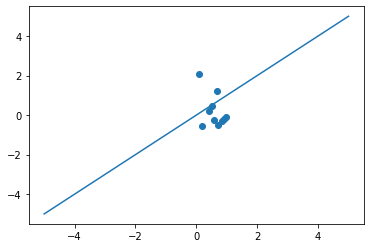

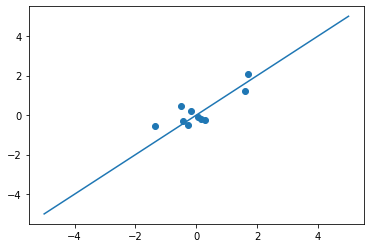

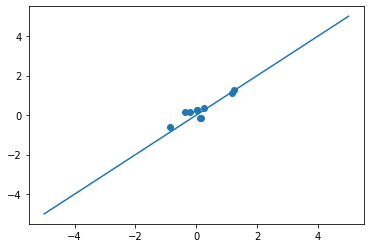

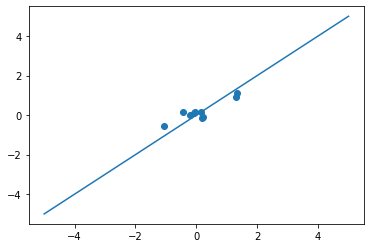

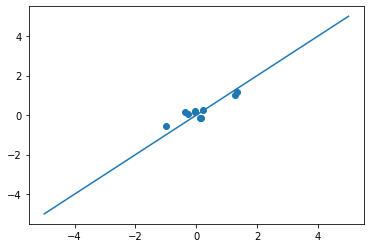

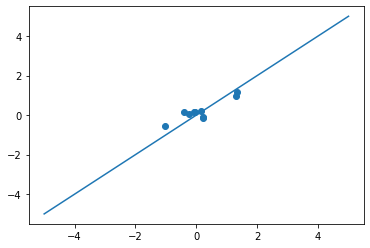

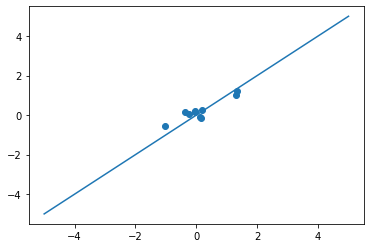

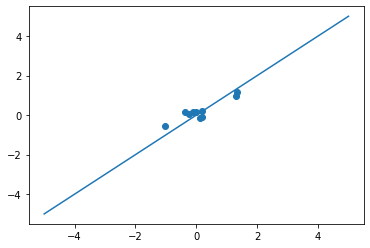

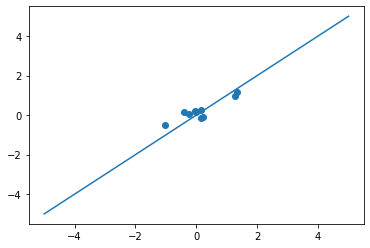

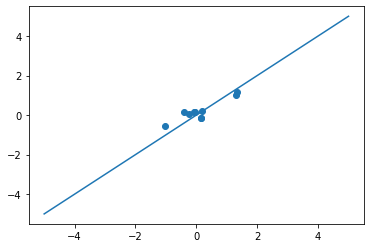

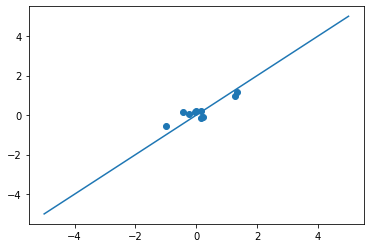

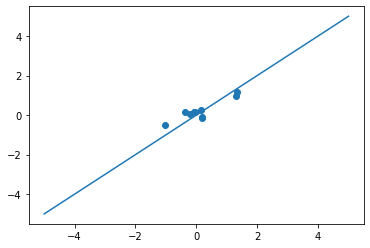

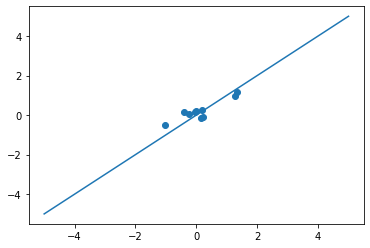

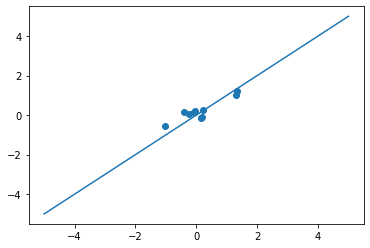

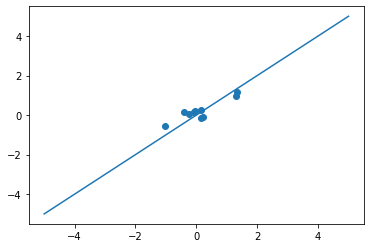

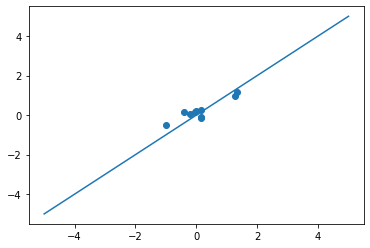

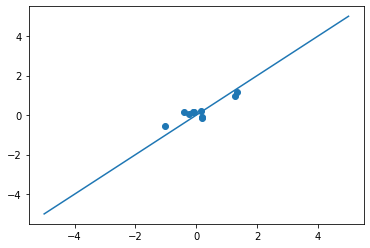

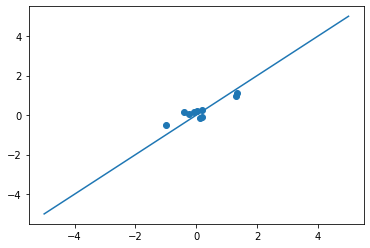

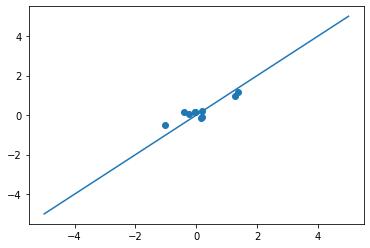

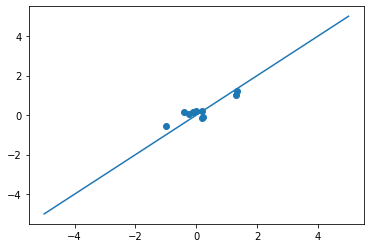

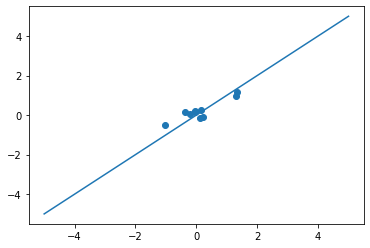

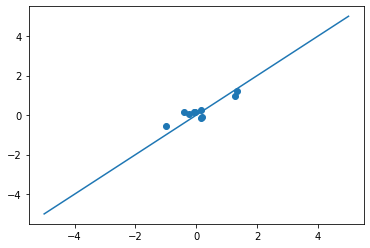

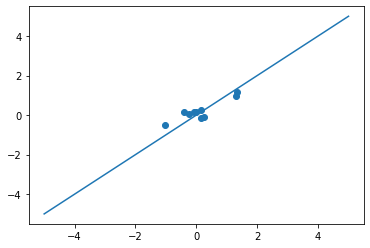

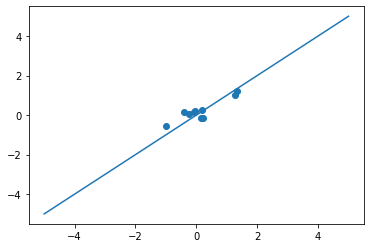

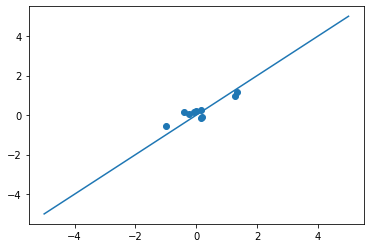

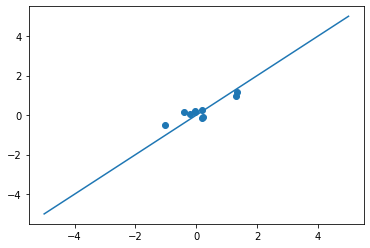

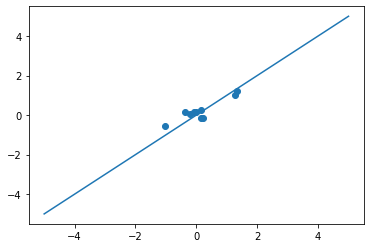

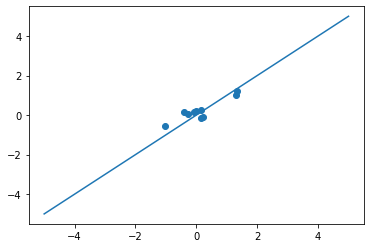

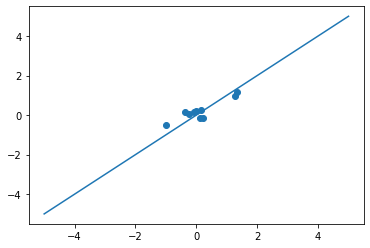

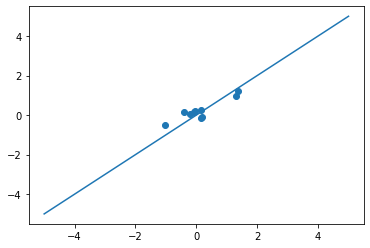

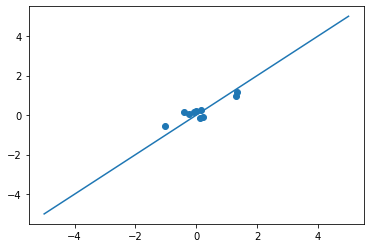

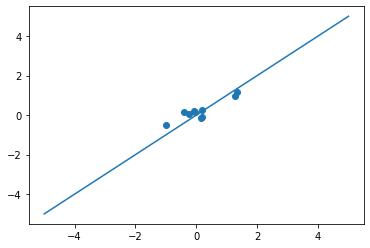

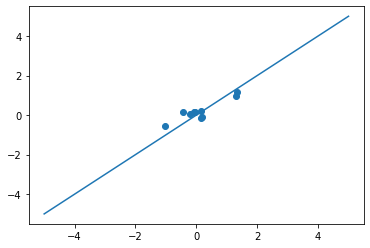

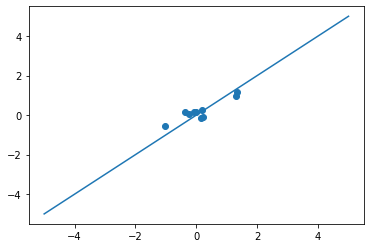

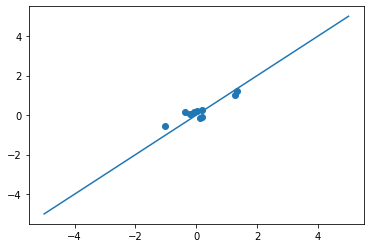

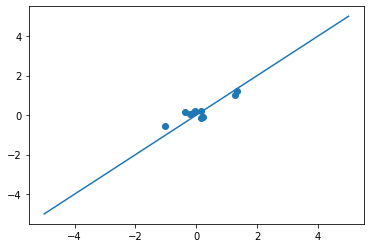

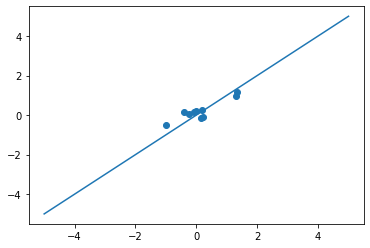

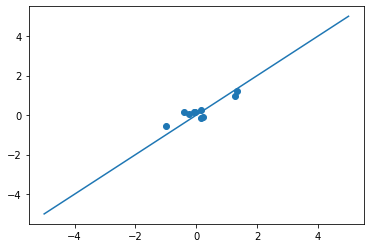

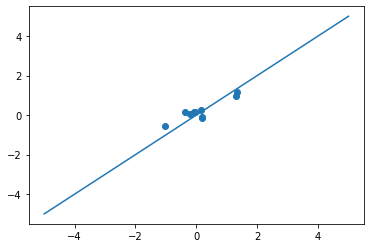

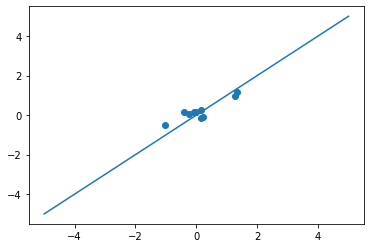

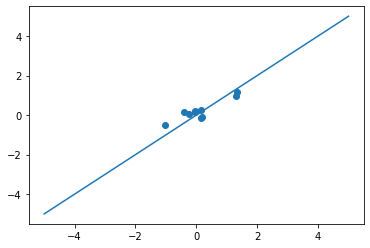

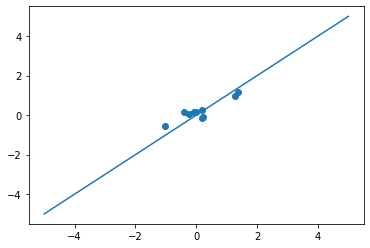

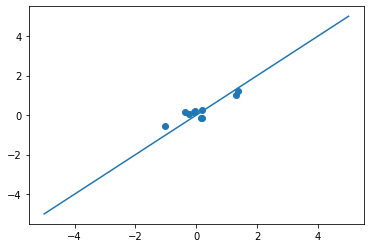

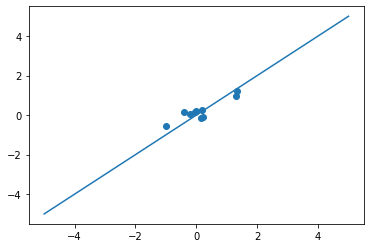

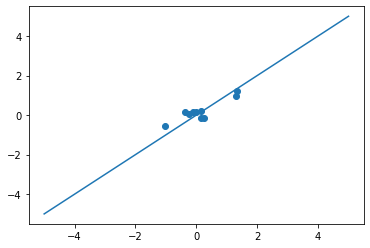

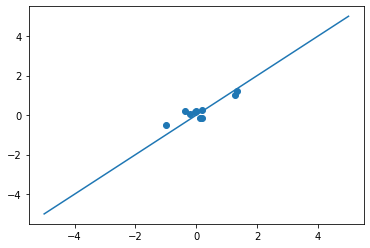

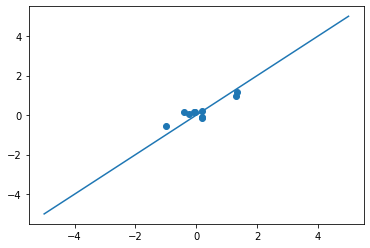

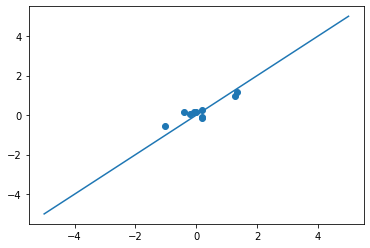

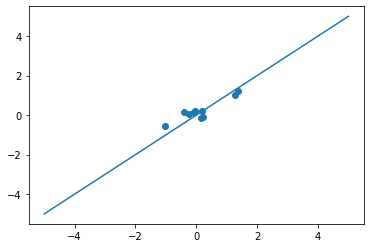

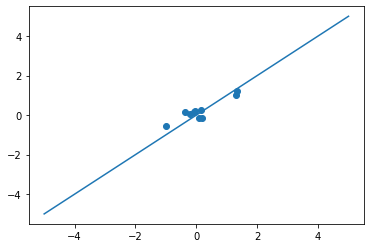

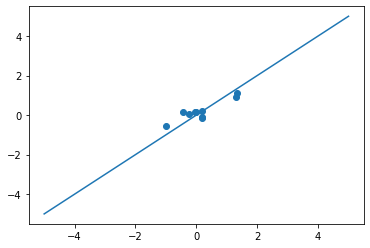

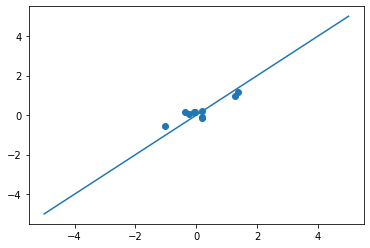

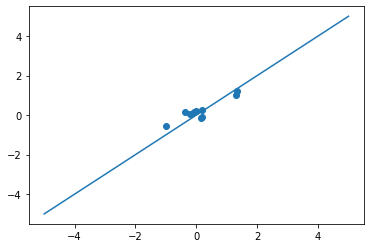

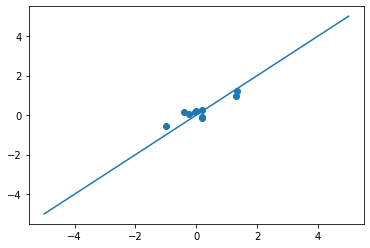

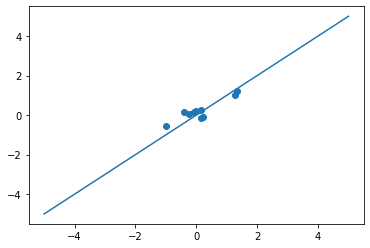

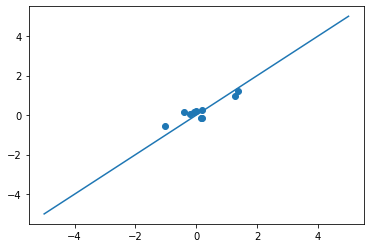

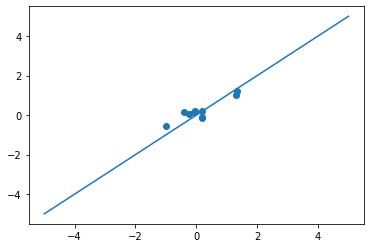

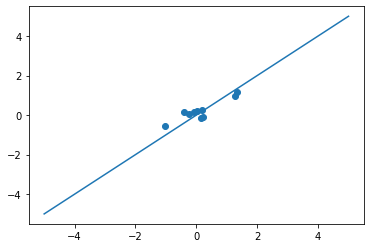

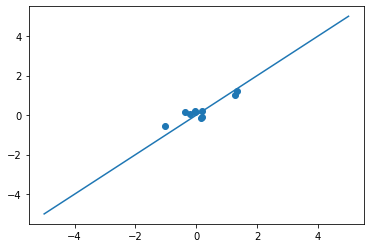

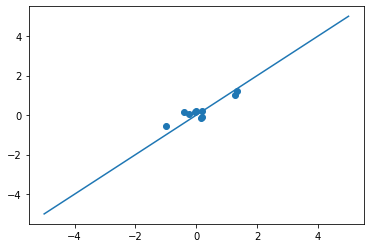

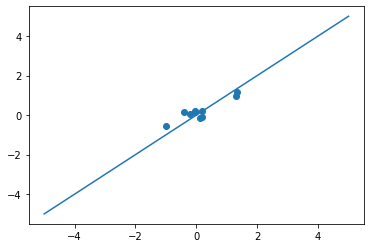

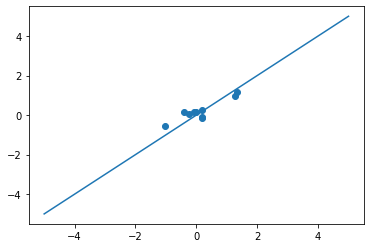

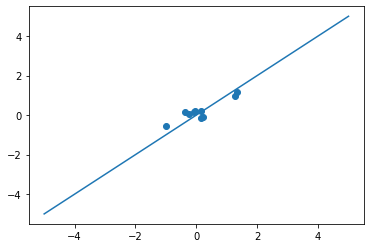

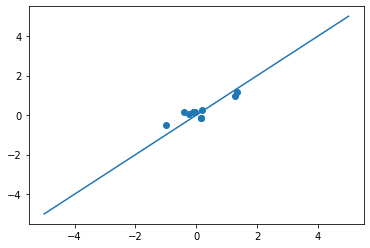

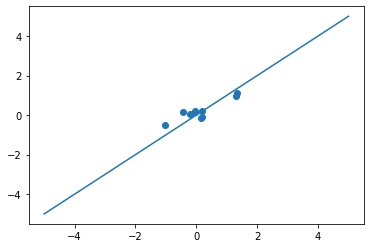

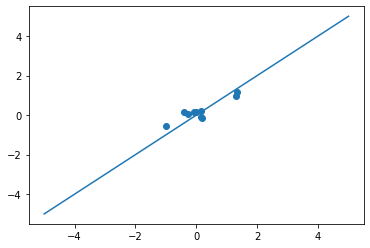

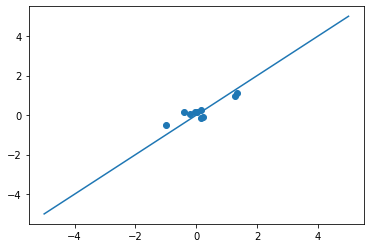

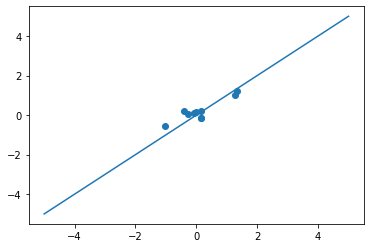

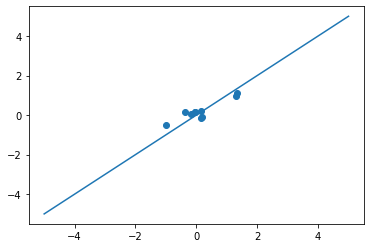

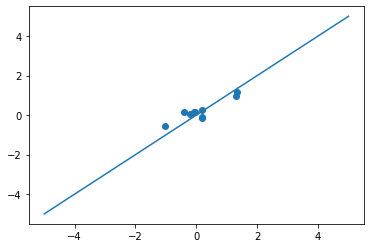

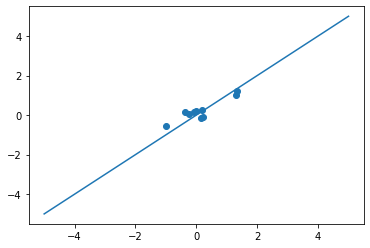

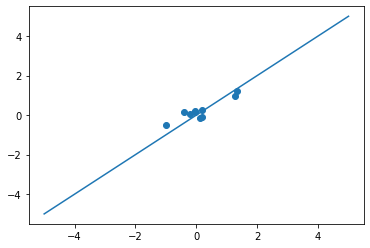

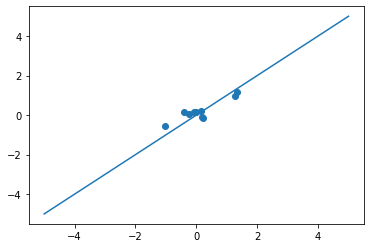

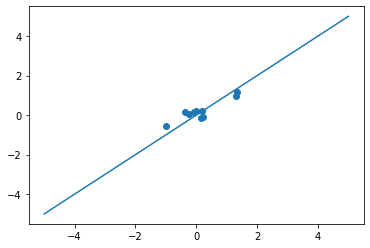

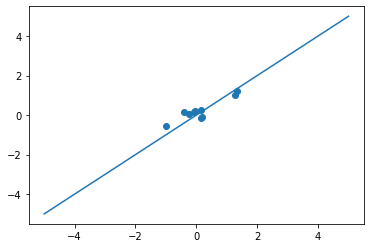

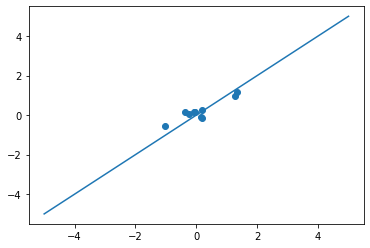

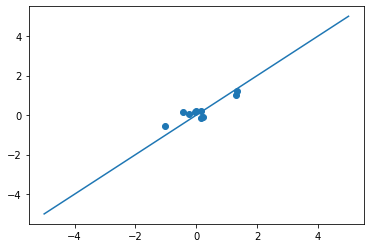

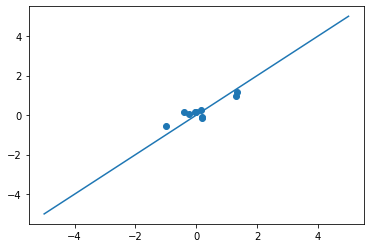

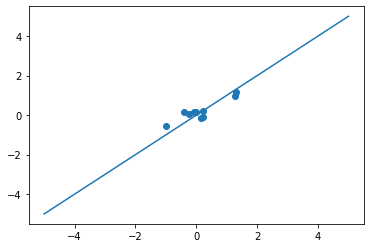

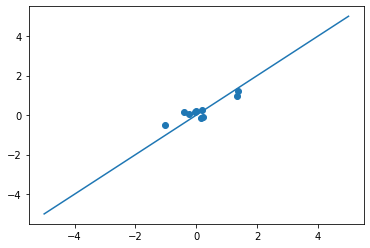

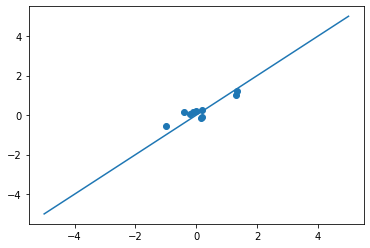

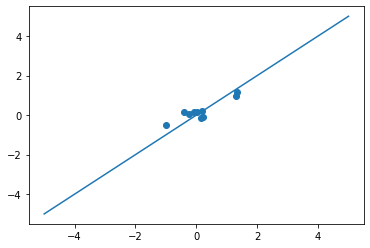

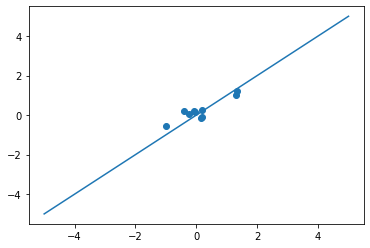

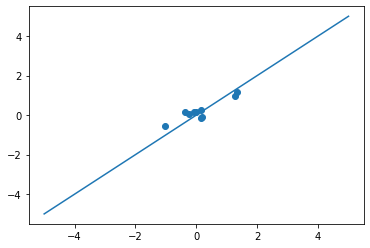

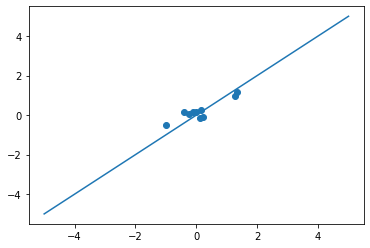

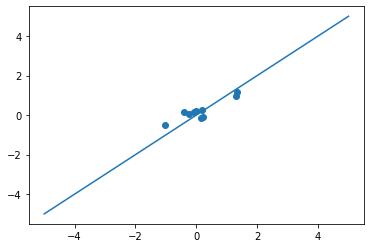

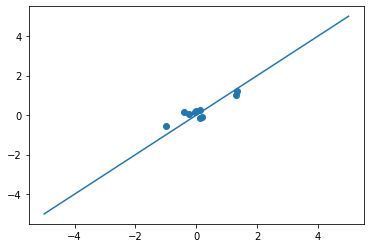

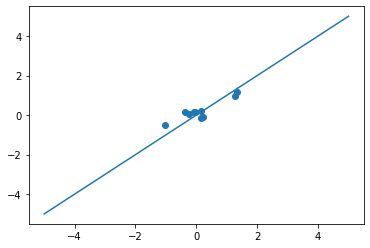

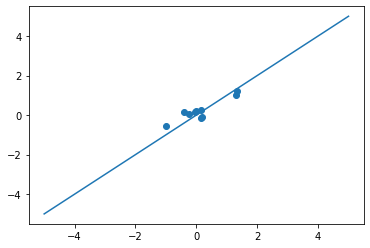

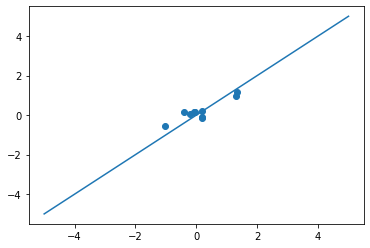

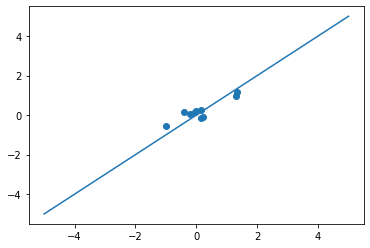

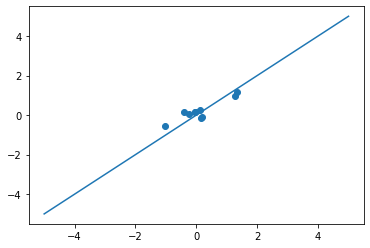

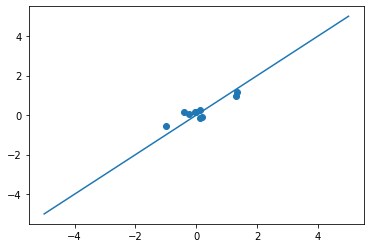

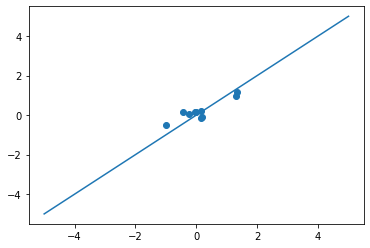

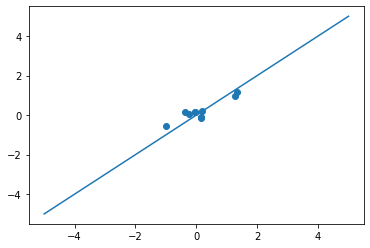

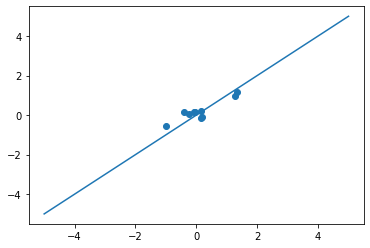

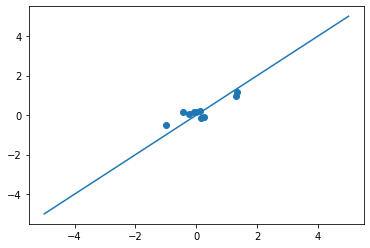

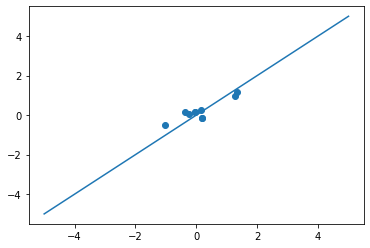

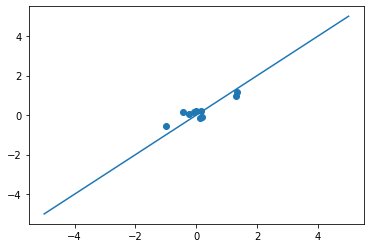

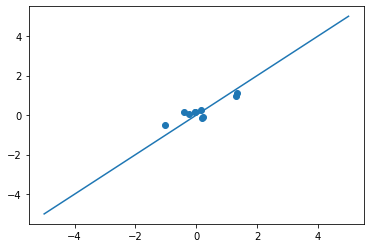

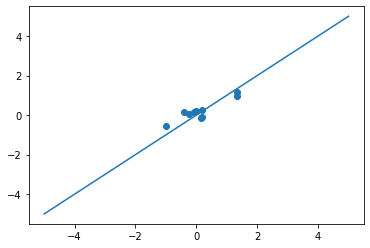

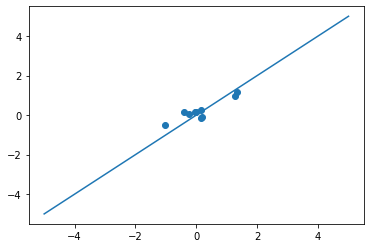

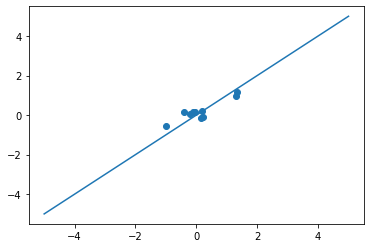

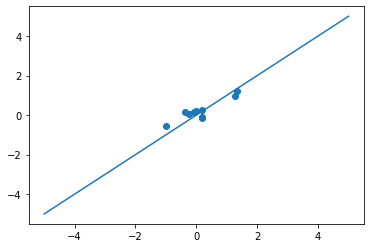

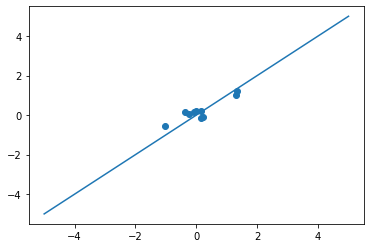

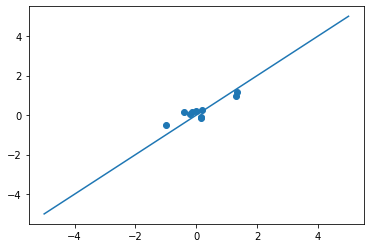

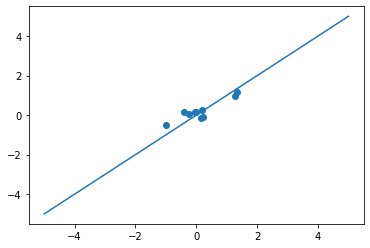

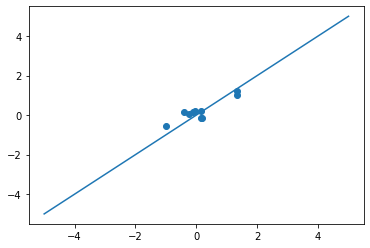

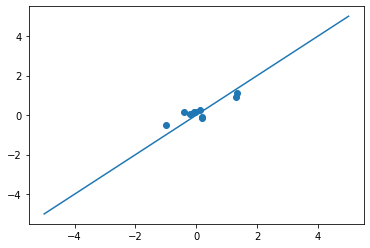

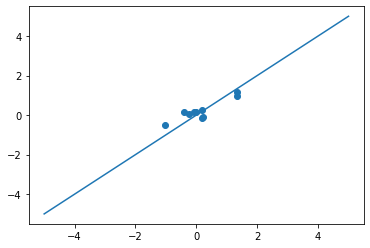

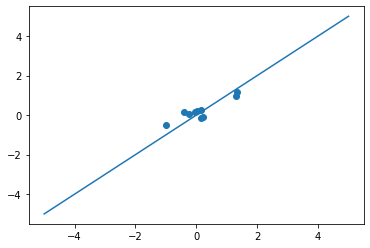

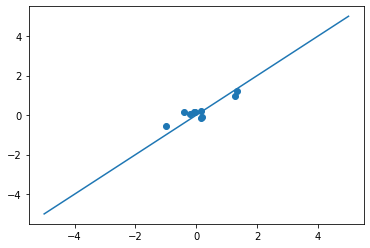

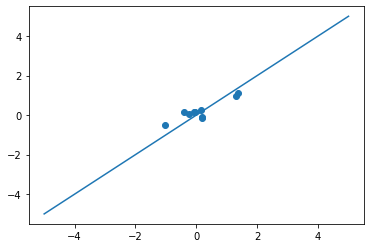

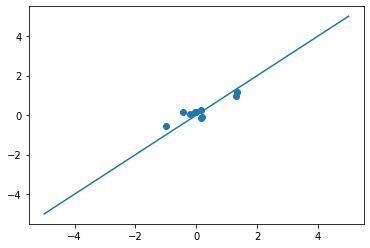

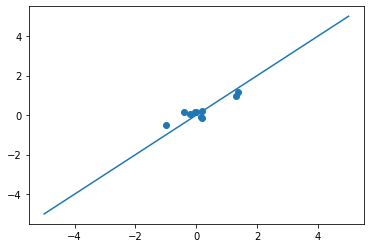

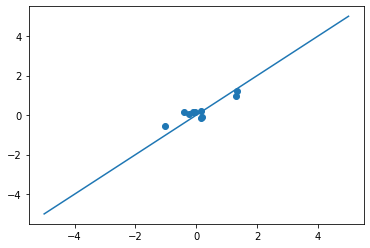

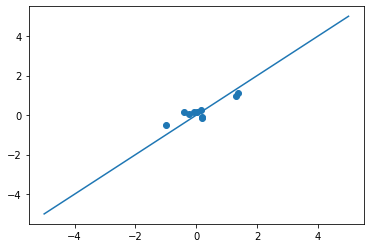

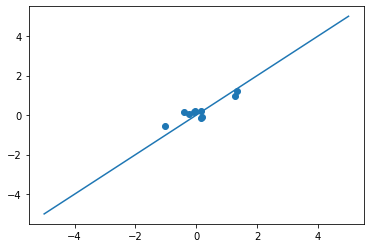

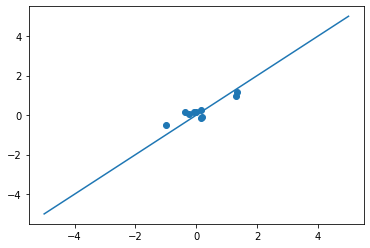

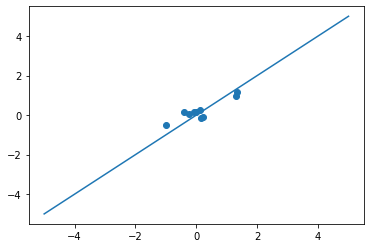

In [50]:
# h_history = history['h_history']
# print(h_history[0].shape)
# print(h_history[1].shape)
# h1_all = torch.stack(h_history).transpose(0,1) # output: batch_size x tol_time x latent_dim
# h1 = h1_all[0]
# h_history.pop(-1)
# h_history.insert(0, h0.expand(4, -1)) # The size of expanded h0 needs to be adjusted (num_train mod batch_size)
# #h_history.insert(0, h0.expand(batch_size, -1))
# print(h_history[0].shape)
# h2_all = torch.stack(h_history).transpose(0,1) # output: batch_size x tol_time x latent_dim
# h2 = h2_all[0]

h1 = h1_all[0]
h2 = h2_all[0]

F_mat = F_matrices[0].transpose(0,1)
h2 = torch.mm(h2, F_mat)
h2.shape

print(torch.dist(h1, h2))
for i in range(120):
    plt.plot([-5,5],[-5,5])
    plt.scatter(h1[i].cpu().detach().numpy(),h2[i].cpu().detach().numpy())
    plt.show()

In [53]:
CN1 = torch.tensor(nib.load(os.path.join(dir_CN, CN_img_names[1])).get_fdata()).unsqueeze(0).unsqueeze(0)

In [57]:
CN1, _, _ = training_pipeline(CN1)

In [68]:
CN1

tensor([[[[[[-0.9997, -0.9997, -0.9997,  ..., -0.9997, -0.9997, -0.9997],
            [-0.9996, -0.9996, -0.9994,  ..., -0.9995, -0.9996, -0.9996],
            [-0.9993, -0.9992, -0.9990,  ..., -0.9991, -0.9992, -0.9993],
            ...,
            [-0.9998, -0.9998, -0.9998,  ..., -0.9998, -0.9998, -0.9998],
            [-0.9998, -0.9998, -0.9998,  ..., -0.9998, -0.9998, -0.9998],
            [-0.9998, -0.9998, -0.9998,  ..., -0.9998, -0.9998, -0.9998]],

           [[-0.9997, -0.9996, -0.9995,  ..., -0.9996, -0.9996, -0.9996],
            [-0.9994, -0.9994, -0.9992,  ..., -0.9993, -0.9994, -0.9994],
            [-0.9990, -0.9989, -0.9985,  ..., -0.9987, -0.9989, -0.9989],
            ...,
            [-0.9998, -0.9998, -0.9998,  ..., -0.9998, -0.9998, -0.9998],
            [-0.9998, -0.9998, -0.9998,  ..., -0.9998, -0.9998, -0.9998],
            [-0.9998, -0.9998, -0.9998,  ..., -0.9998, -0.9998, -0.9998]],

           [[-0.9995, -0.9995, -0.9994,  ..., -0.9994, -0.9995, -0.9995],


In [66]:
CN1 = CN1[0][0].unsqueeze(0)

In [67]:
x_list, mu_history, h_history, gh_history = model(CN1, h0, [0])

RuntimeError: Input type (torch.cuda.DoubleTensor) and weight type (torch.cuda.FloatTensor) should be the same

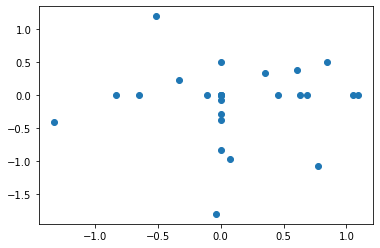

In [25]:
plt.scatter(z_vectors[:,0].cpu().detach().numpy(),z_vectors[:,1].cpu().detach().numpy())
plt.show()